In [1]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd

In [2]:
upstream = None
product = None
models_path = None
random_seed = None
target = None
factors = None
h2oautoml_config = None

In [3]:
# Parameters
target = ["WINNER"]
random_seed = 1
factors = [
    "TITLE_BOUT",
    "BANTAMWEIGHT",
    "CATCH WEIGHT",
    "FEATHERWEIGHT",
    "FLYWEIGHT",
    "HEAVYWEIGHT",
    "LIGHT HEAVYWEIGHT",
    "LIGHTWEIGHT",
    "MIDDLEWEIGHT",
    "WELTERWEIGHT",
    "WOMENS BANTAMWEIGHT",
    "WOMENS FEATHERWEIGHT",
    "WOMENS FLYWEIGHT",
    "WOMENS STRAWEIGHT",
]
h2oautoml_config = {
    "max_models": 5,
    "verbosity": "warn",
    "preprocessing": ["target_encoding"],
    "include_algos": ["GLM"],
}
models_path = "/home/m/repo/mma/products/models/h2o"
upstream = {
    "split-train-test": {
        "train": "/home/m/repo/mma/products/data/train.csv",
        "test": "/home/m/repo/mma/products/data/test.csv",
    }
}
product = {"nb": "/home/m/repo/mma/products/reports/fit_h2o_automl.ipynb"}


In [4]:
import pandas as pd
train_df = pd.read_csv(upstream['split-train-test']['train'])
test_df = pd.read_csv(upstream['split-train-test']['test'])

In [5]:
X_train = train_df.drop(columns = target)
Y_train = train_df[target]

In [6]:
X_test = test_df.drop(columns = target)
Y_test = test_df[target]

In [7]:
print(train_df.columns)

Index(['TITLE_BOUT', 'BANTAMWEIGHT', 'CATCH WEIGHT', 'FEATHERWEIGHT',
       'FLYWEIGHT', 'HEAVYWEIGHT', 'LIGHT HEAVYWEIGHT', 'LIGHTWEIGHT',
       'MIDDLEWEIGHT', 'WELTERWEIGHT', 'WOMENS BANTAMWEIGHT',
       'WOMENS FEATHERWEIGHT', 'WOMENS FLYWEIGHT', 'WOMENS STRAWEIGHT',
       'R_AGE', 'R_HEIGHT', 'R_REACH', 'R_WIN_PCT', 'R_WIN_STREAK',
       'R_LOSS_STREAK', 'R_KD', 'R_SIG_STR', 'R_SIG_STR_ATT', 'R_TOTAL_STR',
       'R_TOTAL_STR_ATT', 'R_TD', 'R_TD_ATT', 'R_SUB_ATT', 'R_REV', 'R_CTRL',
       'R_HEAD', 'R_HEAD_ATT', 'R_BODY', 'R_BODY_ATT', 'R_LEG', 'R_LEG_ATT',
       'R_DISTANCE', 'R_DISTANCE_ATT', 'R_CLINCH', 'R_CLINCH_ATT', 'R_GROUND',
       'R_GROUND_ATT', 'B_AGE', 'B_HEIGHT', 'B_REACH', 'B_WIN_PCT',
       'B_WIN_STREAK', 'B_LOSS_STREAK', 'B_KD', 'B_SIG_STR', 'B_SIG_STR_ATT',
       'B_TOTAL_STR', 'B_TOTAL_STR_ATT', 'B_TD', 'B_TD_ATT', 'B_SUB_ATT',
       'B_REV', 'B_CTRL', 'B_HEAD', 'B_HEAD_ATT', 'B_BODY', 'B_BODY_ATT',
       'B_LEG', 'B_LEG_ATT', 'B_DISTANCE', 'B_DISTAN

In [8]:
# Start the H2O cluster (locally)
h2o.init()
print(h2o.estimators.xgboost.H2OXGBoostEstimator.available())
train_hf = h2o.H2OFrame(train_df)
test_hf = h2o.H2OFrame(test_df)

Checking whether there is an H2O instance running at http://localhost:54321 .

 connected.


--------------------------  ----------------------------------------------------------------------------
H2O_cluster_uptime:         4 hours 25 mins
H2O_cluster_timezone:       Etc/GMT
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.36.0.2
H2O_cluster_version_age:    13 days
H2O_cluster_name:           root
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    7.248 Gb
H2O_cluster_total_cores:    1
H2O_cluster_allowed_cores:  1
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, XGBoost, Algos, Infogram, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.8.12 final
--------------------------  ----------------------------------------------------------------------------

True
Parse progress: |

████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |

████████████████████████████████████████████████████████████████| (done) 100%


In [9]:
train_hf[factors] = train_hf[factors].asfactor()
test_hf[factors] = test_hf[factors].asfactor()

In [10]:
train_hf[target] = train_hf[target].asfactor()
test_hf[target] = test_hf[target].asfactor()

In [11]:
print(train_hf.describe())

Rows:2502
Cols:73




TITLE_BOUT BANTAMWEIGHT CATCH WEIGHT FEATHERWEIGHT FLYWEIGHT HEAVYWEIGHT LIGHT HEAVYWEIGHT LIGHTWEIGHT MIDDLEWEIGHT WELTERWEIGHT WOMENS BANTAMWEIGHT WOMENS FEATHERWEIGHT WOMENS FLYWEIGHT WOMENS STRAWEIGHT R_AGE R_HEIGHT R_REACH R_WIN_PCT R_WIN_STREAK R_LOSS_STREAK R_KD R_SIG_STR R_SIG_STR_ATT R_TOTAL_STR R_TOTAL_STR_ATT R_TD R_TD_ATT R_SUB_ATT R_REV R_CTRL R_HEAD R_HEAD_ATT R_BODY R_BODY_ATT R_LEG R_LEG_ATT R_DISTANCE R_DISTANCE_ATT R_CLINCH R_CLINCH_ATT R_GROUND R_GROUND_ATT B_AGE B_HEIGHT B_REACH B_WIN_PCT B_WIN_STREAK B_LOSS_STREAK B_KD B_SIG_STR B_SIG_STR_ATT B_TOTAL_STR B_TOTAL_STR_ATT B_TD B_TD_ATT B_SUB_ATT B_REV B_CTRL B_HEAD B_HEAD_ATT B_BODY B_BODY_ATT B_LEG B_LEG_ATT B_DISTANCE B_DISTANCE_ATT B_CLINCH B_CLINCH_ATT B_GROUND B_GROUND_ATT R_ODDS B_ODDS WINNER 
 
 
 type enum enum enum enum enum enum enum enum enum enum enum enum enum enum int real real real int int real real real real real real real real real real real real real real real real real real real real real real int real real real int int real real real real real real real real real real real real real real real real real real real real real real real real enum 
 mins 19.0 152.4 152.4 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 20.0 152.4 152.4 0.0 0.0 0.0 0.0 0.0 0.2521008403361344 0.0 0.5042016806722689 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.06 1.11 
 mean 30.514788169464424 178.30727418065584 183.09828137489976 0.611219867387572 1.1726618705035952 0.6490807354116691 0.03544145851002402 3.4641788787459604 7.856171162658871 5.053453581795466 9.662267974130279 0.10861923063194563 0.27751754241657556 0.04504135758334949 0.011737749263826522 13.125949275779352 2.2647511396554516 6.194027528746454 0.6625212424572846 0.9822212278189651 0.5369064966332366 0.6799224060934654 2.3532738471157835 6.250760133661793 0.5181592981785789 0.7594553812691749 0.5927457334516035 0.8459556477278981 29.936450839328483 178.57517985611514 183.16678657074306 0.5782262355654851 1.089128697042365 0.5599520383693046 0.045603263476404025 3.537531843344968 8.053744882805915 5.147908273972282 9.884540036350112 0.10803780255218244 0.27640027089520186 0.05102548863367438 0.014108520674973821 12.896779982847505 2.3254242830070084 6.377979201754207 0.6834605615640125 1.0069295291464648 0.5286469987739438 0.6688361519052544 2.3688017993935464 6.361024600677297 0.5569708333488319 0.8120220929406159 0.6117592106025819 0.8806981891880127 1.9551278976818562 2.68957633892886 
 maxs 45.0 210.8 213.4 1.0 15.0 6.0 1.5384615384615383 22.10526315789474 32.631578947368425 22.10526315789474 32.631578947368425 1.4200492277473005 2.0127097818675286 1.2765957446808511 0.5504587155963303 58.739495798319325 20.0 30.526315789473685 6.724137931034482 7.241379310344827 3.5294117647058822 4.16184971098266 14.328358208955224 25.97014925373134 12.93103448275862 17.06896551724138 10.526315789473683 16.842105263157897 46.0 210.8 213.4 1.0 9.0 5.0 8.571428571428571 25.000000000000004 44.34782608695652 31.30434782608696 44.34782608695652 1.5789473684210529 2.7272727272727275 1.9047619047619049 0.5714285714285715 58.656716417910445 21.666666666666668 41.7391304347826 4.788240776238658 6.315789473684212 4.7727272727272725 4.7727272727272725 11.59090909090909 31.30434782608695 6.506024096385541 9.278350515463918 21.666666666666668 28.33333333333333 7.0 12.5 
 sigma 4.103175199331047 8.963978016662653 10.88434680822825 0.2779931996672661 1.7081559969783124 0.861429236875857 0.08851810633893924 1.6890367374506758 3.3479693525435104 2.2051050221780524 3.4845548773057895 0.11341316044602083 0.23743031395767777 0.08745853321318556 0.031072990179004403 10.611870993220405 1.3688147917849502 2.9197068817042853 0.47948120606243416 0.6452353786026487 0.43123688569410756 0.5403438227273032 1.4067116142892095 3.2484811950454504 0.5855376952212455 0.7880276883828873 0.7665456829552691 1.0909279658930595 3.9280257787817217 8.648752690324002 10.37506

None


In [12]:
h2oautoml_config['seed'] = random_seed
automl = H2OAutoML(**h2oautoml_config)

In [13]:
aml = H2OAutoML()

In [14]:
aml.train(x=X_train.columns.to_list(), y=target[0], training_frame=train_hf)
# View the AutoML Leaderboard
lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
print(lb.head())  # Print all rows instead of default (10 rows)
# The leader model is stored here
print(aml.leader)

AutoML progress: |

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█

█| (done) 100%


model_id auc logloss aucpr mean_per_class_error rmse mse training_time_ms predict_time_per_row_ms algo 
 
 
 StackedEnsemble_BestOfFamily_9_AutoML_3_20220208_140638 0.694564 0.623061 0.74424 0.443916 0.465953 0.217112 310 0.034637 StackedEnsemble 
 StackedEnsemble_BestOfFamily_8_AutoML_3_20220208_140638 0.693893 0.623954 0.746193 0.432325 0.466445 0.217571 1637 0.034798 StackedEnsemble 
 StackedEnsemble_BestOfFamily_2_AutoML_3_20220208_140638 0.693193 0.623663 0.74607 0.420856 0.46637 0.217501 129 0.008937 StackedEnsemble 
 StackedEnsemble_BestOfFamily_5_AutoML_3_20220208_140638 0.693123 0.623771 0.744476 0.428037 0.466368 0.217499 173 0.026546 StackedEnsemble 
 StackedEnsemble_BestOfFamily_3_AutoML_3_20220208_140638 0.693057 0.623928 0.744386 0.424443 0.466402 0.217531 154 0.01986 StackedEnsemble 
 StackedEnsemble_AllModels_2_AutoML_3_20220208_140638 0.692886 0.62414 0.743644 0.432676 0.466497 0.21762 283 0.020156 StackedEnsemble 
 StackedEnsemble_BestOfFamily_4_AutoML_3_20220208_140638 0.692319 0.624616 0.74242 0.4336 0.466692 0.217801 290 0.021244 StackedEnsemble 
 GBM_grid_1_AutoML_3_20220208_140638_model_17 0.692207 0.625612 0.733378 0.41644 0.466886 0.217983 109 0.004834 GBM 
 StackedEnsemble_BestOfFamily_1_AutoML_3_20220208_140638 0.69209 0.624421 0.744255 0.419008 0.466732 0.217839 119 0.006812 StackedEnsemble 
 GLM_1_AutoML_3_20220208_140638 0.691647 0.624425 0.745253 0.425603 0.466852 0.217951 502 0.003198 GLM


Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_9_AutoML_3_20220208_140638

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.17352848659594275
RMSE: 0.4165675054489281
LogLoss: 0.5249024248062235
Null degrees of freedom: 2501
Residual degrees of freedom: 2496
Null deviance: 3418.821837411521
Residual deviance: 2626.6117337303426
AIC: 2638.6117337303426
AUC: 0.8366913837779697
AUCPR: 0.8680612000568122
Gini: 0.6733827675559394

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.49554375166940756: 


0       1   Error             Rate
0      0  704.0   371.0  0.3451   (371.0/1075.0)
1      1  204.0  1223.0   0.143   (204.0/1427.0)
2  Total  908.0  1594.0  0.2298   (575.0/2502.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.495544     0.809666  235.0
1                        max f2   0.348314     0.886493  315.0
2                  max f0point5   0.564822     0.798306  192.0
3                  max accuracy   0.504093     0.772182  230.0
4                 max precision   0.991401     1.000000    0.0
5                    max recall   0.169000     1.000000  386.0
6               max specificity   0.991401     1.000000    0.0
7              max absolute_mcc   0.504093     0.531199  230.0
8    max min_per_class_accuracy   0.549392     0.758140  201.0
9   max mean_per_class_accuracy   0.520257     0.763204  220.0
10                      max tns   0.991401  1075.000000    0.0
11                      max fns   0.991401  1426.000000    0.0
12                      max fps   0.108433  1075.000000  399.0
13                      max tps   0.169000  1427.000000  386.0
14                      max tnr   0.991401     1.000000    0.0
15                      max fnr   0.991401     0.999299    0.0
16                      max fpr   0.108433     1.000000  399.0
17                      max tpr   0.169000     1.000000  386.0


Gains/Lift Table: Avg response rate: 57.03 %, avg score: 57.00 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010392         0.911226  1.753329   
1       2                  0.020384         0.898031  1.753329   
2       3                  0.030376         0.884244  1.683196   
3       4                  0.040368         0.869775  1.753329   
4       5                  0.050360         0.860996  1.683196   
5       6                  0.100320         0.821945  1.697222   
6       7                  0.150280         0.794666  1.613062   
7       8                  0.200240         0.764331  1.486823   
8       9                  0.300160         0.688886  1.402663   
9      10                  0.400080         0.619539  1.269410   
10     11                  0.500000         0.567120  1.241357   
11     12                  0.599920         0.515469  1.051997   
12     13                  0.699840         0.461367  0.750425   
13     14                  0.799760         0.399608  0.525999   
14     15                  0.899680         0.317276  0.364692   
15     16                  1.000000         0.108433  0.132722   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          1.753329       1.000000  0.937954                  1.000000   
1          1.753329       1.000000  0.903124                  1.000000   
2          1.730259       0.960000  0.890745                  0.986842   
3          1.735969       1.000000  0.876626                  0.990099   
4          1.725498       0.960000  0.864993                  0.984127   
5          1.711416       0.968000  0.839135                  0.976096   
6          1.678719       0.920000  0.808717                  0.957447   
7          1.630841       0.848000  0.780008                  0.930140   
8          1.554883       0.800000  0.728573                  0.886818   
9          1.483586       0.724000  0.651184                  0.846154   
10         1.435179       0.708000  0.592605                  0.818545   
11         1.371358       0.600000  0.541486                  0.782145   
12         1.282704       0.428000  0.488597                  0.731582   
13         1.188163       0.300000  0.429896                  0.677661   
14         1.096707       0.208000  0.362243                  0.625500   
15         1.000000       0.075697  0.243861                  0.570344   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           0.937954      0.018220                 0.018220  75.332866   
1           0.920880      0.017519                 0.035739  75.332866   
2           0.910967      0.016819                 0.052558  68.319552   
3           0.902467      0.017519                 0.070077  75.332866   
4           0.895032      0.016819                 0.086896  68.319552   
5           0.867195      0.084793                 0.171689  69.722214   
6           0.847754      0.080589                 0.252278  61.306237   
7           0.830851      0.074282                 0.326559  48.682270   
8           0.796804      0.140154                 0.466713  40.266293   
9           0.760435      0.126840                 0.593553  26.940995   
10          0.726896      0.124036                 0.717589  24.135669   
11          0.696015      0.105116                 0.822705   5.199720   
12          0.666401      0.074982                 0.897687 -24.957533   
13          0.636852      0.052558                 0.950245 -47.400140   
14          0.606354      0.036440                 0.986685 -63.530764   
15          0.569989      0.013315                 1.000000 -86.727791   

    cumulative_gain  kolmogorov_smirnov  
0         75.332866            0.018220  
1         75.332866            0.035739  
2         73.025855            0.051628  
3         73.596897            0.069147  
4         72.549805            0.085035  
5         71.141642            0.166107  
6         67.871893            0.237394  
7         63.084063        



ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.21711181174179955
RMSE: 0.4659525852936107
LogLoss: 0.6230606569514112
Null degrees of freedom: 2501
Residual degrees of freedom: 2497
Null deviance: 3419.1798430729978
Residual deviance: 3117.7955273848615
AIC: 3127.7955273848615
AUC: 0.6945636479196884
AUCPR: 0.7442399763901278
Gini: 0.3891272958393768

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.326737229858092: 


0       1   Error             Rate
0      0  159.0   916.0  0.8521   (916.0/1075.0)
1      1   51.0  1376.0  0.0357    (51.0/1427.0)
2  Total  210.0  2292.0  0.3865   (967.0/2502.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.326737     0.739984  340.0
1                        max f2   0.149460     0.869380  397.0
2                  max f0point5   0.533783     0.687314  216.0
3                  max accuracy   0.470674     0.647882  259.0
4                 max precision   0.993423     1.000000    0.0
5                    max recall   0.149460     1.000000  397.0
6               max specificity   0.993423     1.000000    0.0
7              max absolute_mcc   0.668063     0.287767  134.0
8    max min_per_class_accuracy   0.551568     0.634898  204.0
9   max mean_per_class_accuracy   0.610038     0.637775  166.0
10                      max tns   0.993423  1075.000000    0.0
11                      max fns   0.993423  1426.000000    0.0
12                      max fps   0.137948  1075.000000  399.0
13                      max tps   0.149460  1427.000000  397.0
14                      max tnr   0.993423     1.000000    0.0
15                      max fnr   0.993423     0.999299    0.0
16                      max fpr   0.137948     1.000000  399.0
17                      max tpr   0.149460     1.000000  397.0


Gains/Lift Table: Avg response rate: 57.03 %, avg score: 57.03 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010392         0.897475  1.618457   
1       2                  0.020384         0.881531  1.472796   
2       3                  0.030376         0.866738  1.542929   
3       4                  0.040368         0.853781  1.472796   
4       5                  0.050360         0.840670  1.542929   
5       6                  0.100320         0.801436  1.388636   
6       7                  0.150280         0.772052  1.374610   
7       8                  0.200240         0.745452  1.416690   
8       9                  0.300160         0.682937  1.290450   
9      10                  0.400080         0.609963  1.037971   
10     11                  0.500000         0.558402  0.960824   
11     12                  0.599920         0.517489  0.974851   
12     13                  0.699840         0.472878  0.911731   
13     14                  0.799760         0.416664  0.799518   
14     15                  0.899680         0.343983  0.694318   
15     16                  1.000000         0.137241  0.475005   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          1.618457       0.923077  0.922562                  0.923077   
1          1.547055       0.840000  0.888421                  0.882353   
2          1.545698       0.880000  0.873918                  0.881579   
3          1.527653       0.840000  0.859124                  0.871287   
4          1.530684       0.880000  0.847061                  0.873016   
5          1.459943       0.792000  0.818643                  0.832669   
6          1.431574       0.784000  0.785585                  0.816489   
7          1.427860       0.808000  0.759692                  0.814371   
8          1.382118       0.736000  0.713031                  0.788282   
9          1.296167       0.592000  0.646376                  0.739261   
10         1.229152       0.548000  0.582388                  0.701039   
11         1.186797       0.556000  0.538218                  0.676882   
12         1.147524       0.520000  0.493981                  0.654483   
13         1.104045       0.456000  0.447511                  0.629685   
14         1.058540       0.396000  0.383636                  0.603732   
15         1.000000       0.270916  0.276639                  0.570344   

    cumulative_score  capture_rate  cumulative_capture_rate       gain  \
0           0.922562      0.016819                 0.016819  61.845723   
1           0.905826      0.014716                 0.031535  47.279608   
2           0.895330      0.015417                 0.046952  54.292922   
3           0.886368      0.014716                 0.061668  47.279608   
4           0.878569      0.015417                 0.077085  54.292922   
5           0.848726      0.069376                 0.146461  38.863630   
6           0.827735      0.068676                 0.215137  37.460967   
7           0.810758      0.070778                 0.285915  41.668956   
8           0.778226      0.128942                 0.414856  29.044989   
9           0.745296      0.103714                 0.518570   3.797057   
10          0.712741      0.096006                 0.614576  -3.917589   
11          0.683673      0.097407                 0.711983  -2.514926   
12          0.656590      0.091100                 0.803083  -8.826910   
13          0.630468      0.079888                 0.882971 -20.048213   
14          0.603054      0.069376                 0.952348 -30.568185   
15          0.570308      0.047652                 1.000000 -52.499463   

    cumulative_gain  kolmogorov_smirnov  
0         61.845723            0.014958  
1         54.705470            0.025953  
2         54.569764            0.038580  
3         52.765270            0.049575  
4         53.068375            0.062201  
5         45.994299            0.107391  
6         43.157420            0.150951  
7         42.786047        

In [15]:
perf_train = aml.leader.model_performance(train_hf)
print("train accuracy")
perf_train.accuracy()

train accuracy


[[0.5040925799285991, 0.7721822541966427]]

In [16]:
perf_test = aml.leader.model_performance(test_hf)
print("test accuracy")
perf_test.accuracy()

test accuracy


[[0.45707874721140224, 0.6618705035971223]]

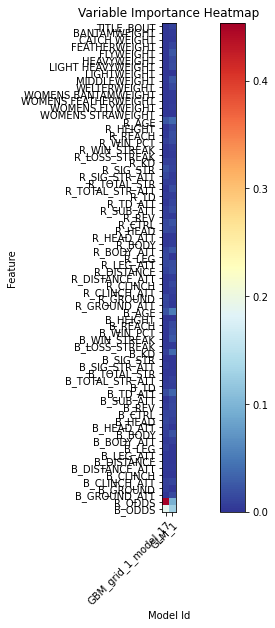

In [17]:
# or if some subset of the models is needed a slice of leaderboard can be used, e.g., using MAE as the sorting metric
va_plot = h2o.varimp_heatmap(aml.leaderboard.head(10))

In [18]:
print(va_plot)

or even extended leaderboard can be used
va_plot = h2o.varimp_heatmap(h2o.automl.get_leaderboard(aml, extra_columns="training_time_ms").sort("training_time_ms").head(10))

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_9_AutoML_3_20220208_140638


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.49554375166940756: 


0       1   Error             Rate
0      0  704.0   371.0  0.3451   (371.0/1075.0)
1      1  204.0  1223.0   0.143   (204.0/1427.0)
2  Total  908.0  1594.0  0.2298   (575.0/2502.0)

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

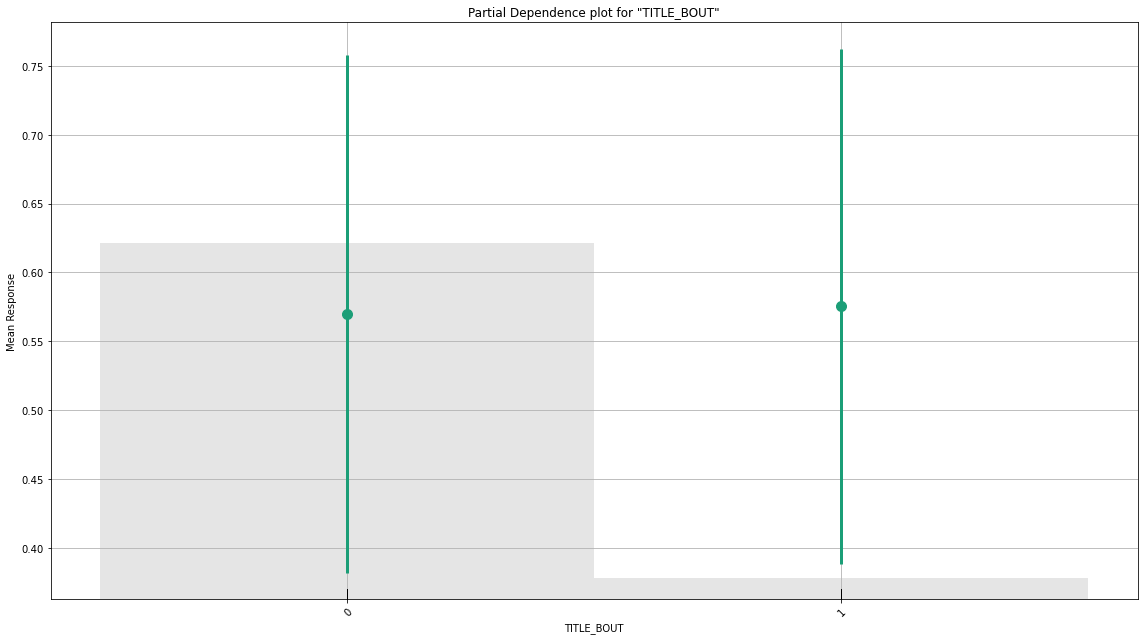

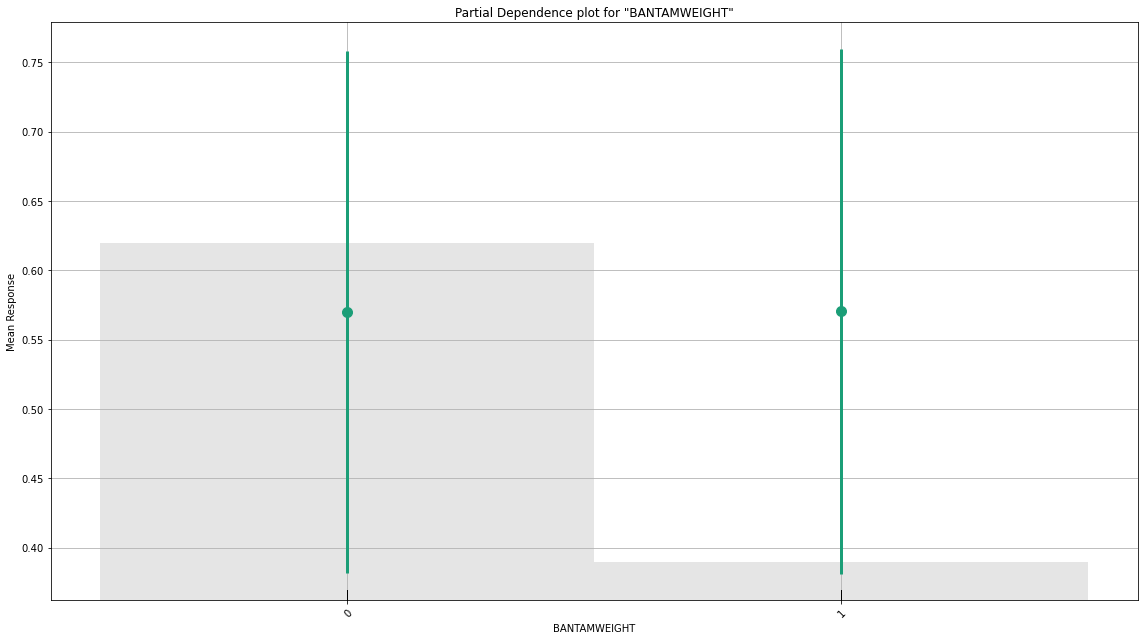

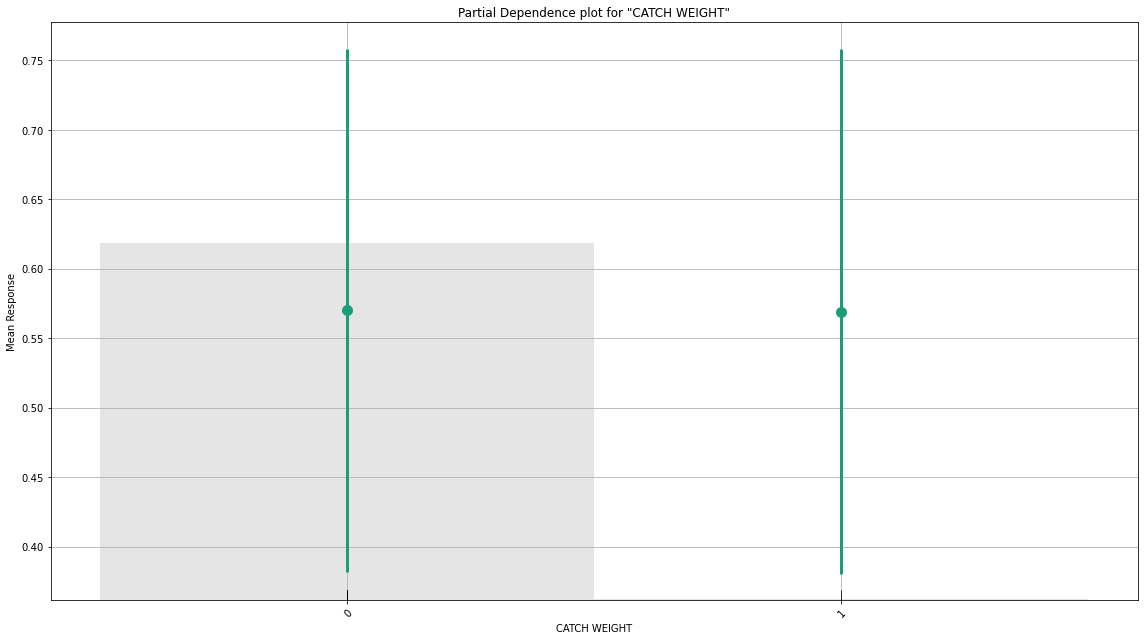

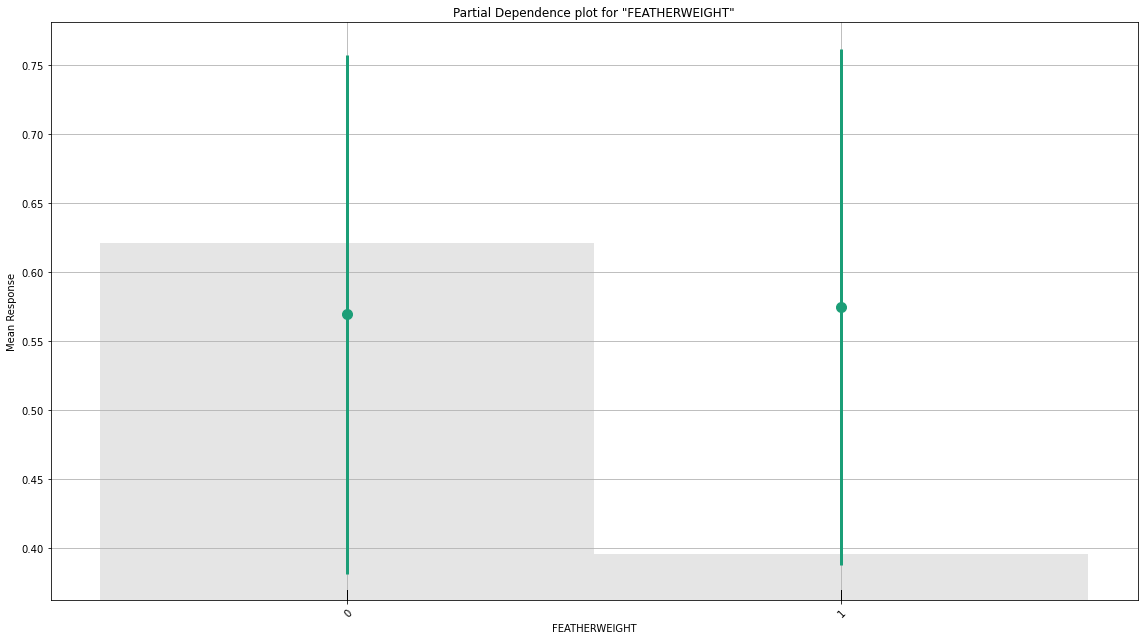

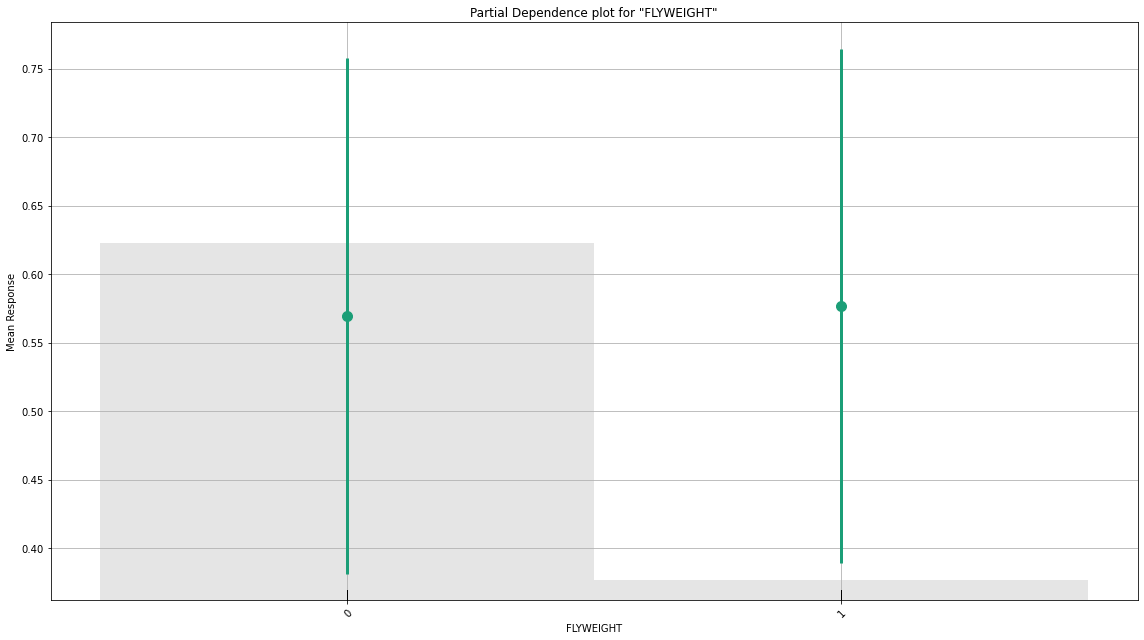

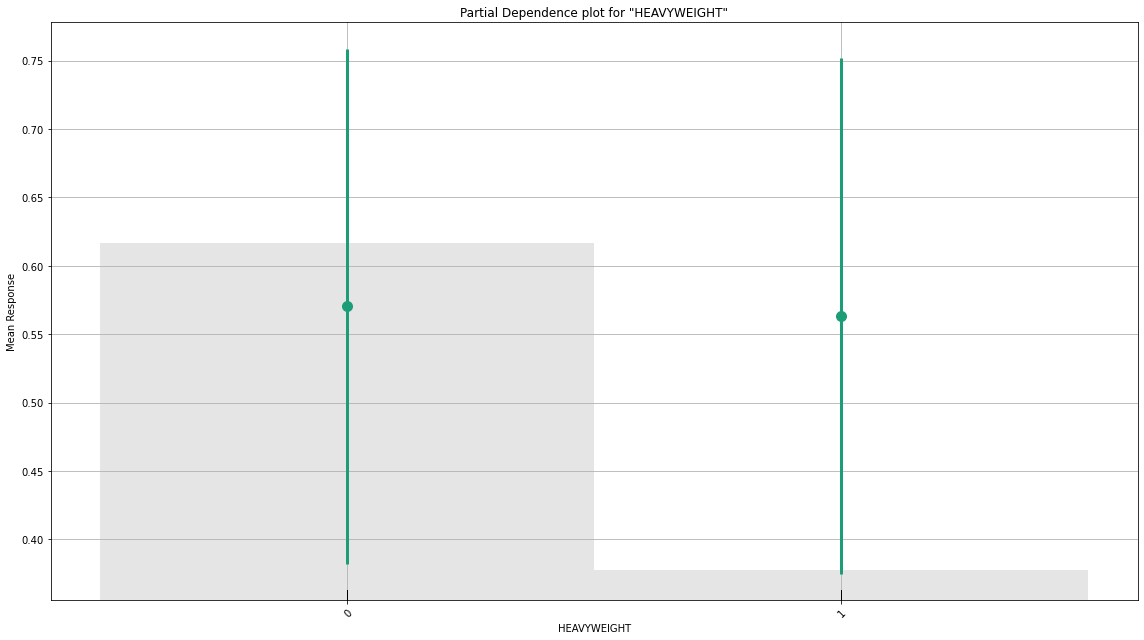

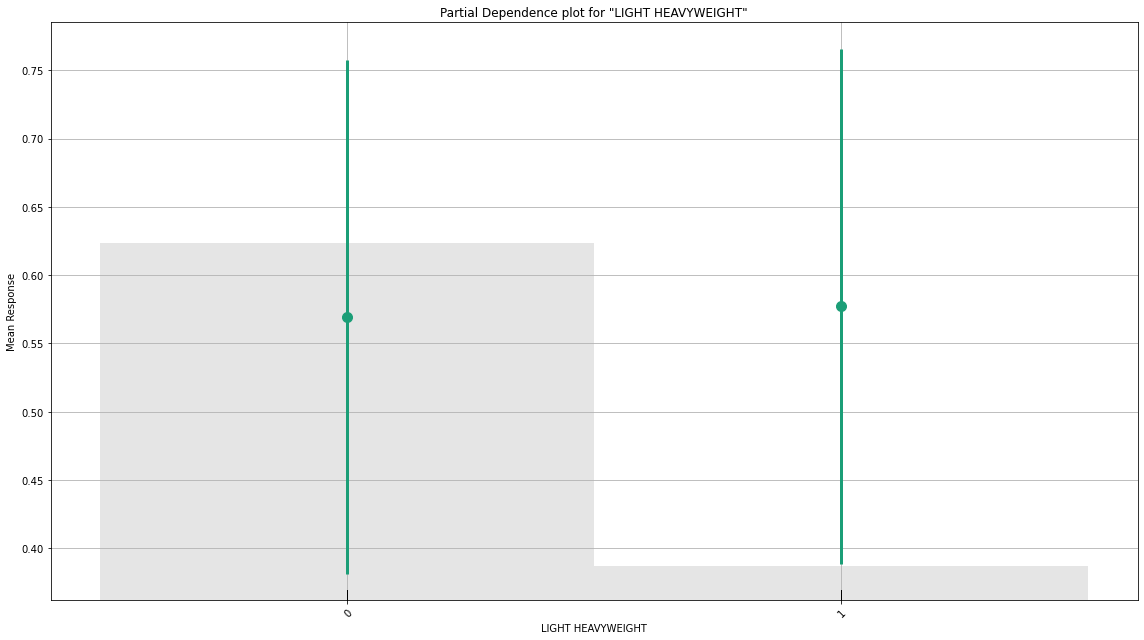

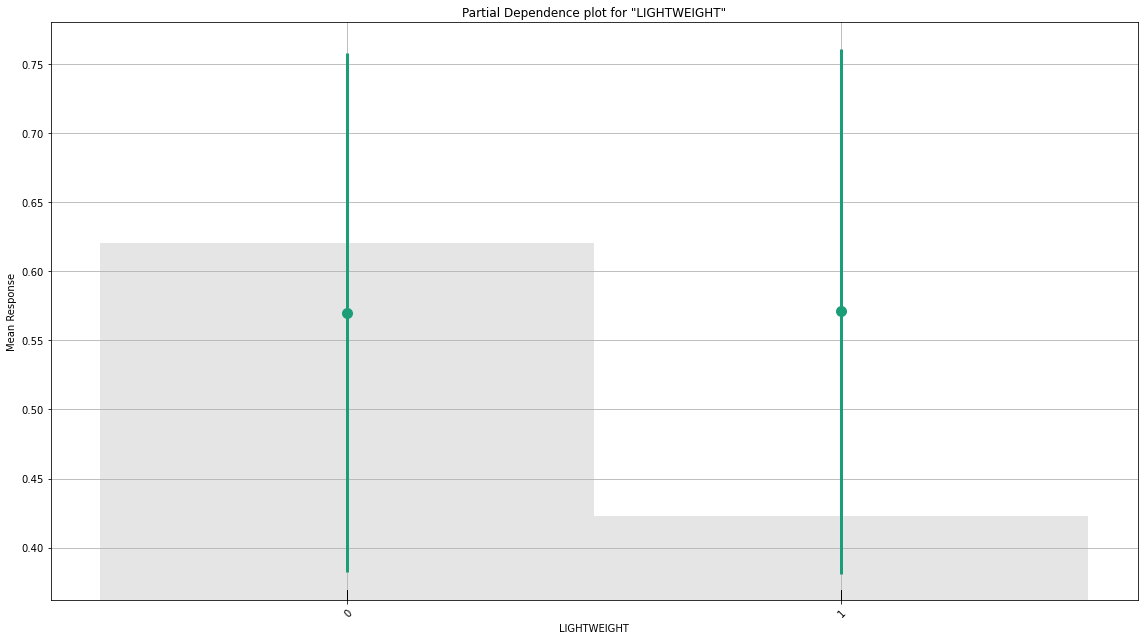

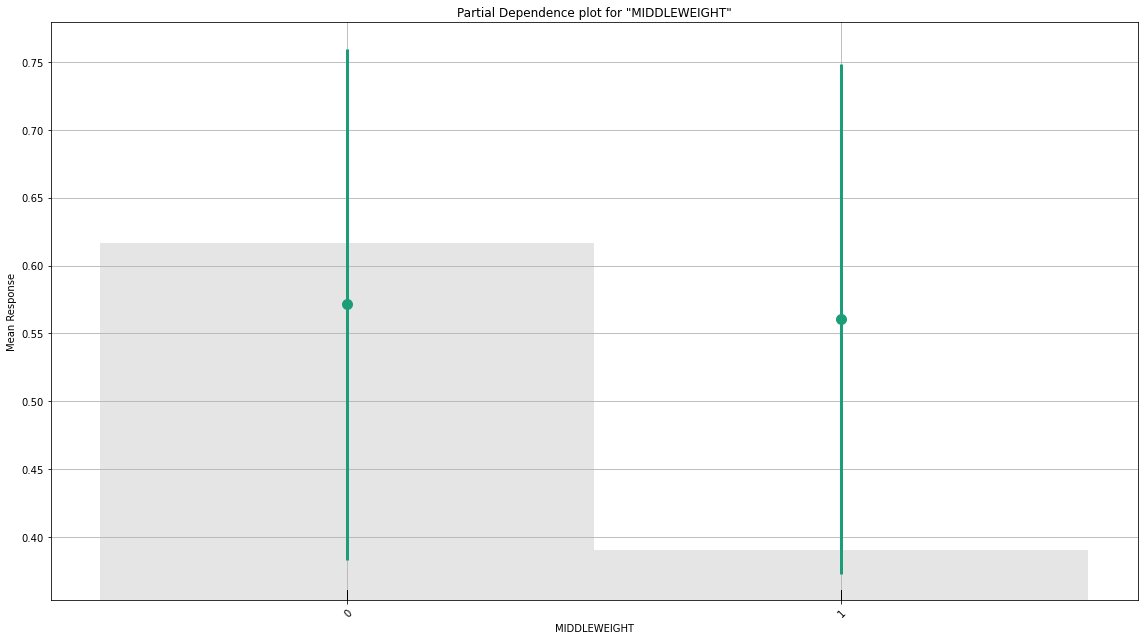

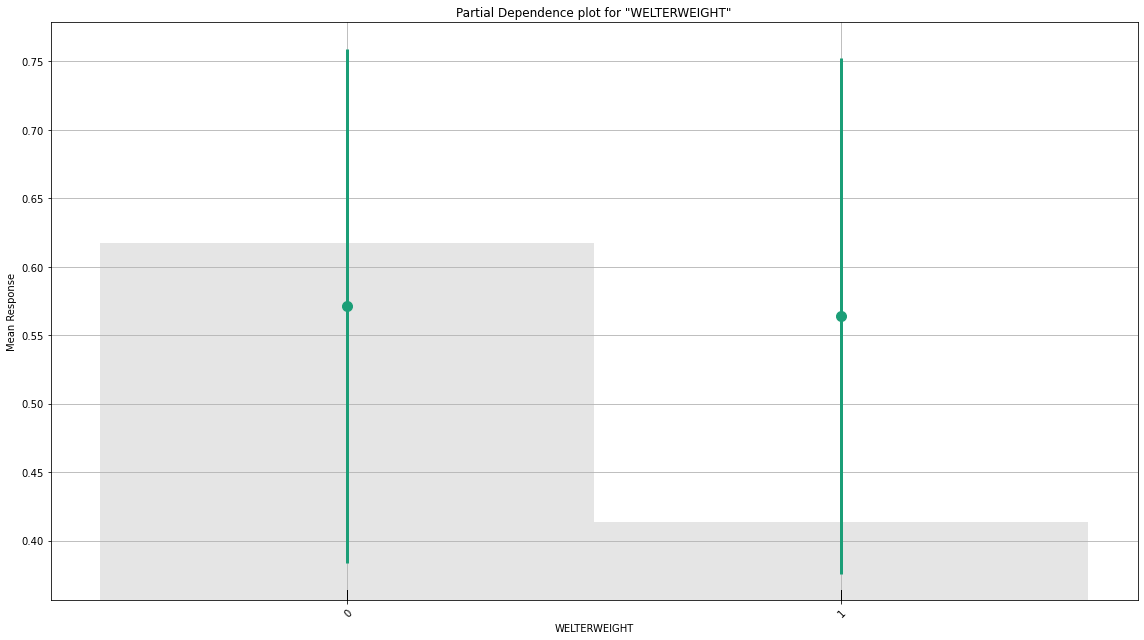

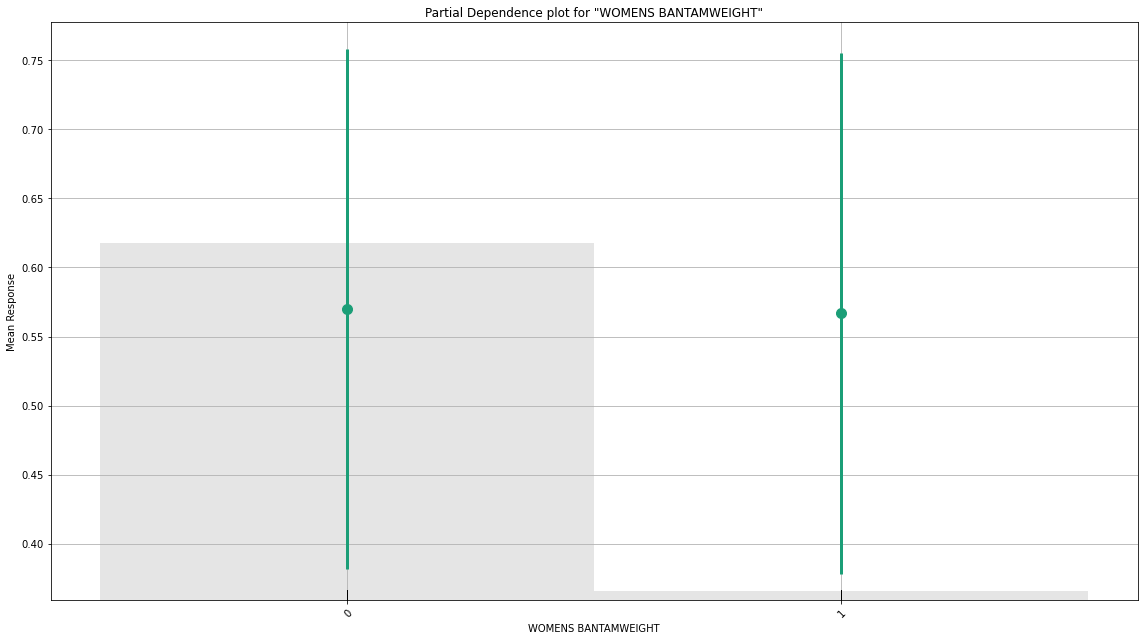

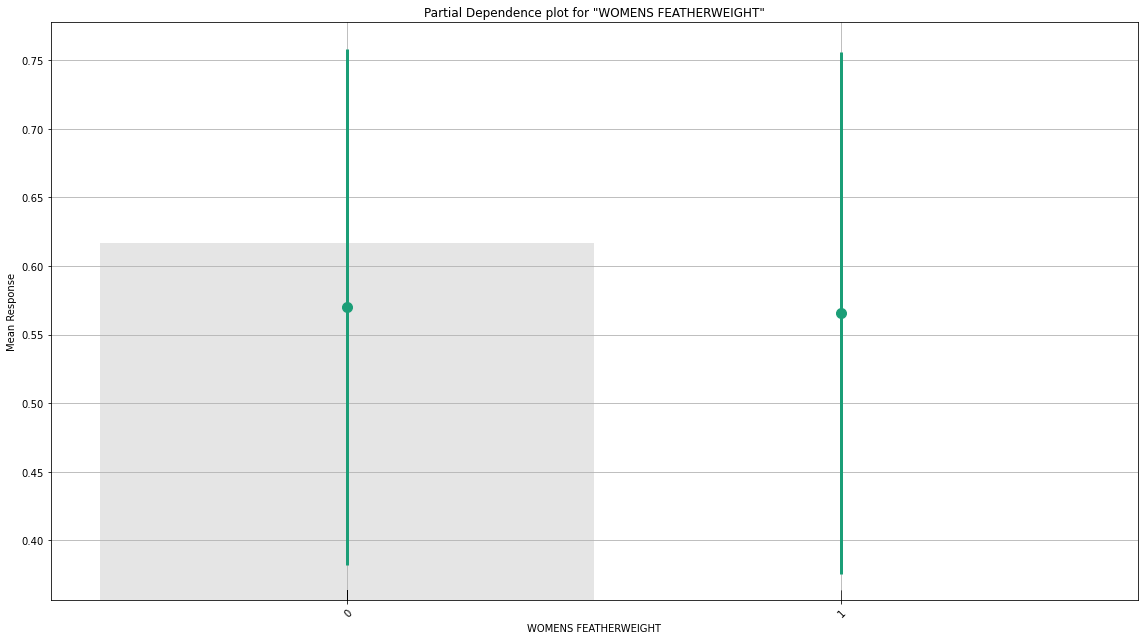

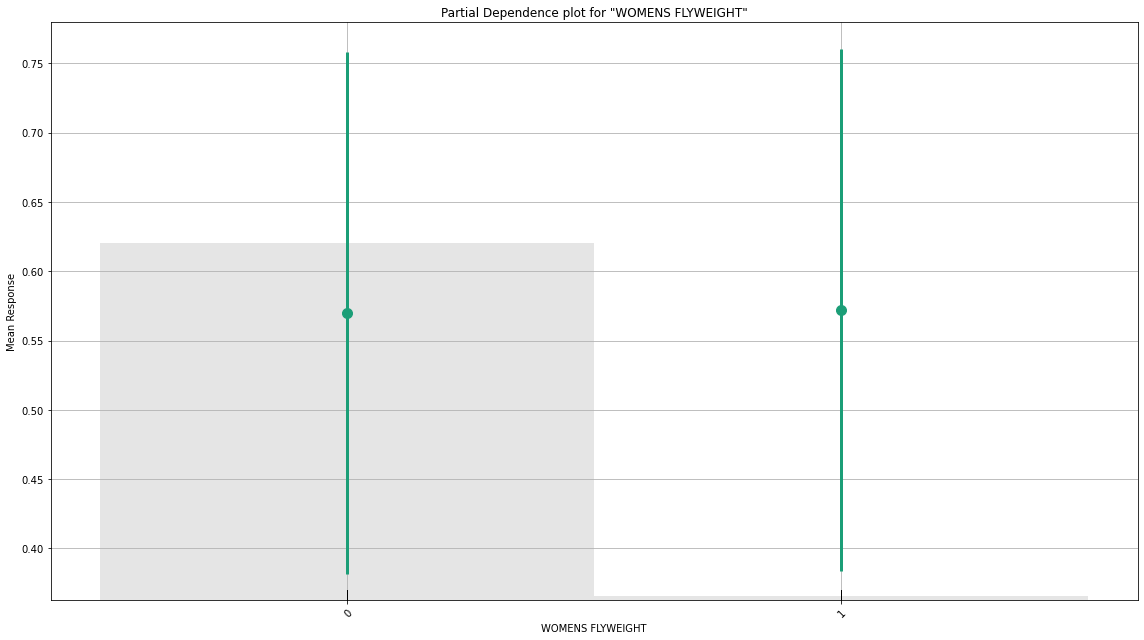

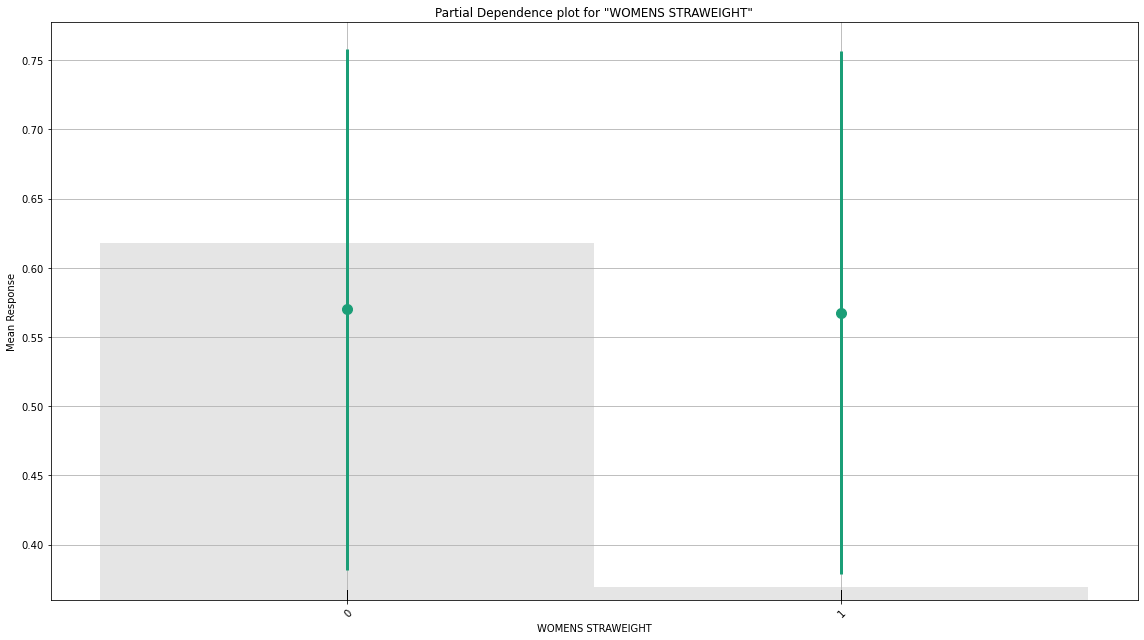

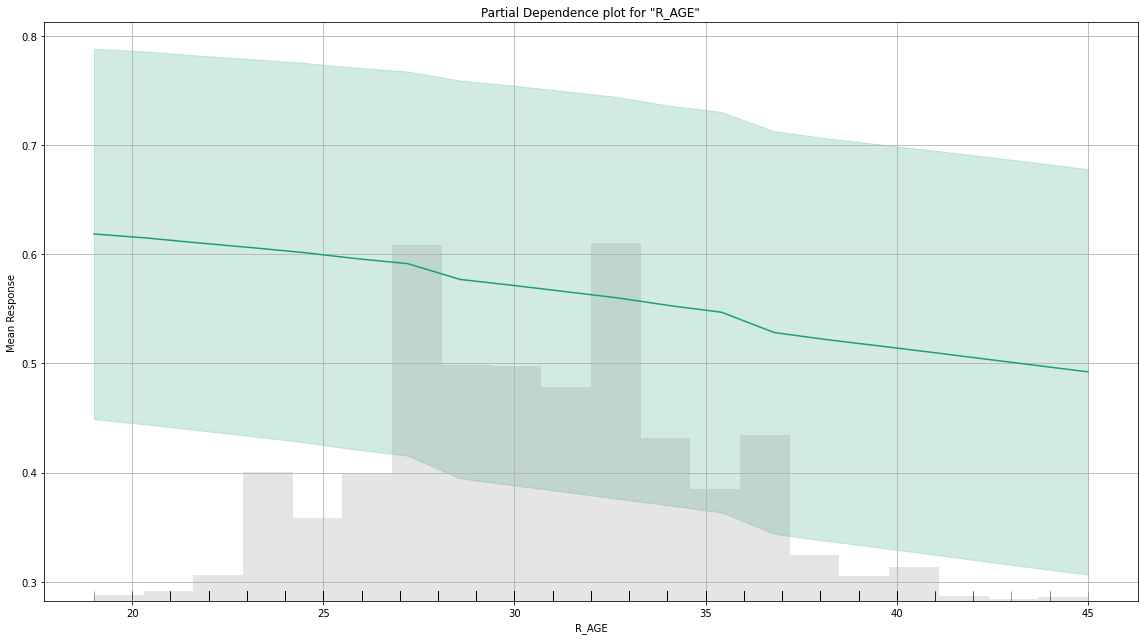

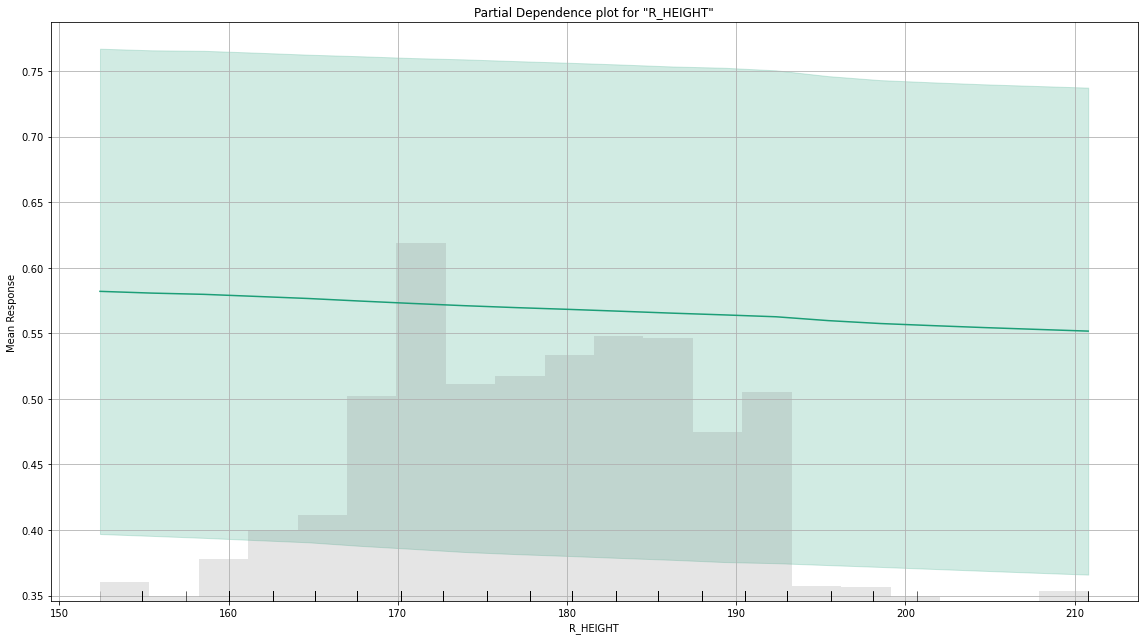

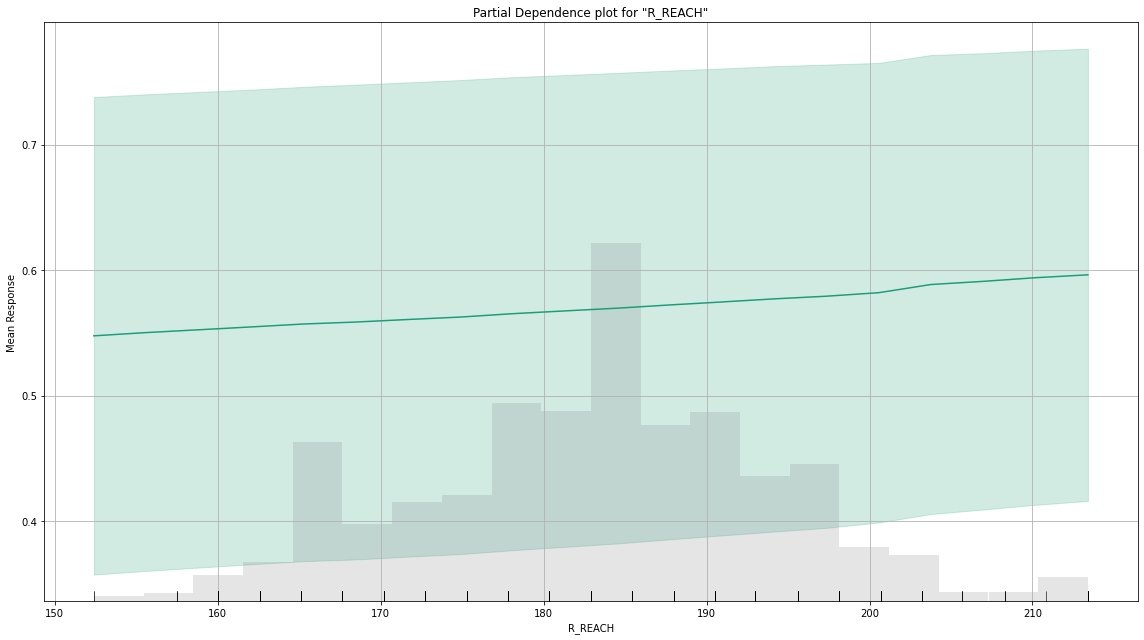

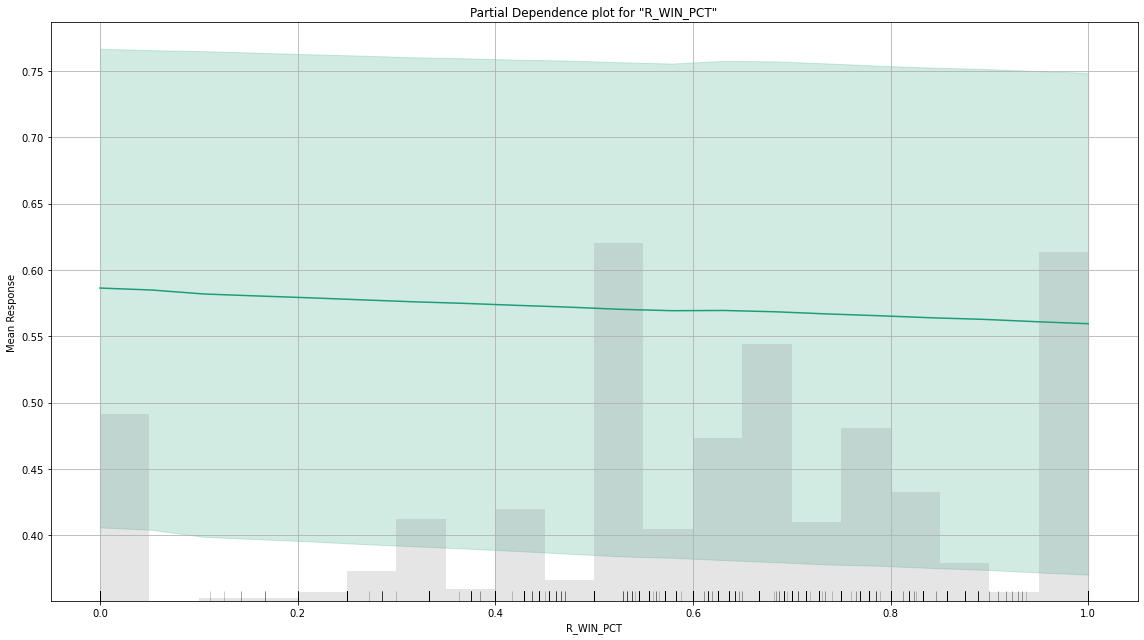

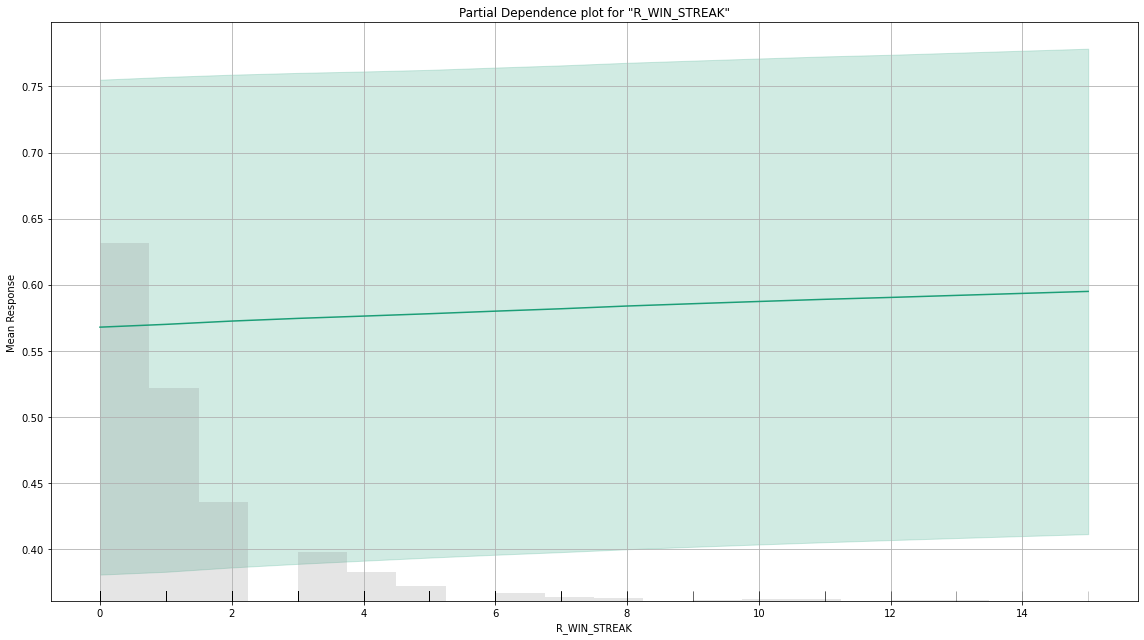

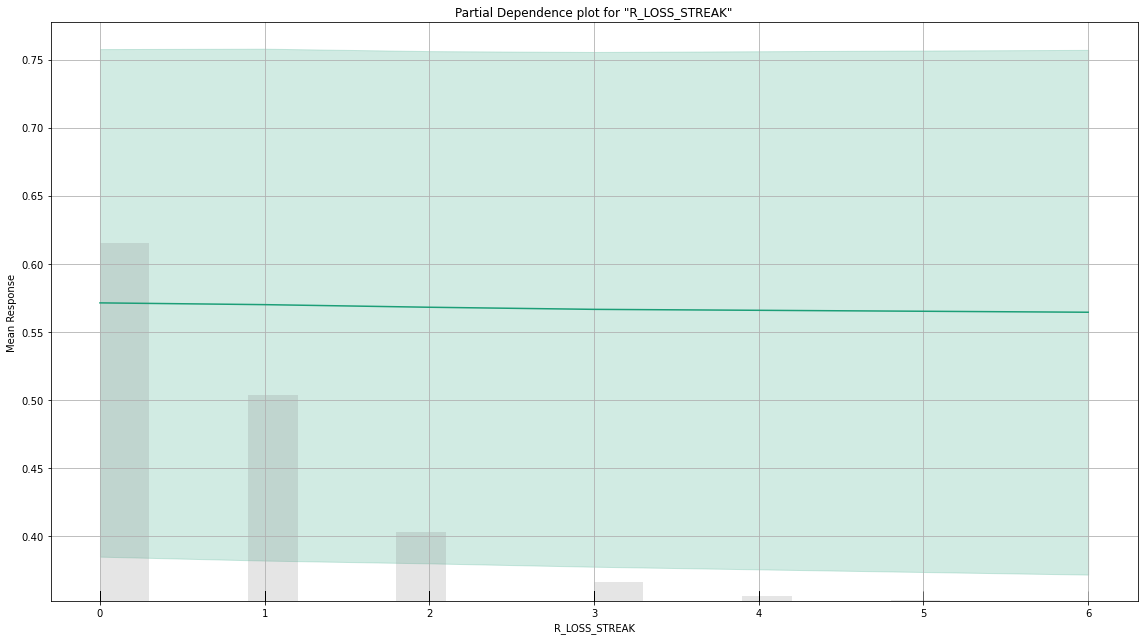

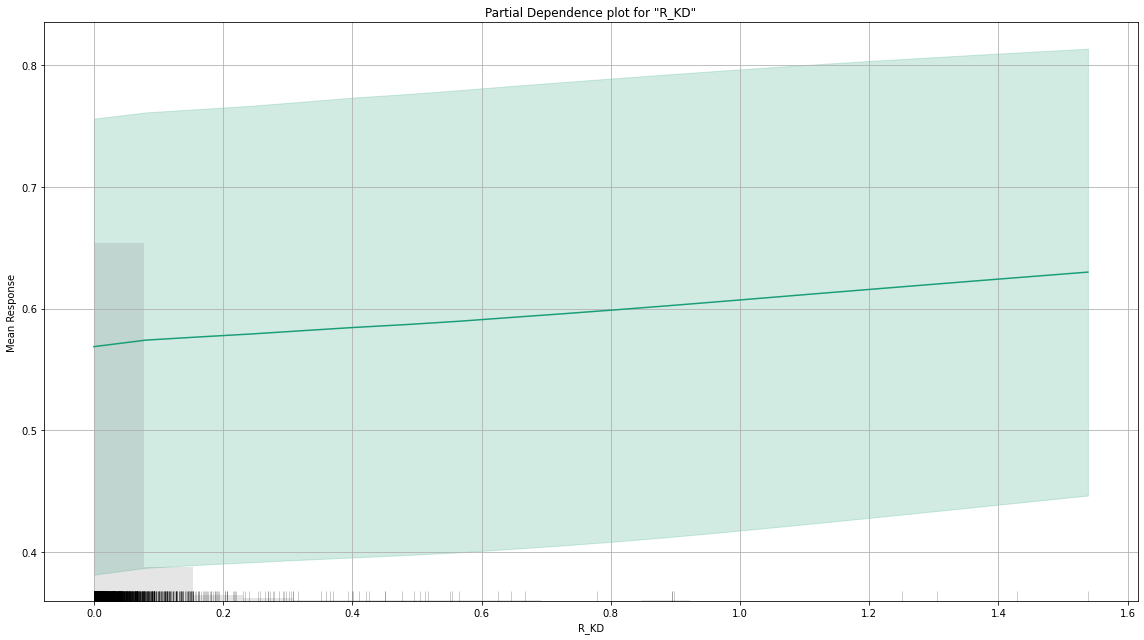

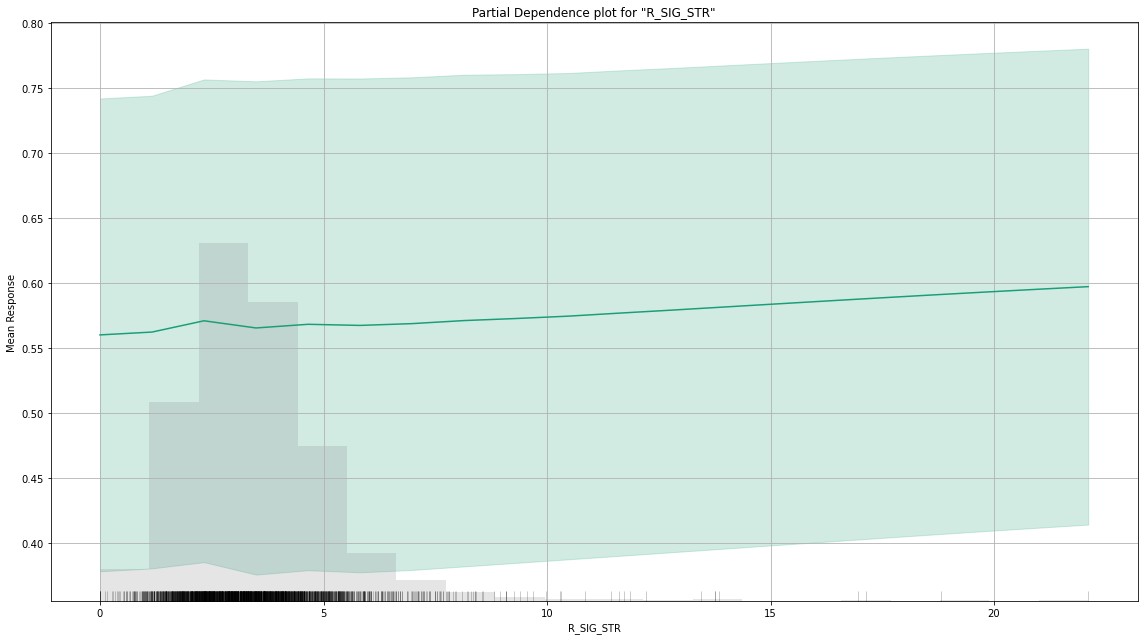

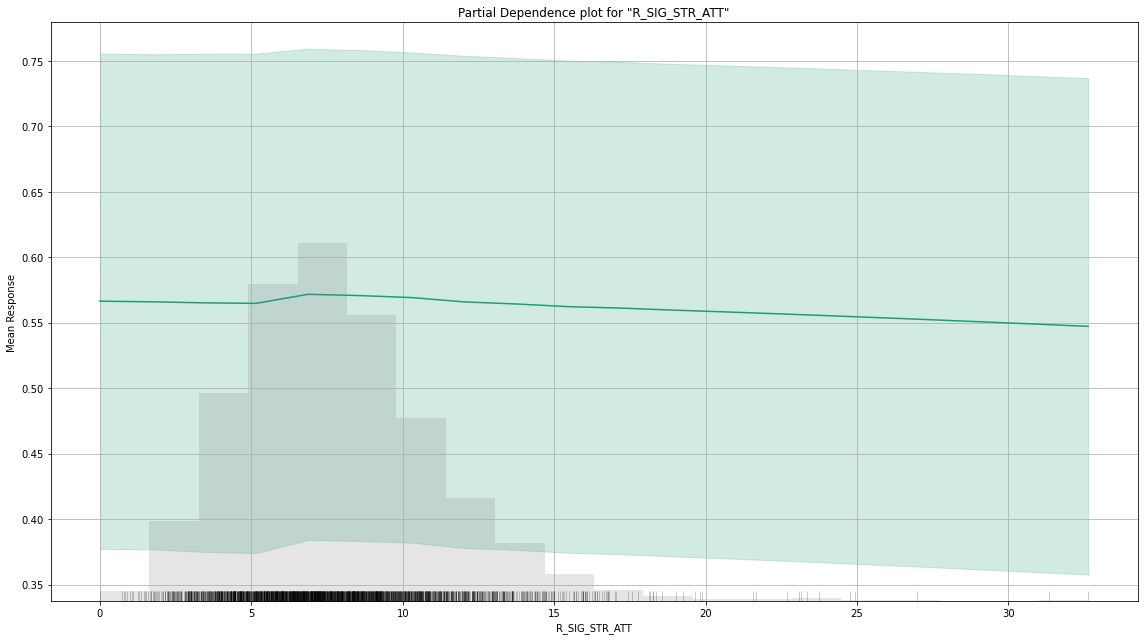

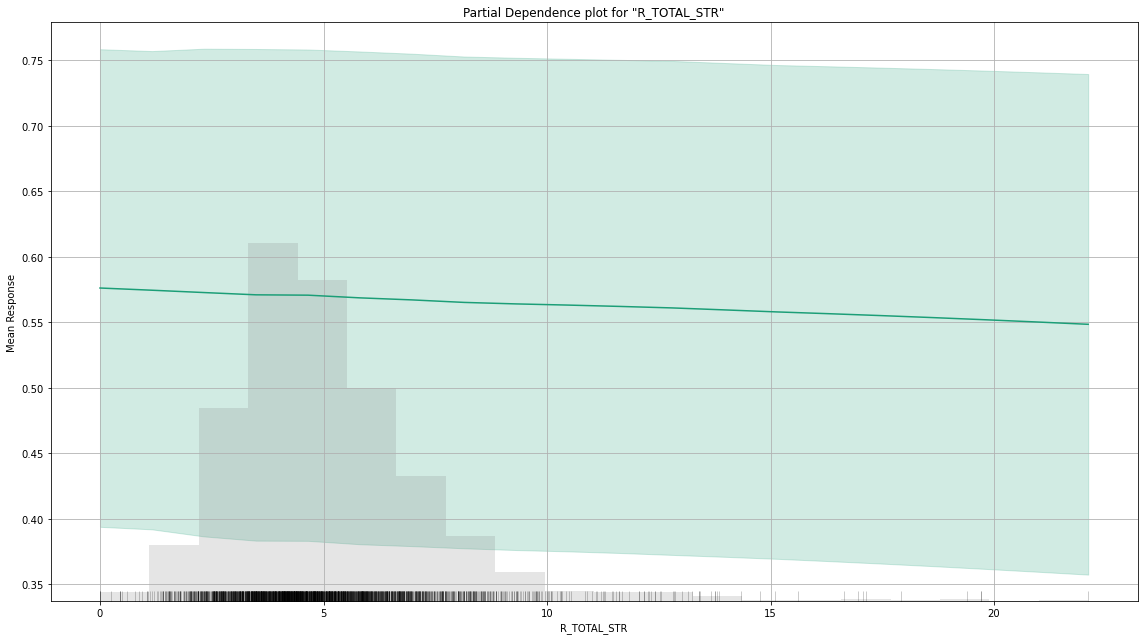

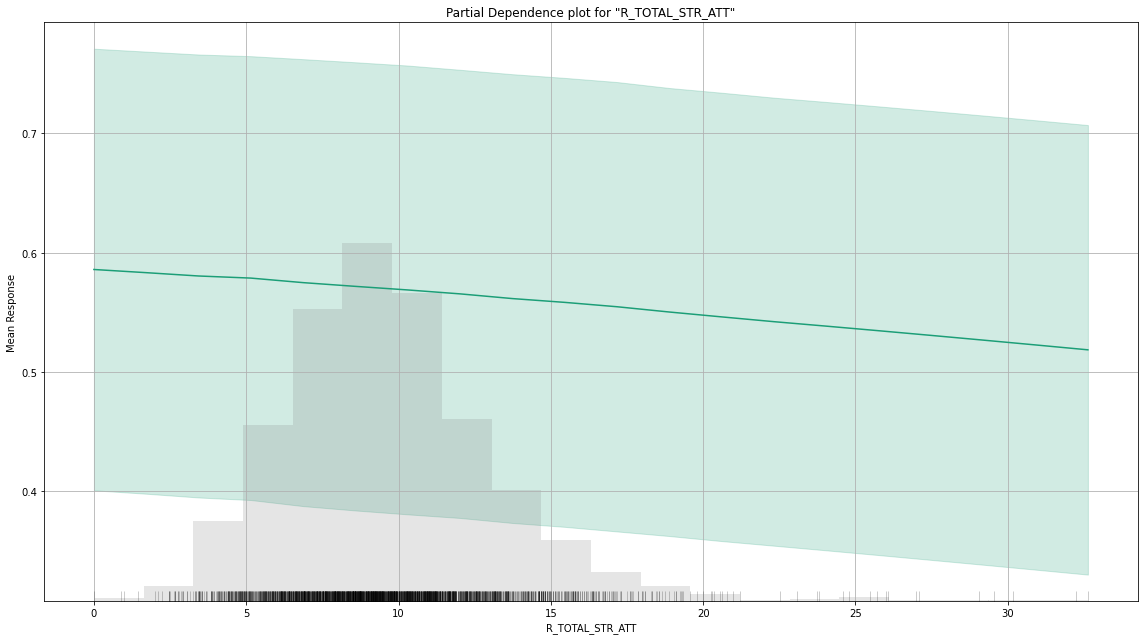

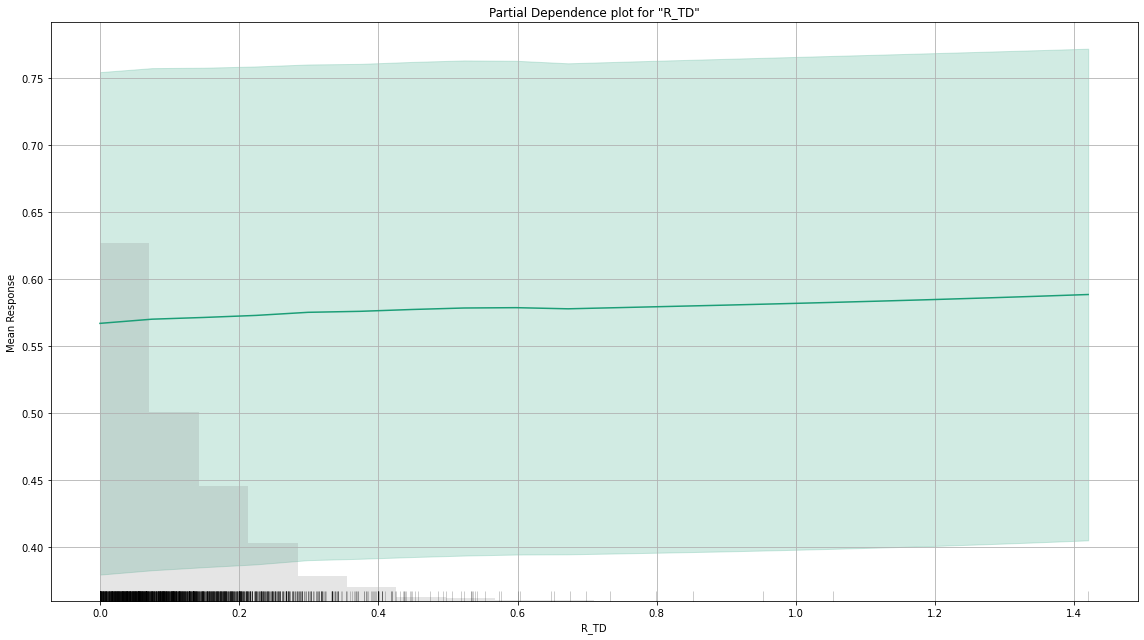

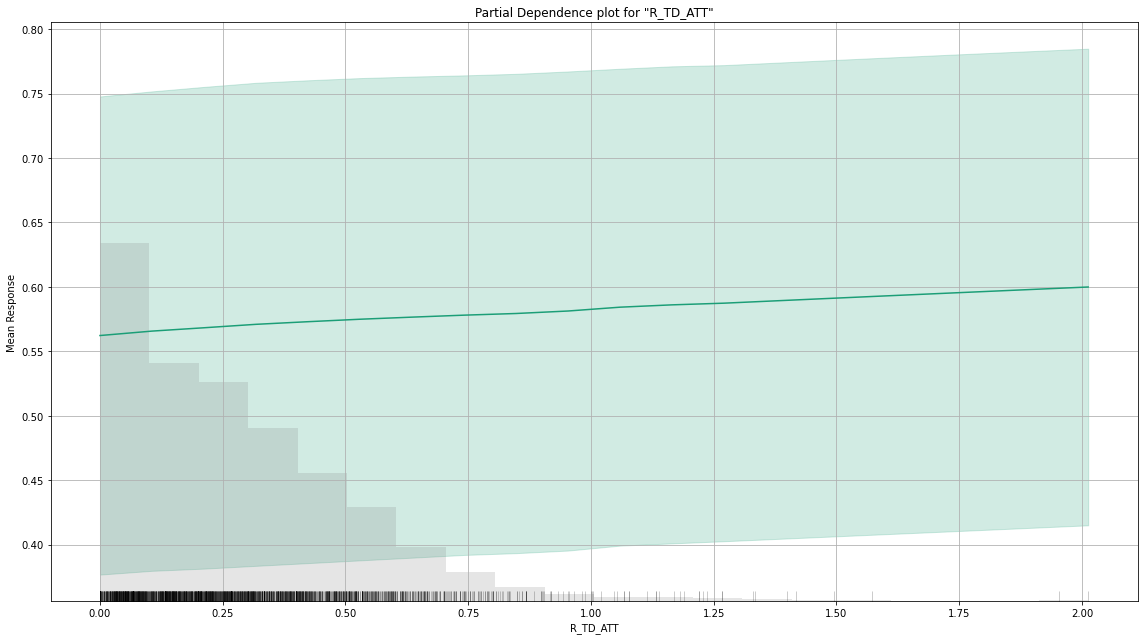

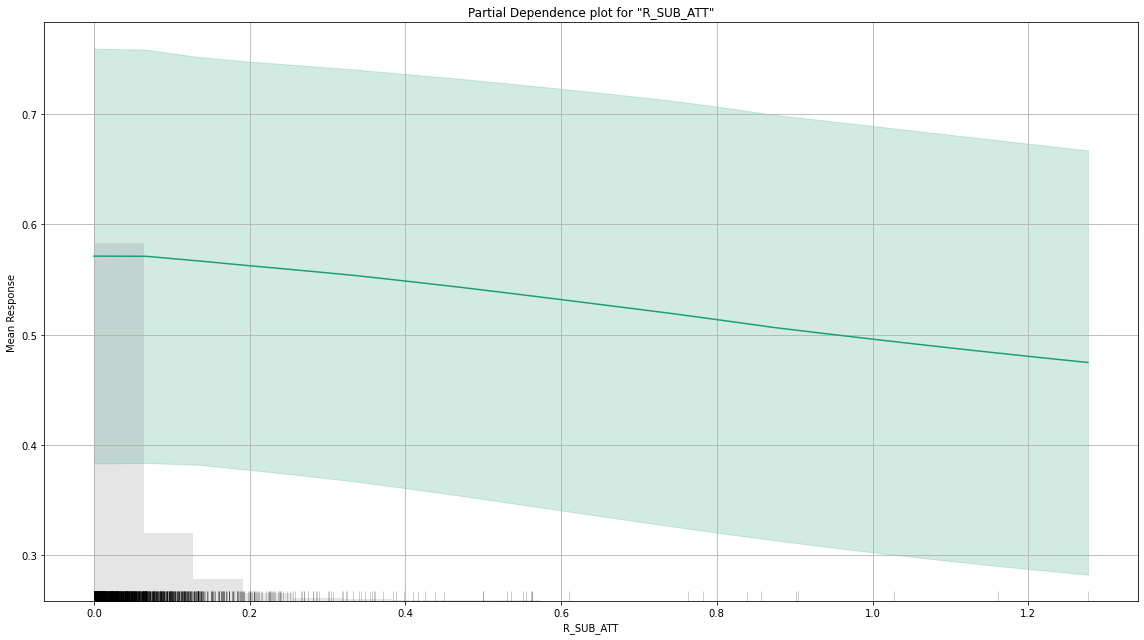

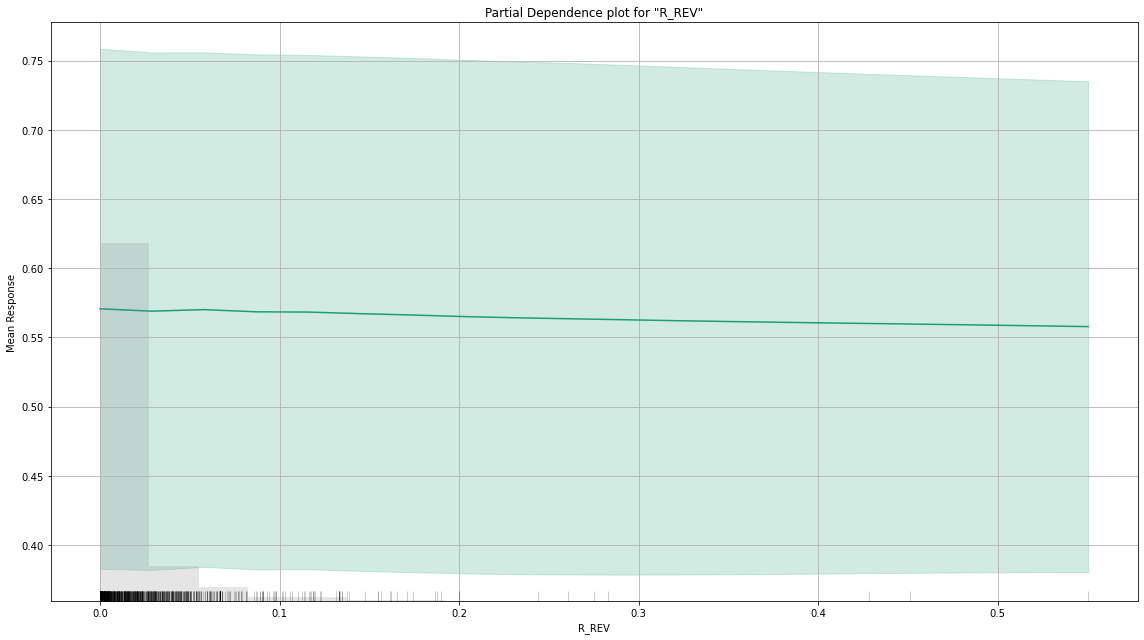

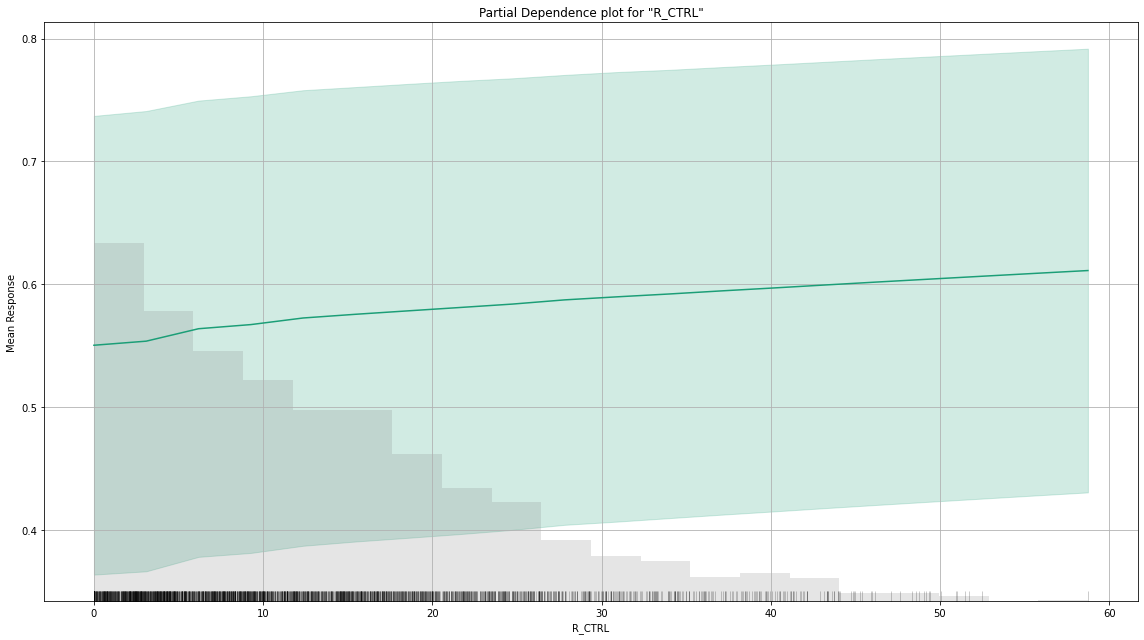

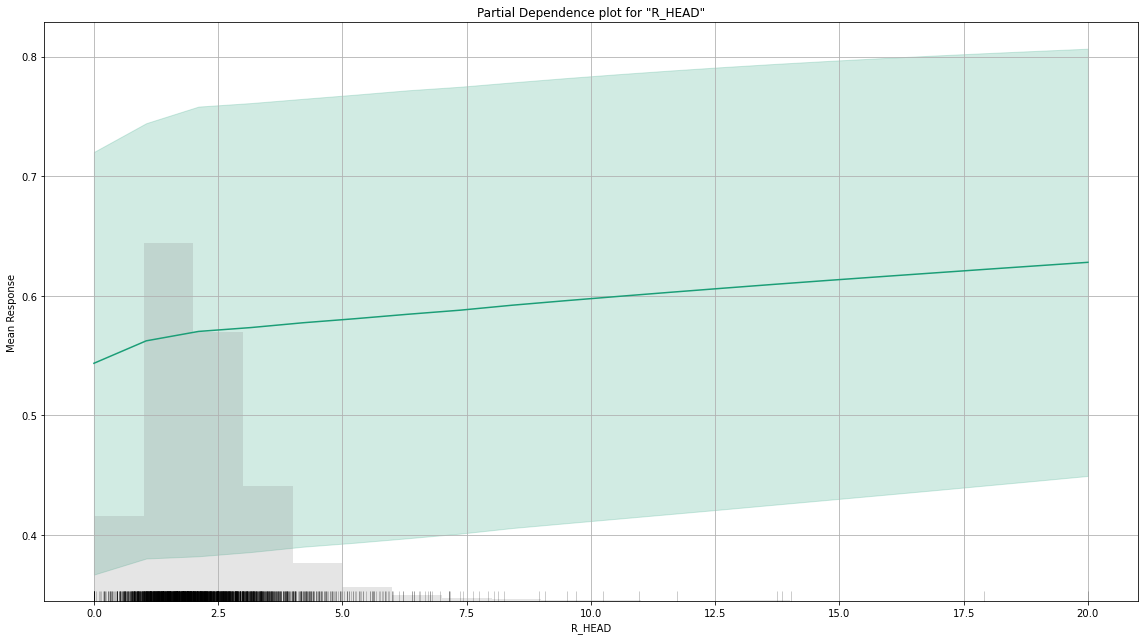

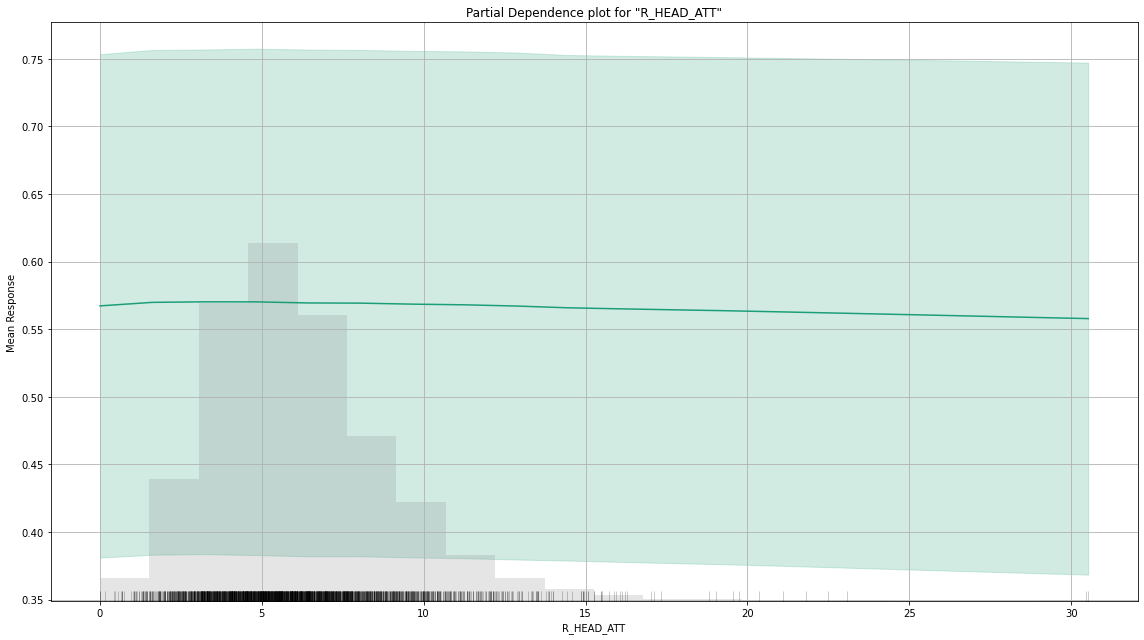

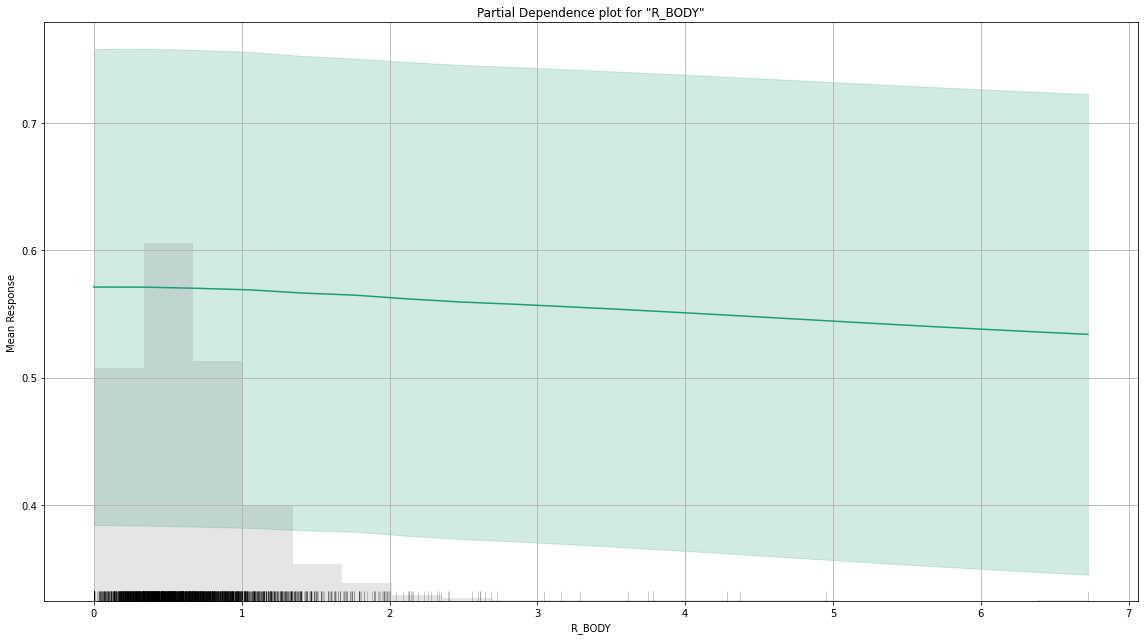

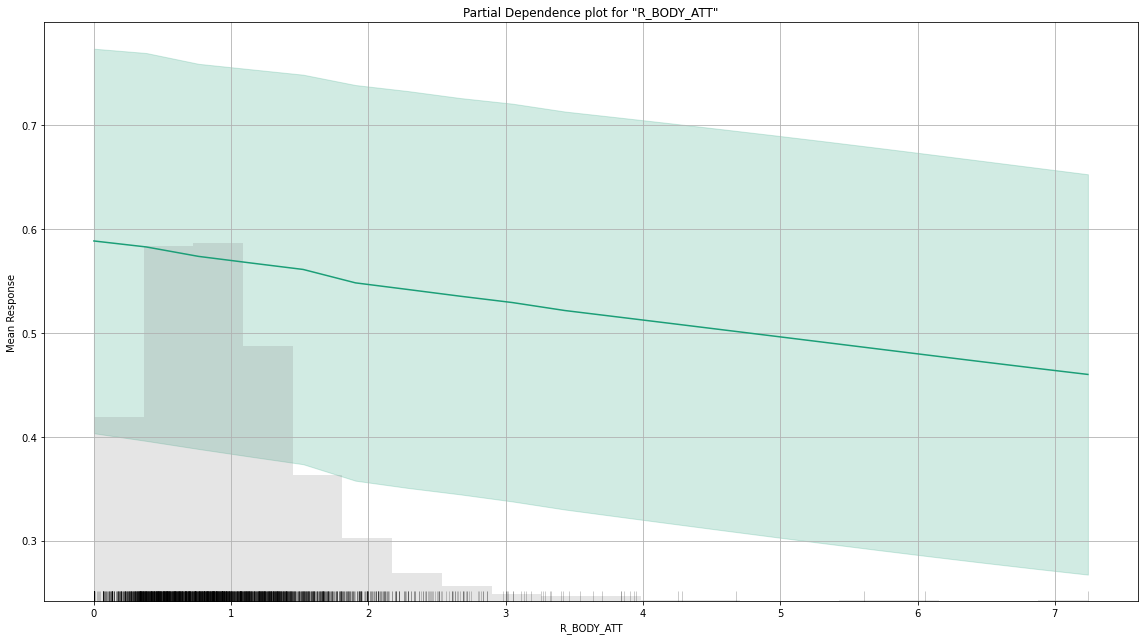

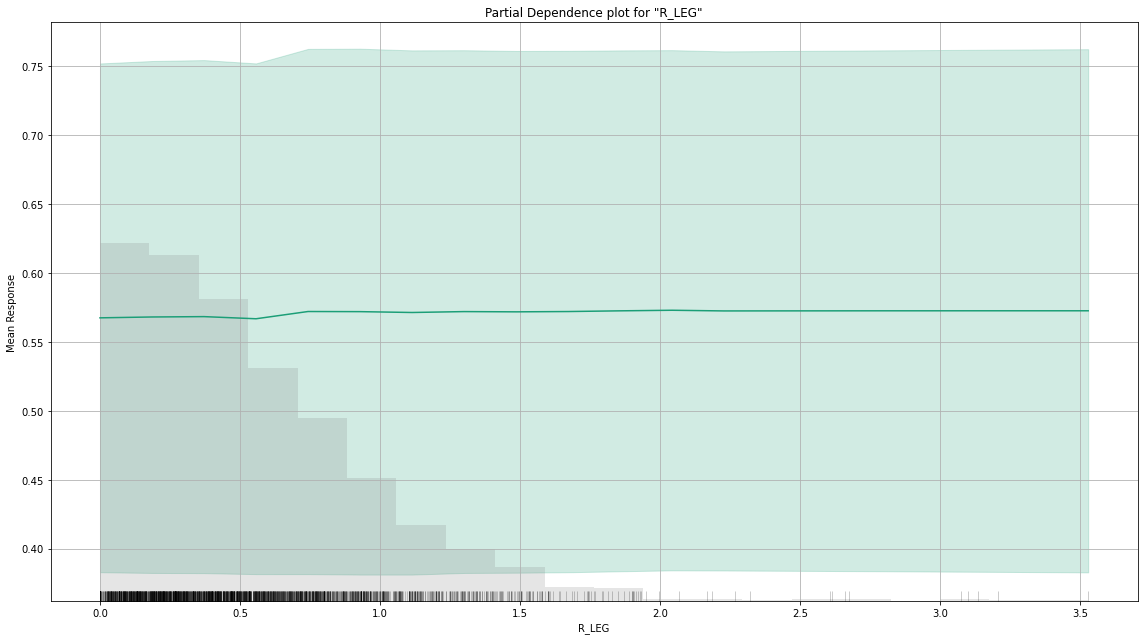

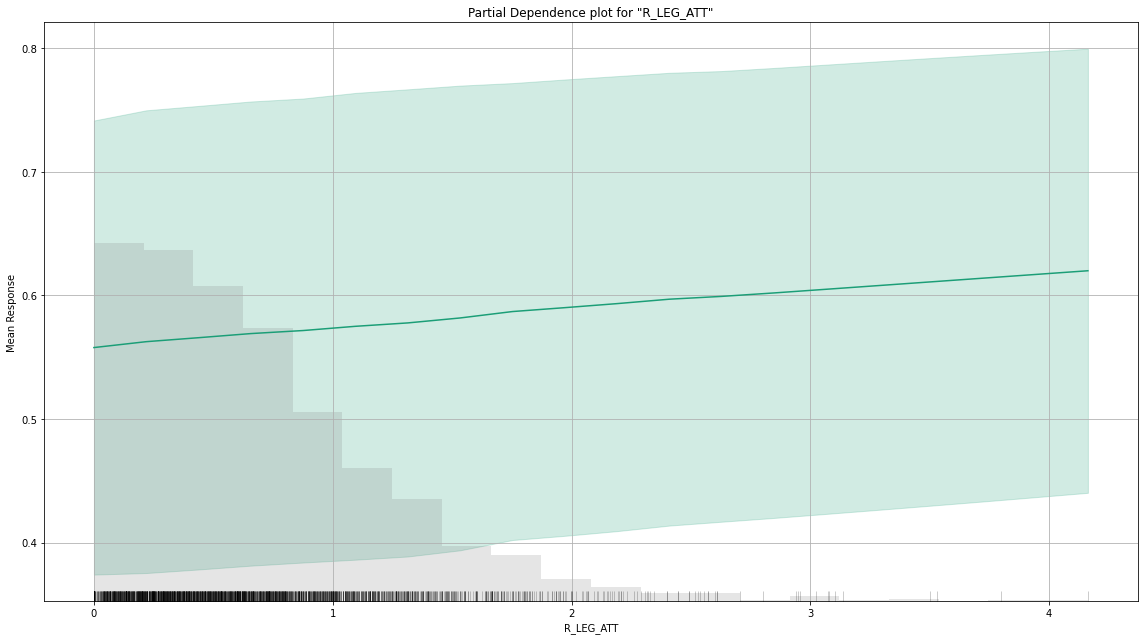

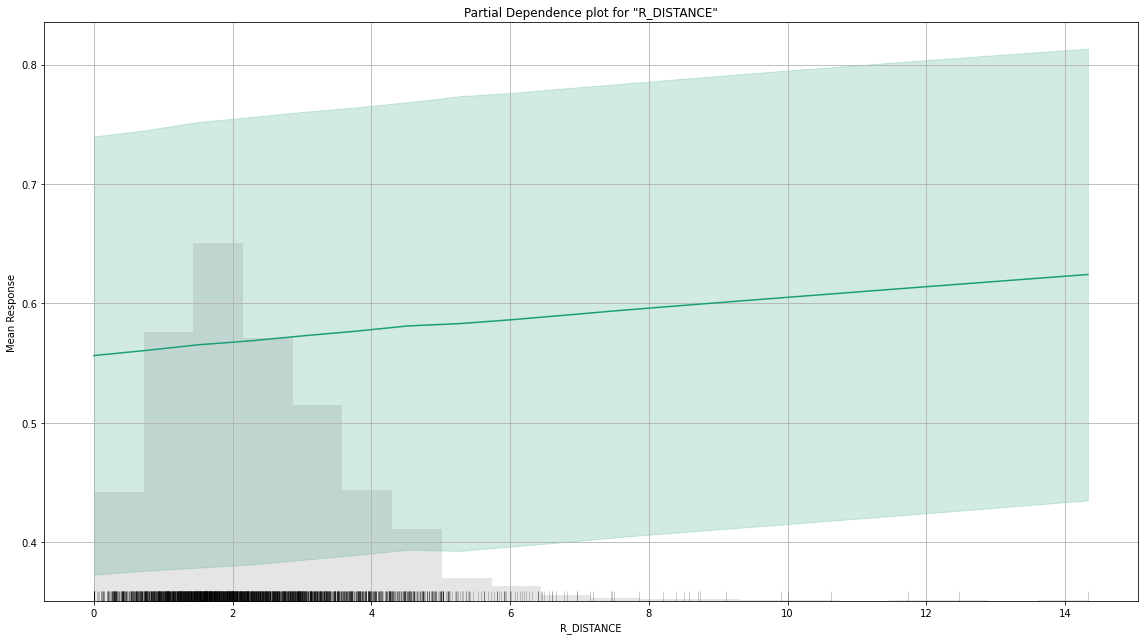

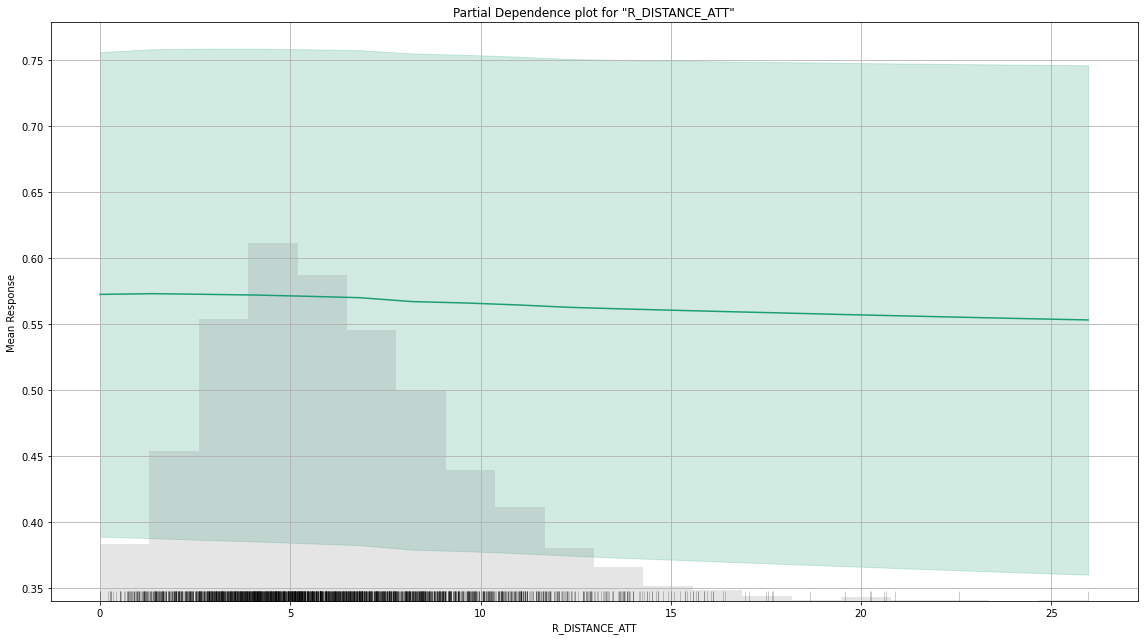

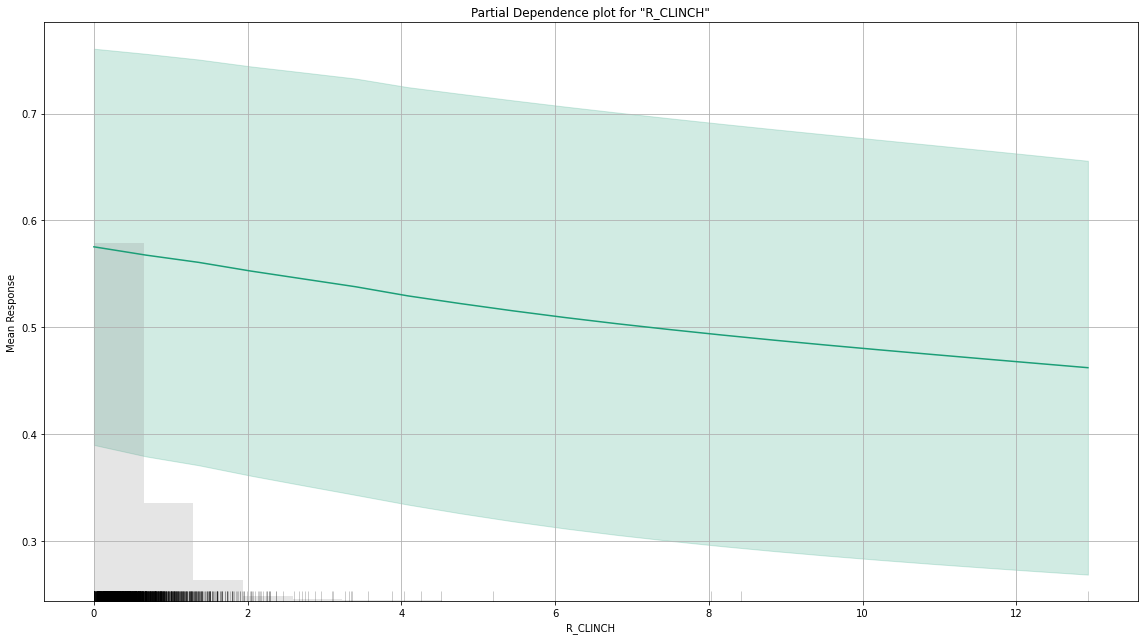

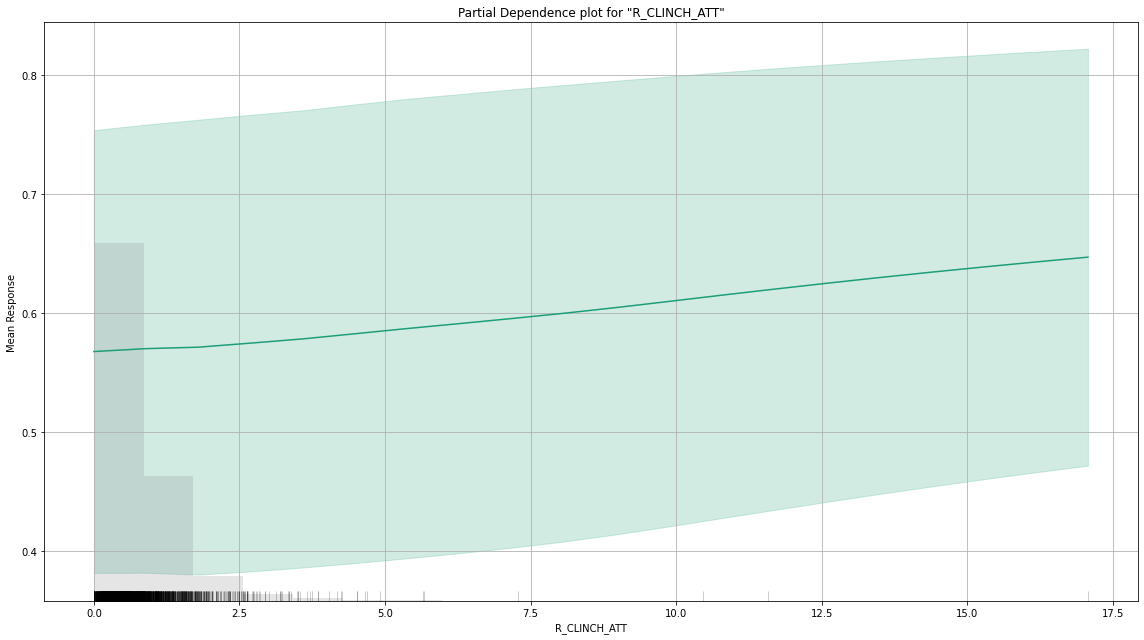

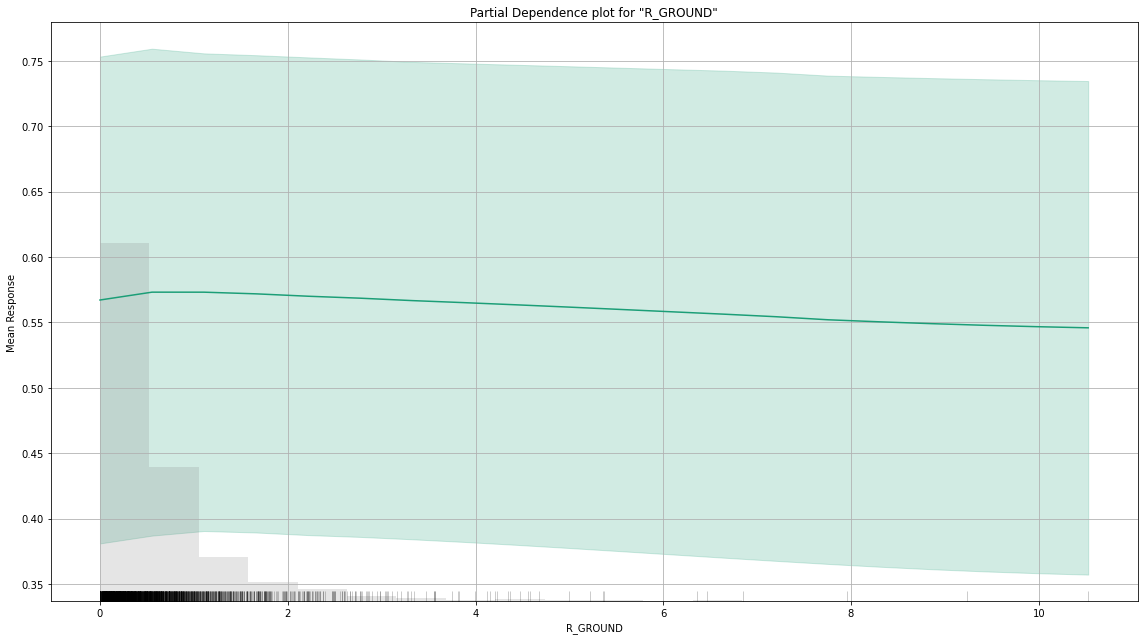

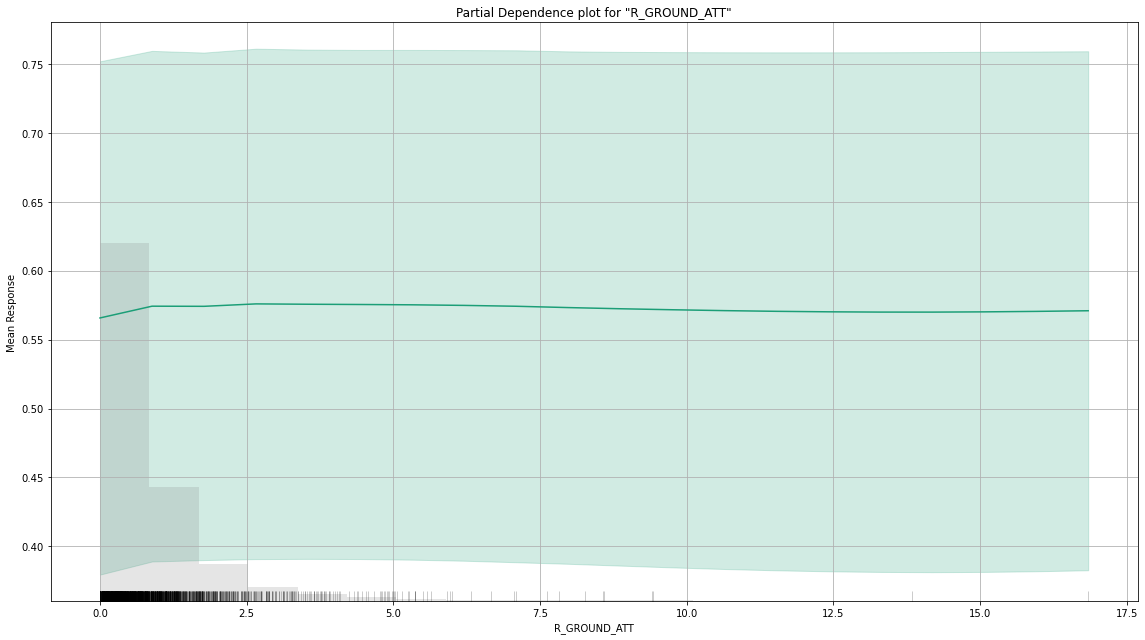

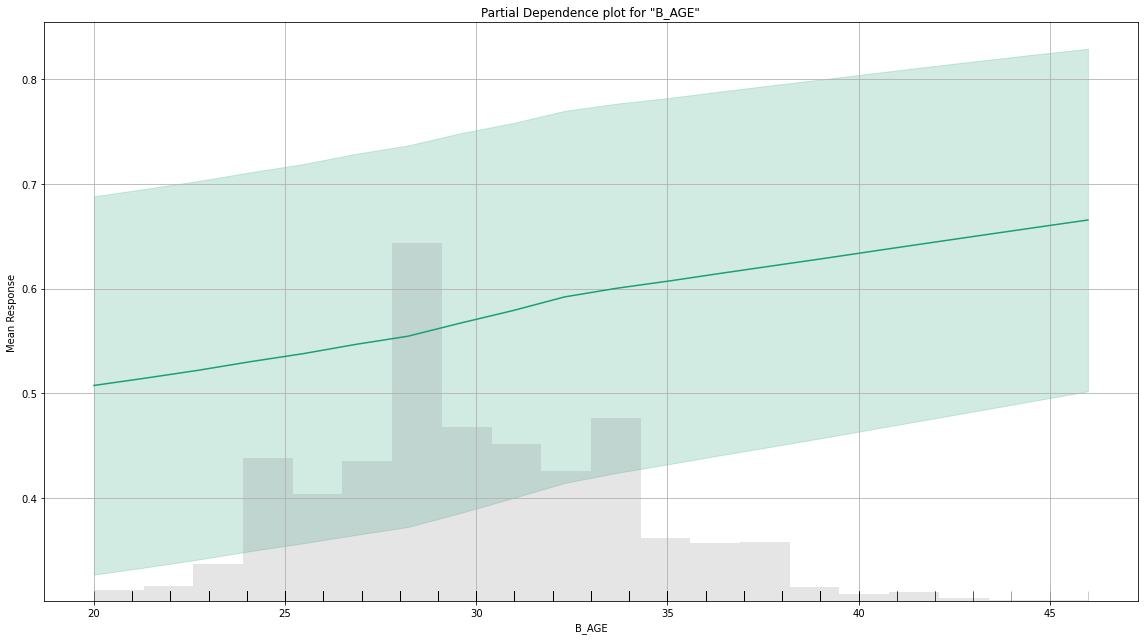

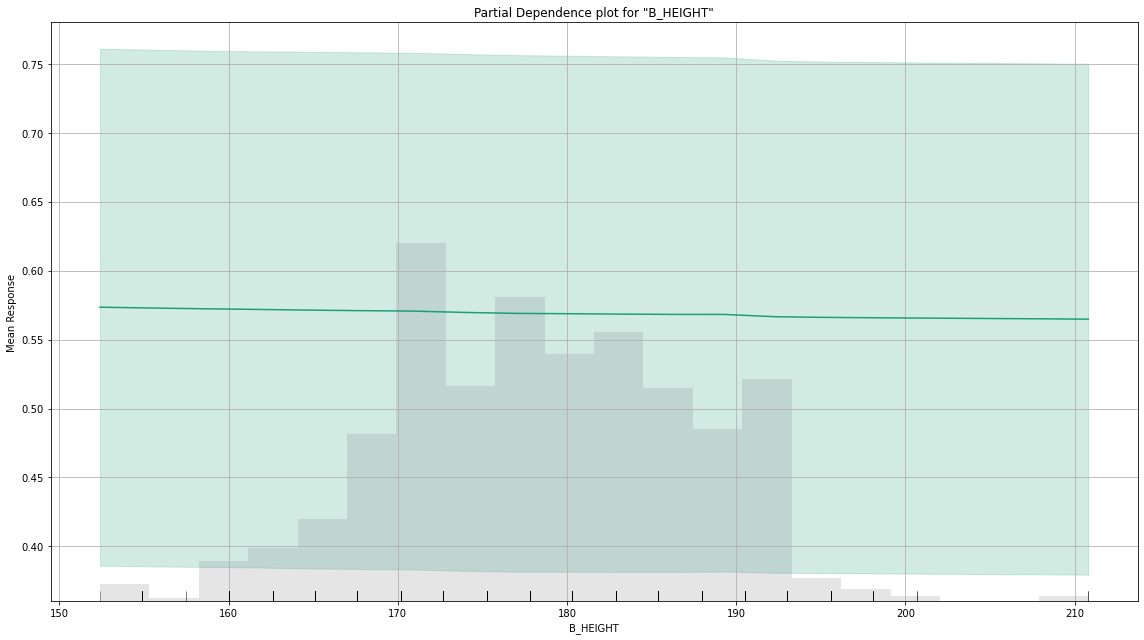

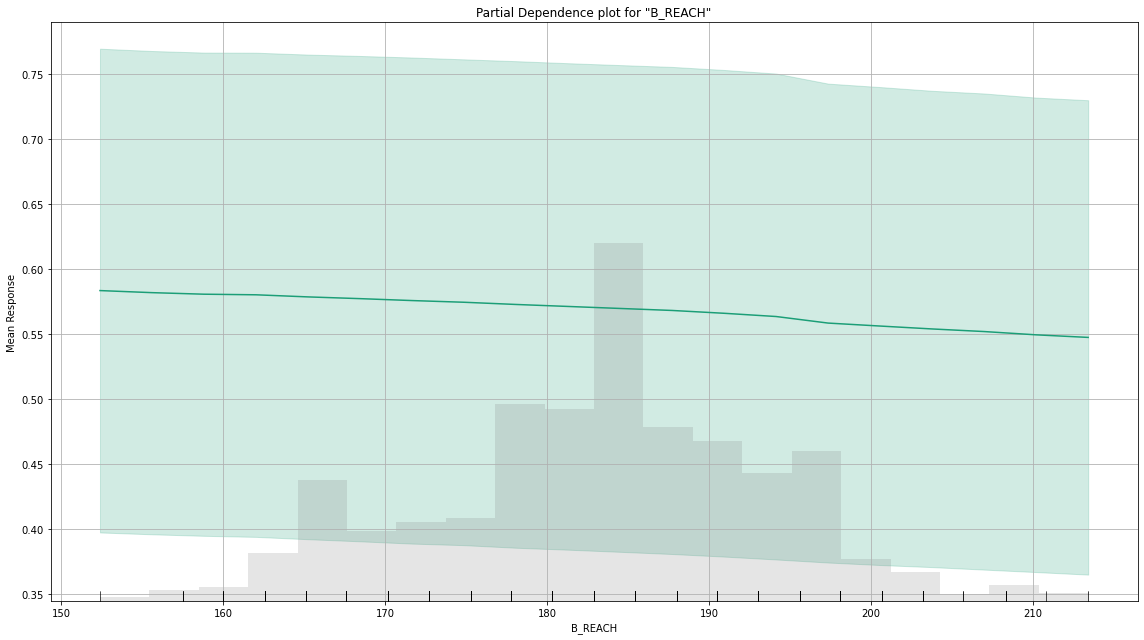

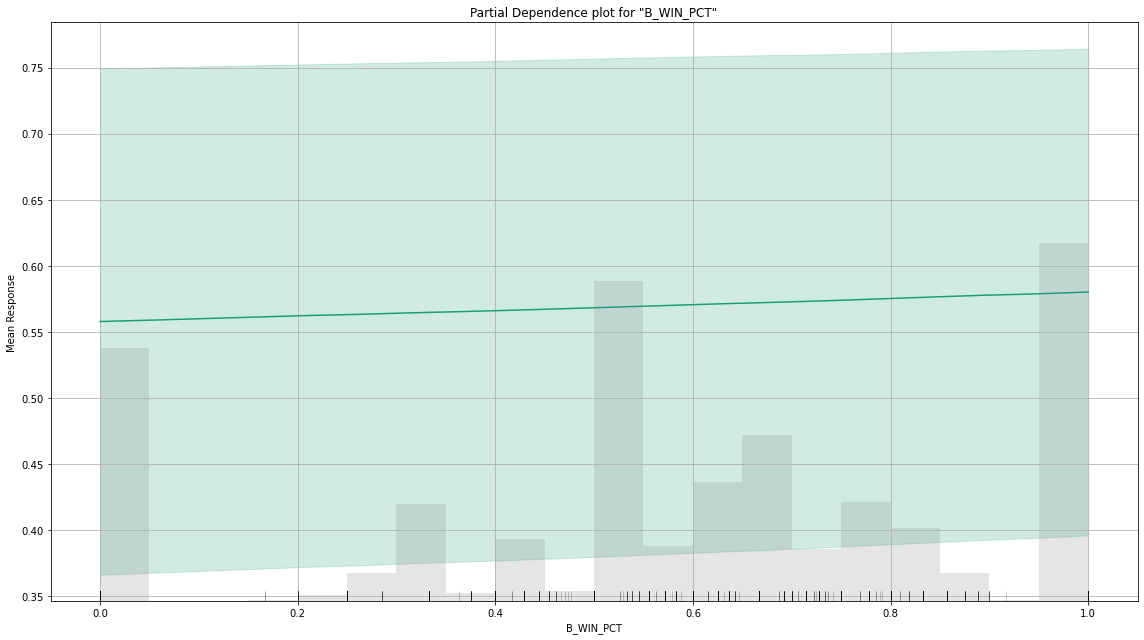

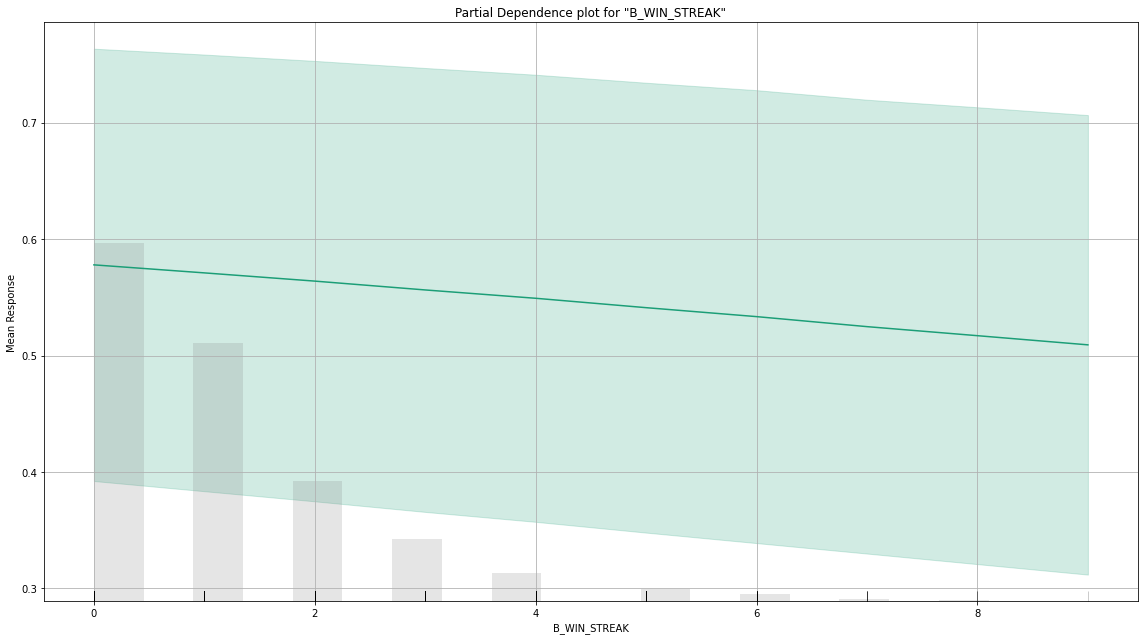

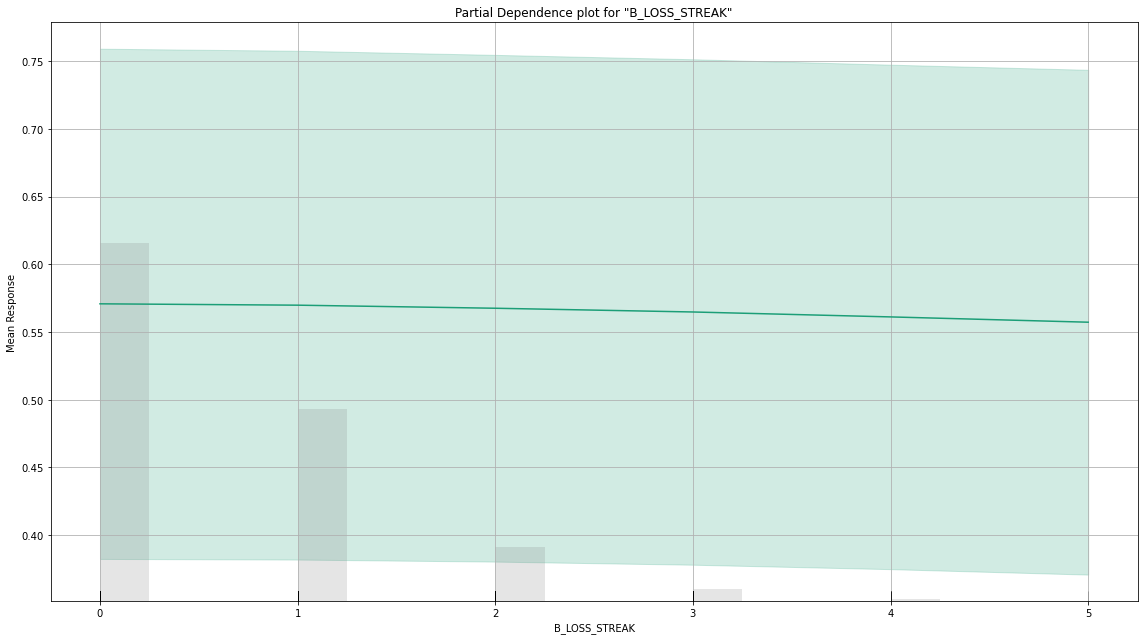

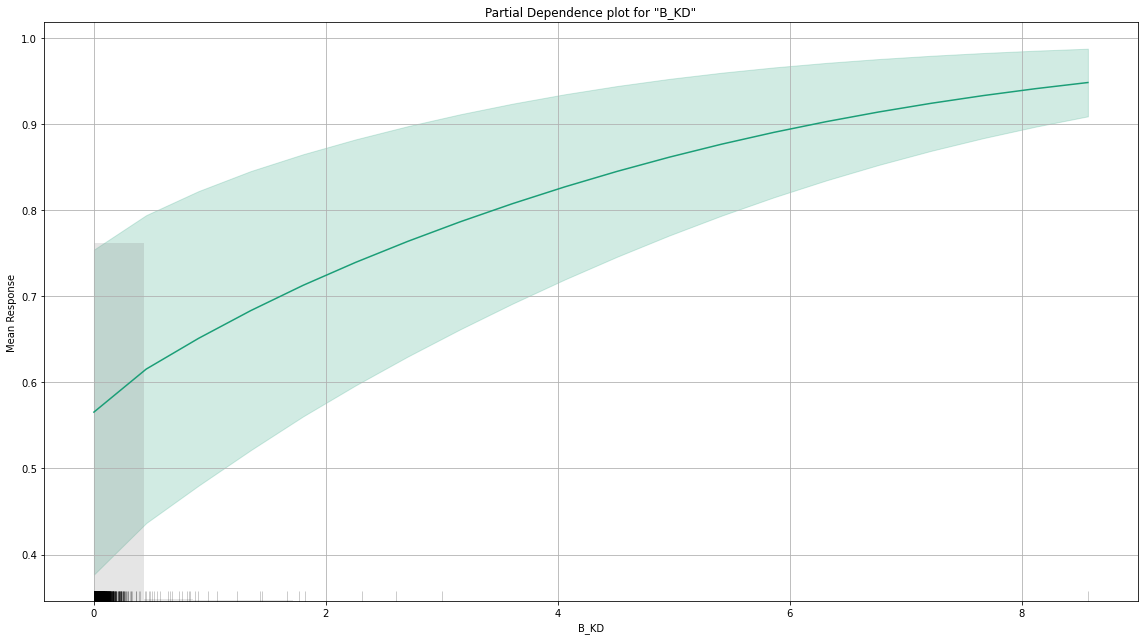

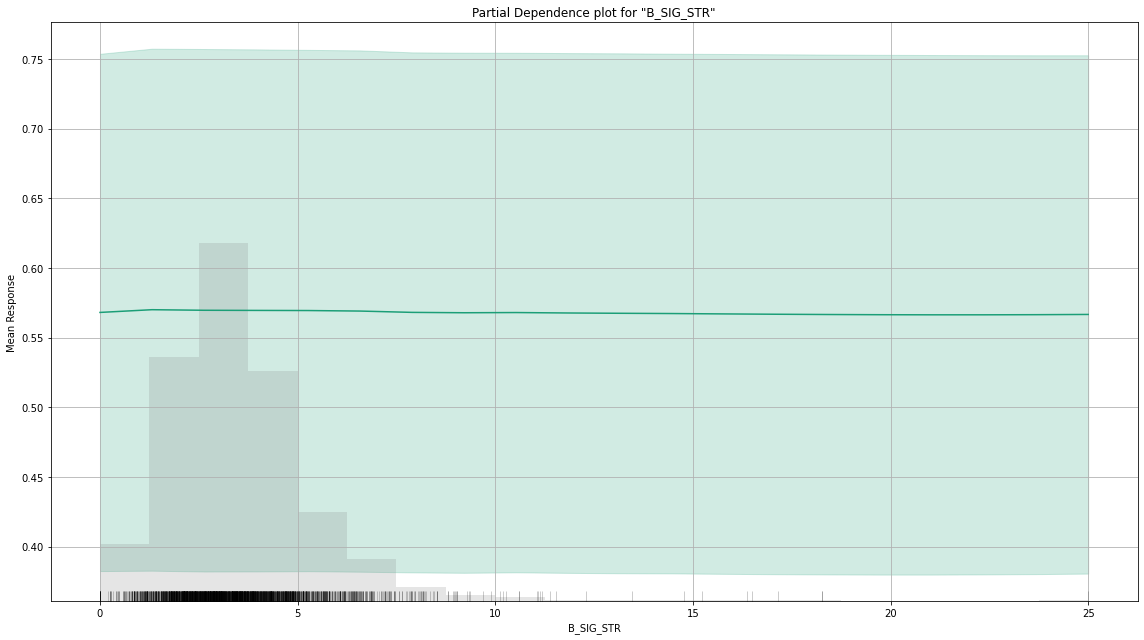

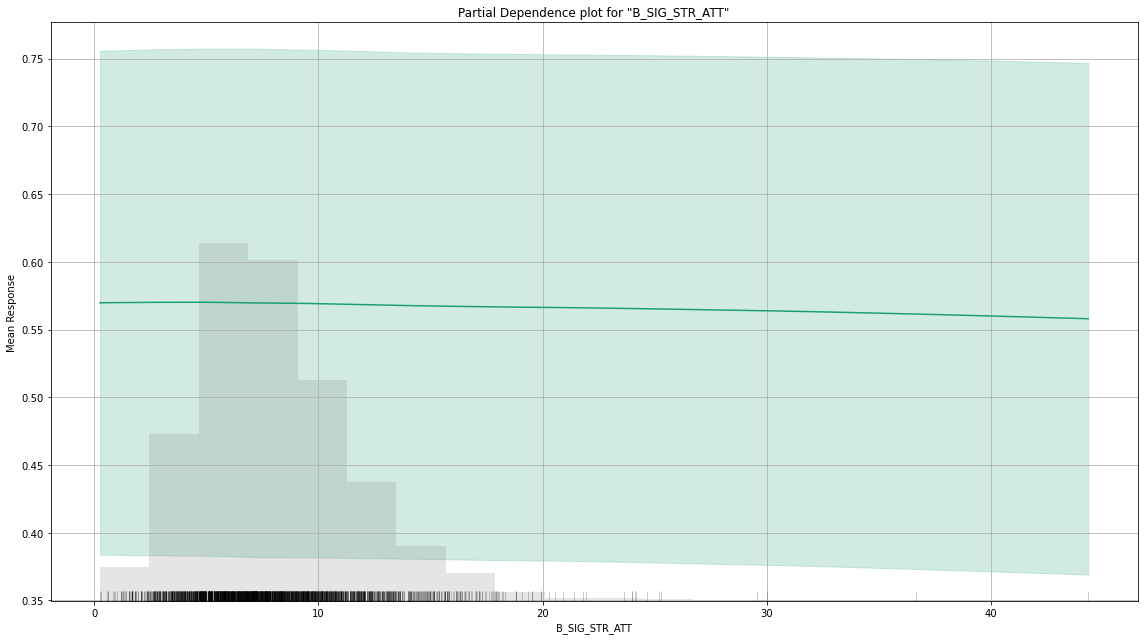

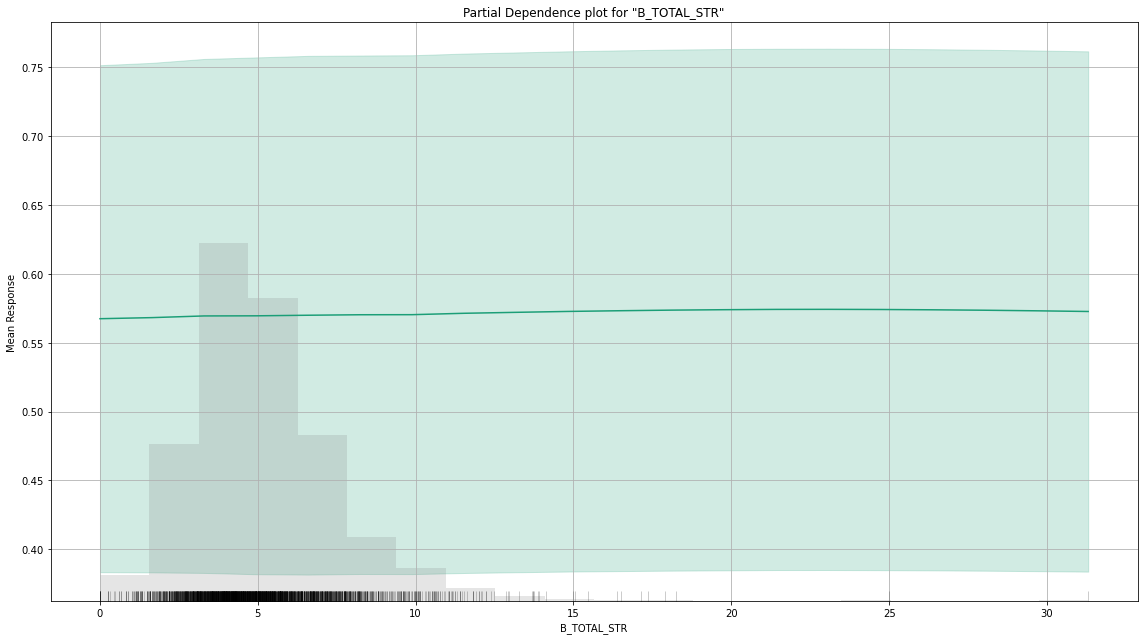

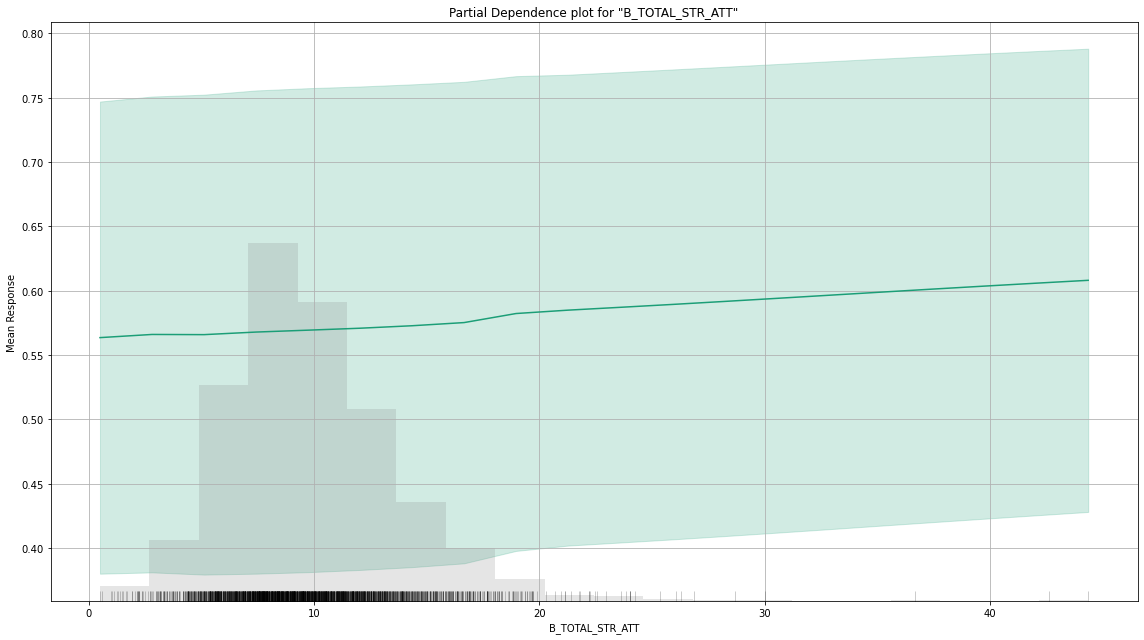

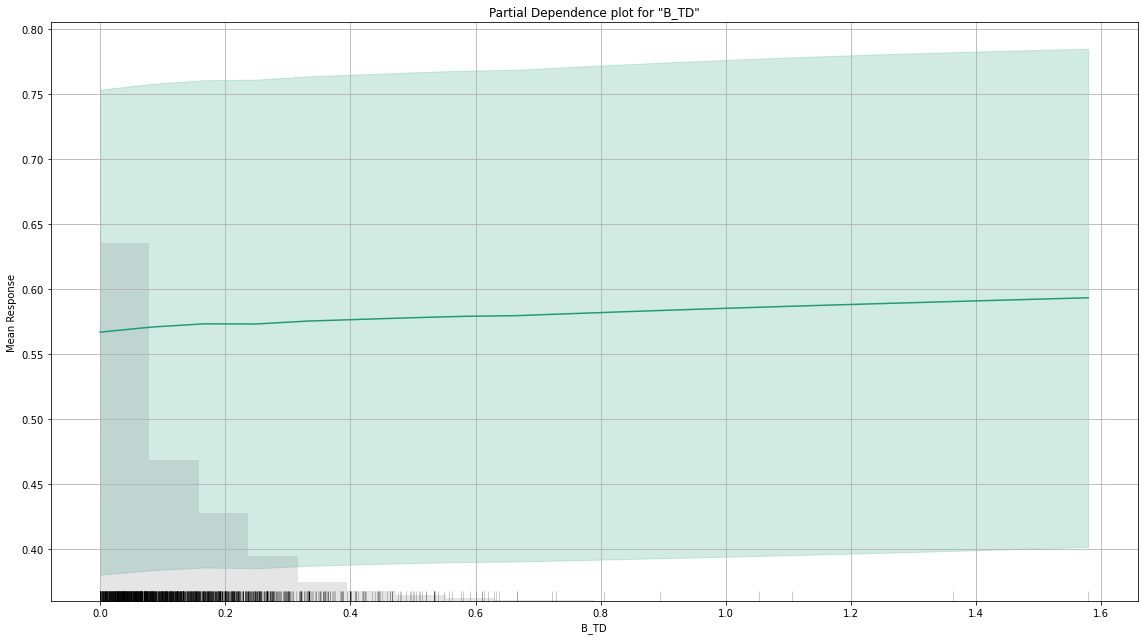

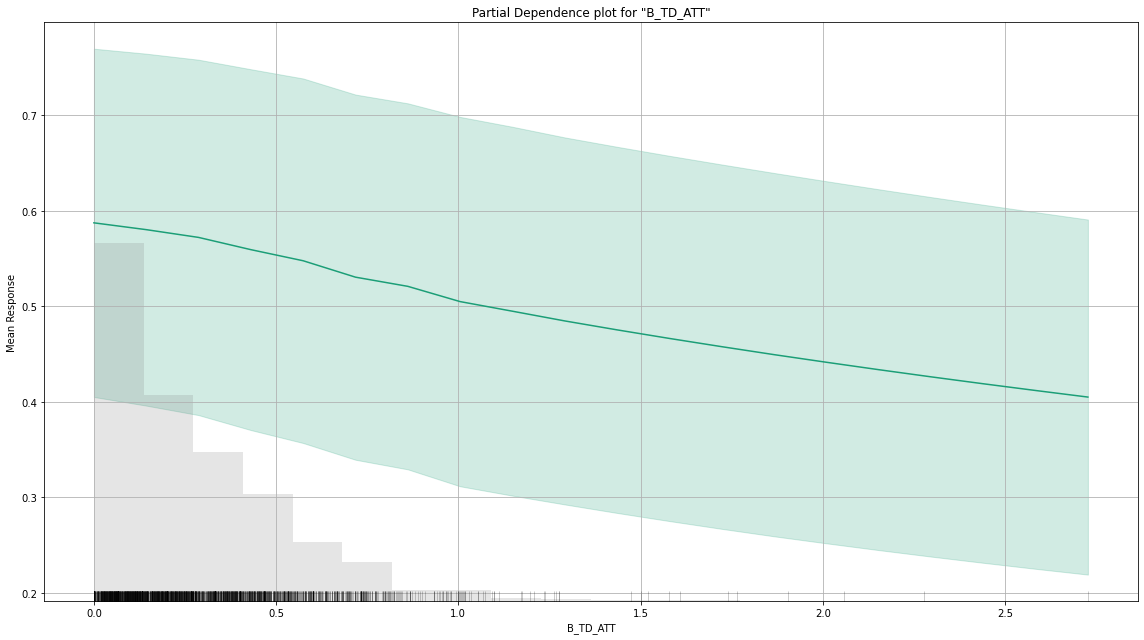

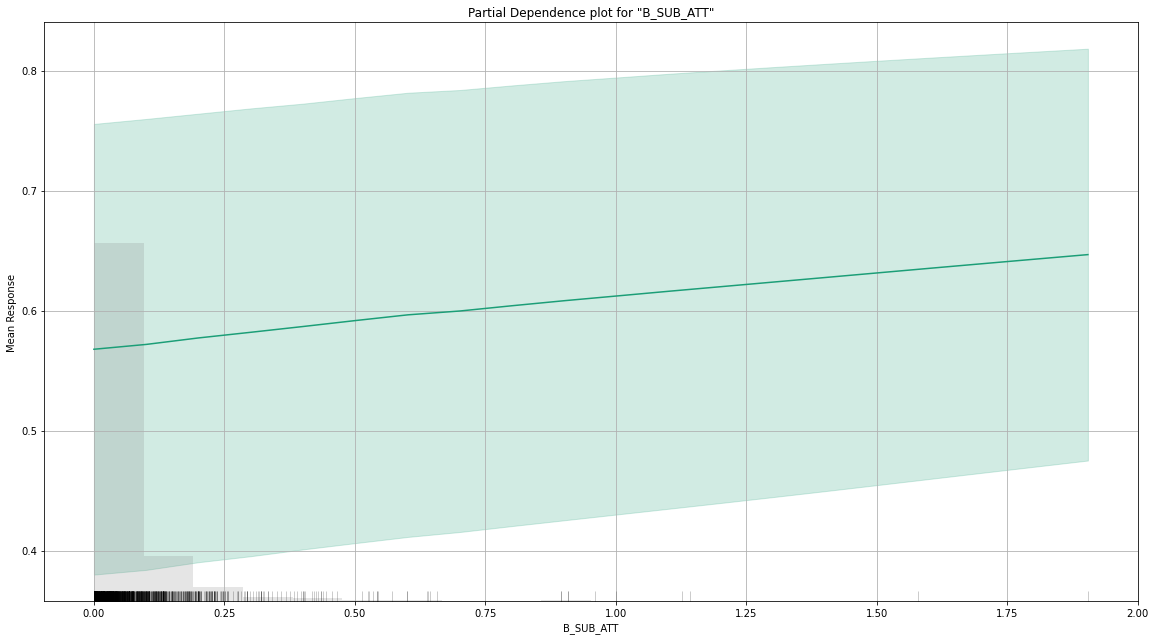

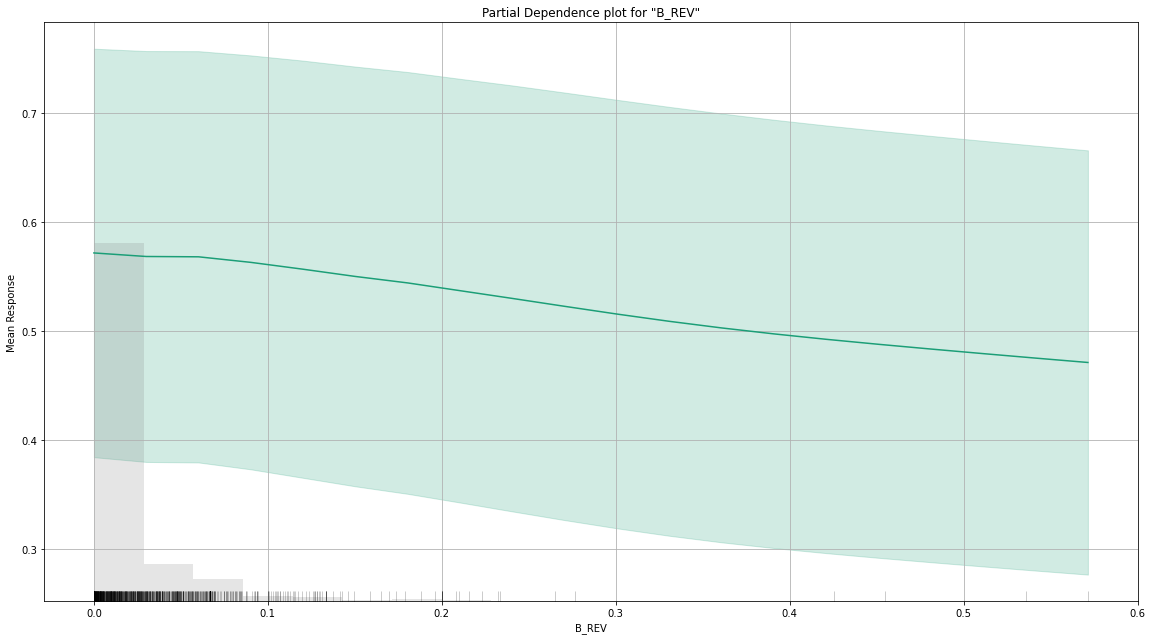

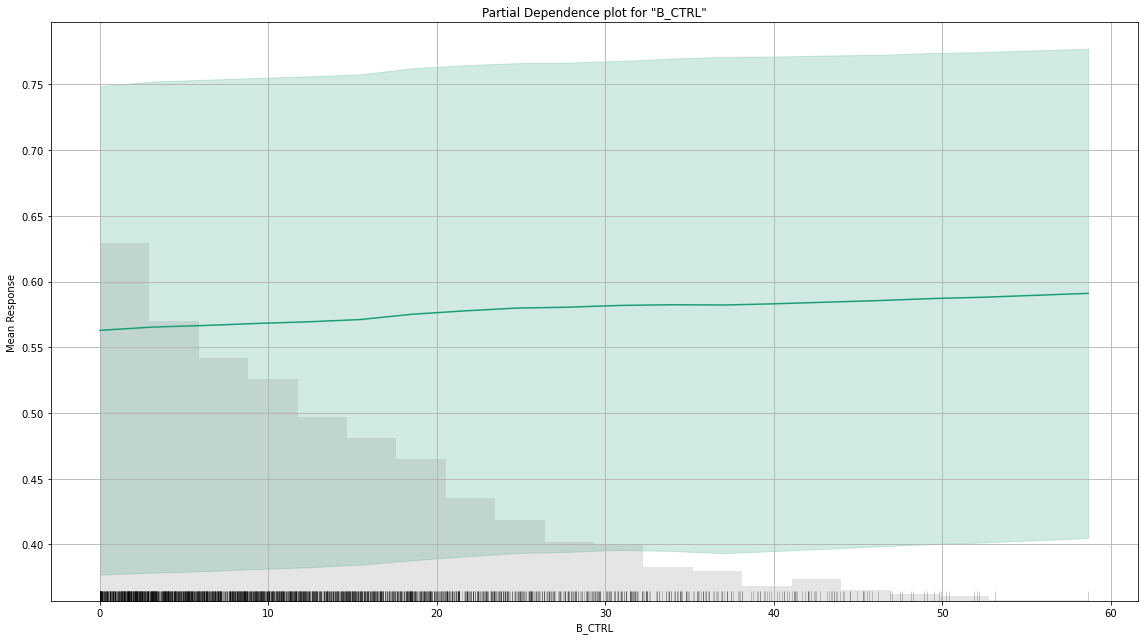

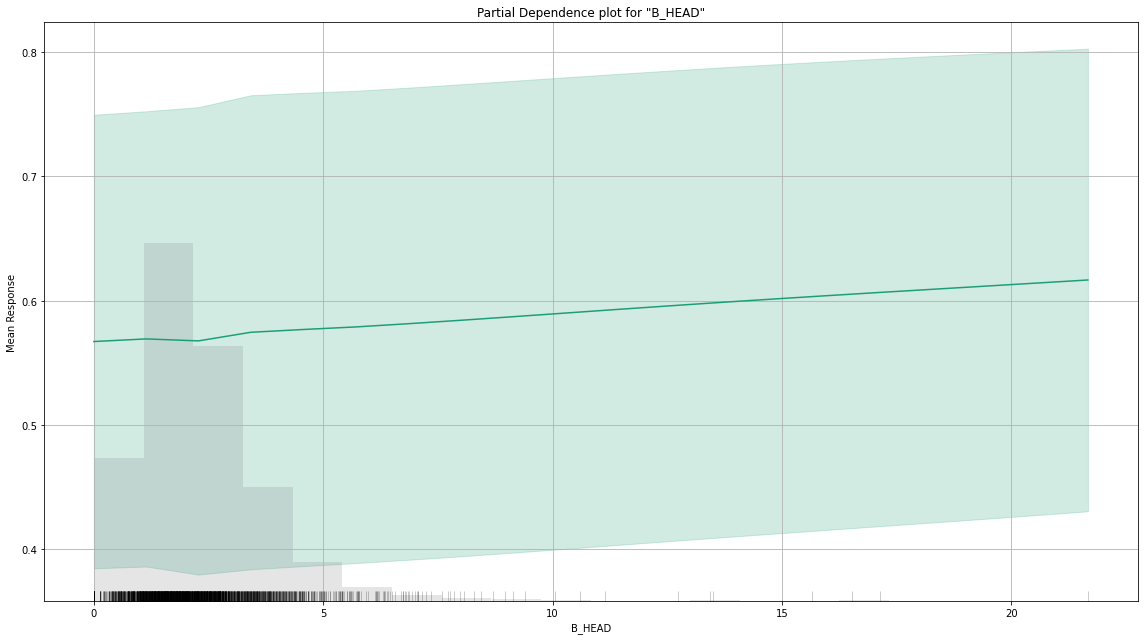

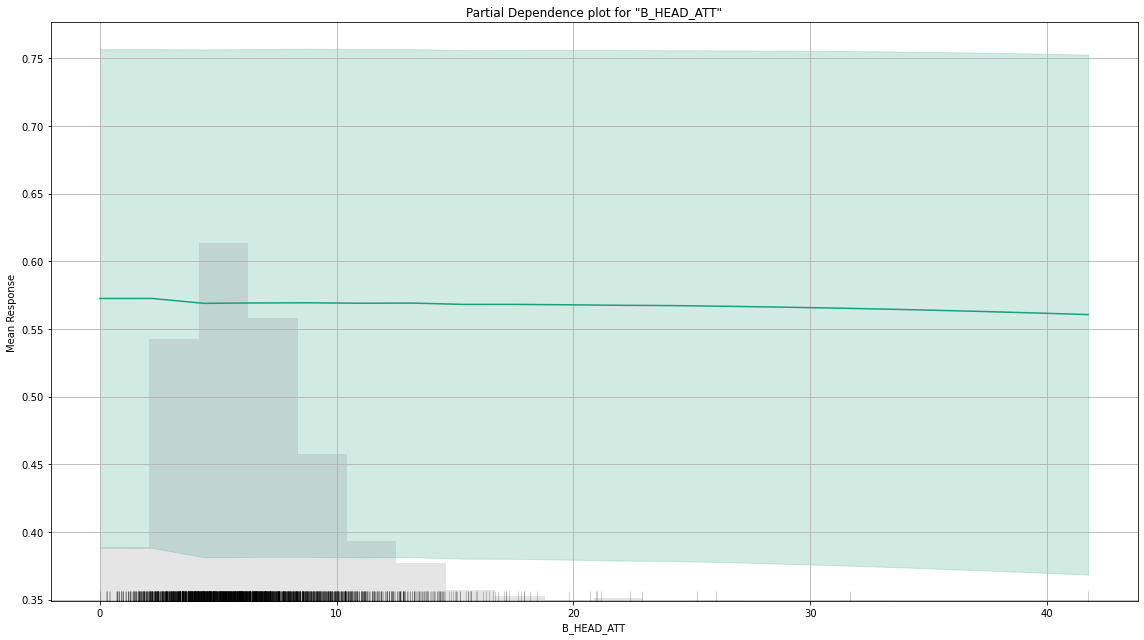

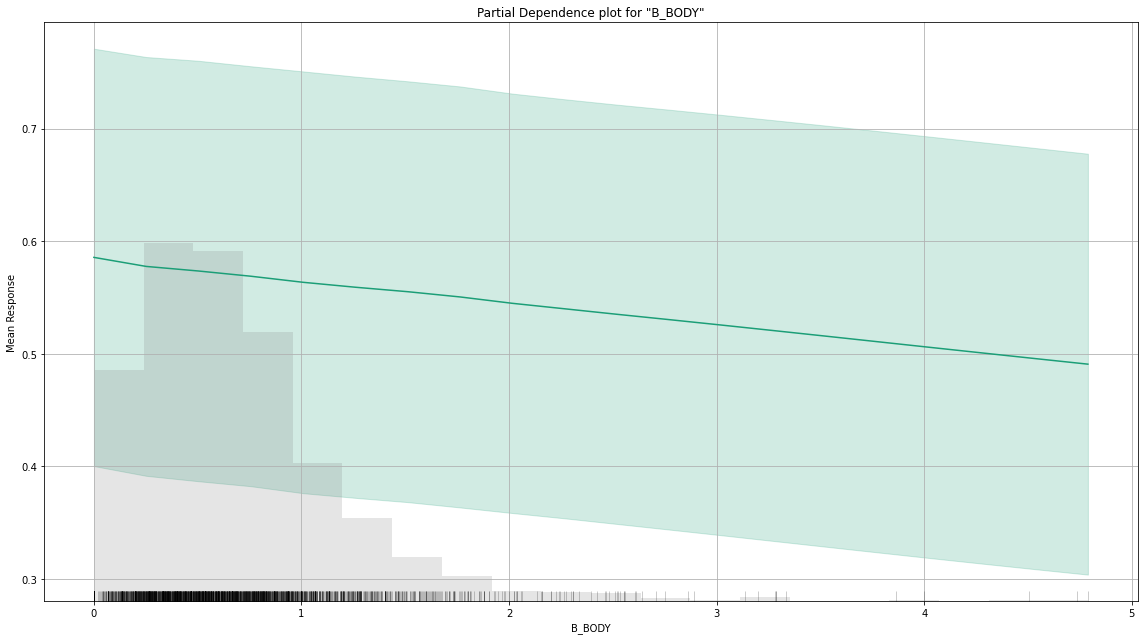

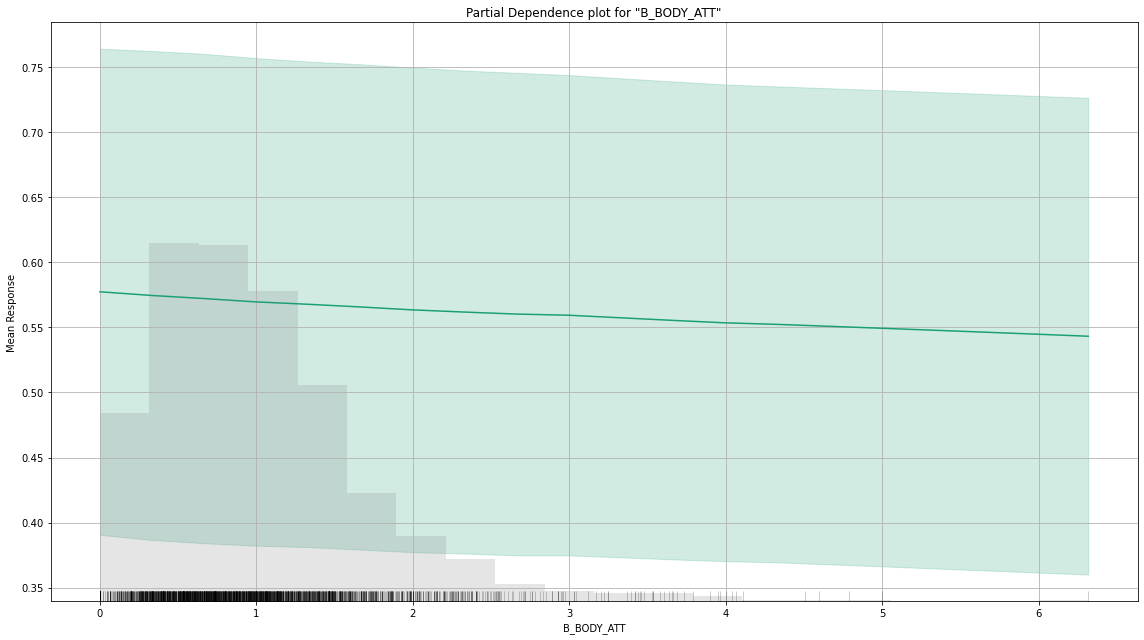

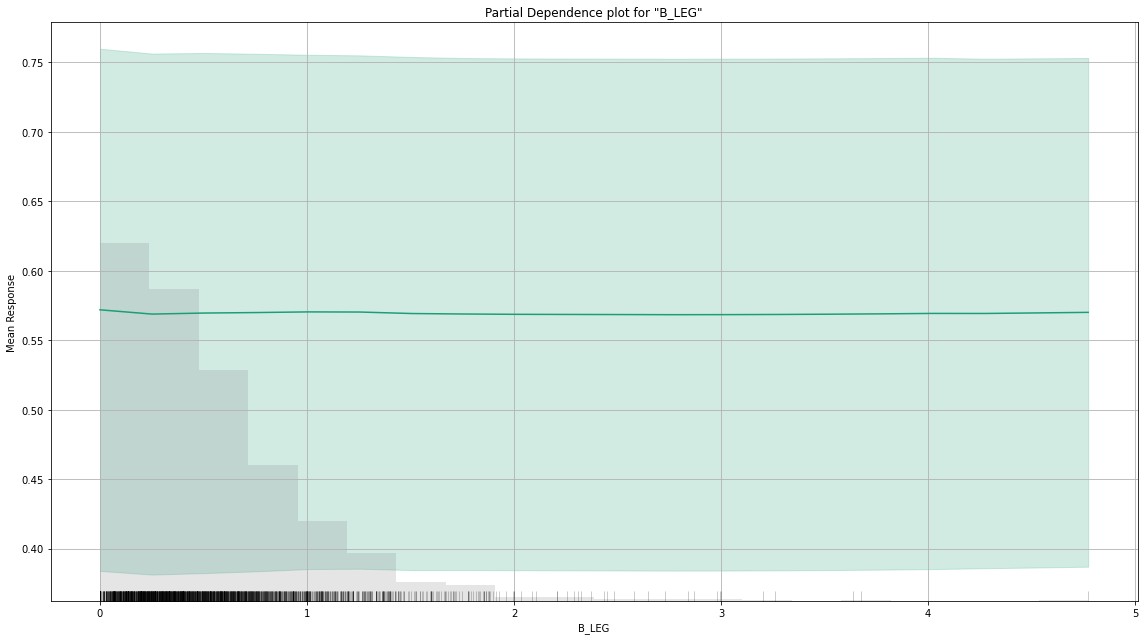

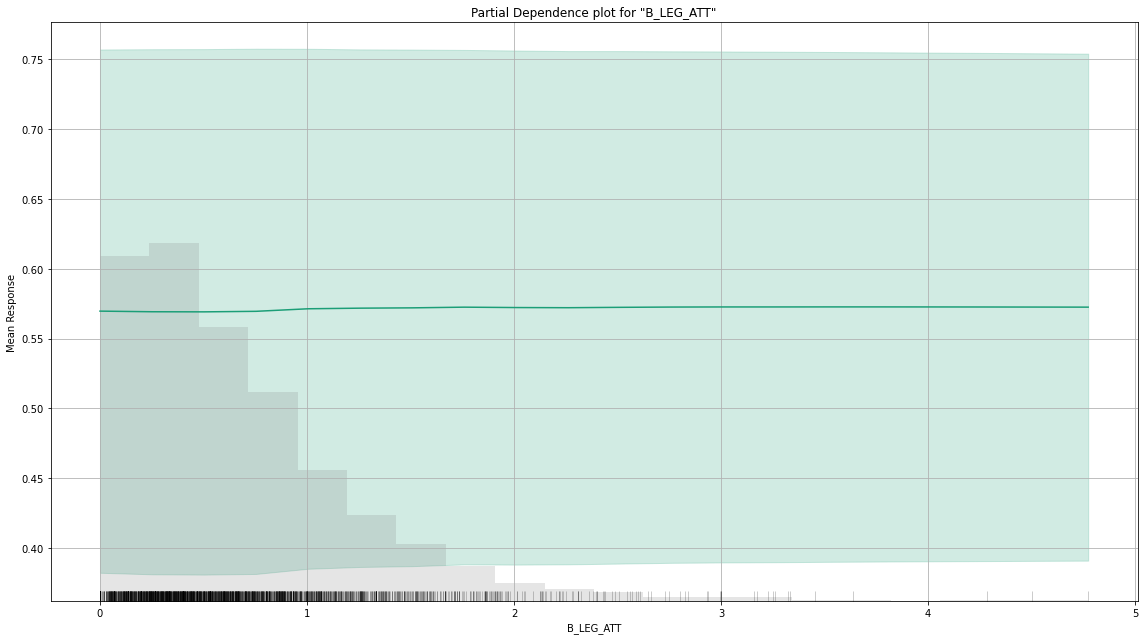

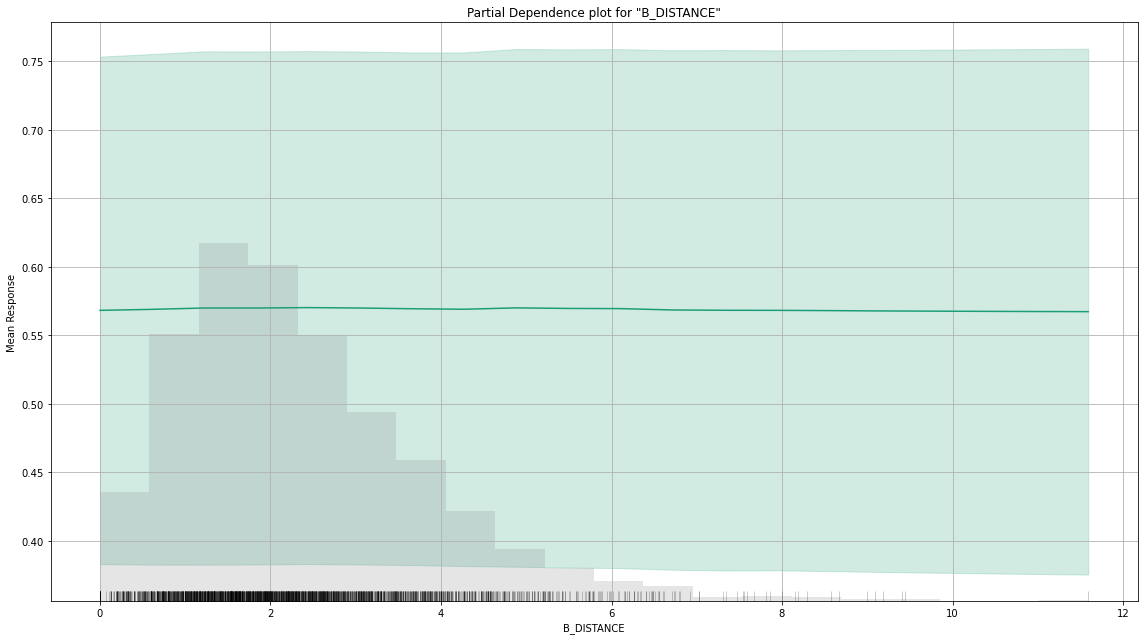

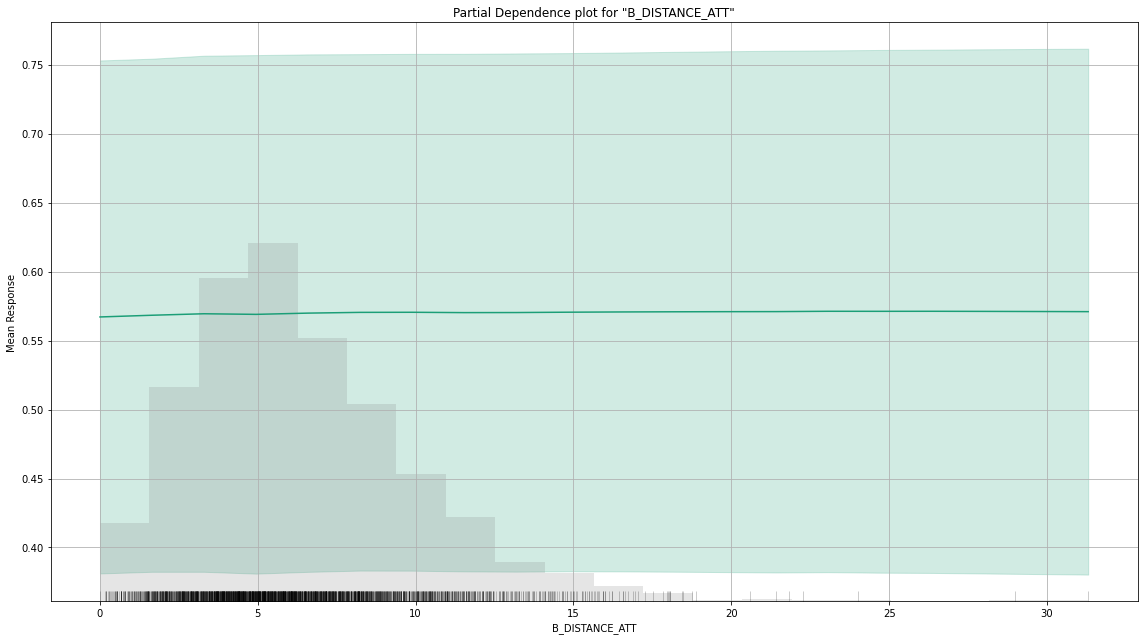

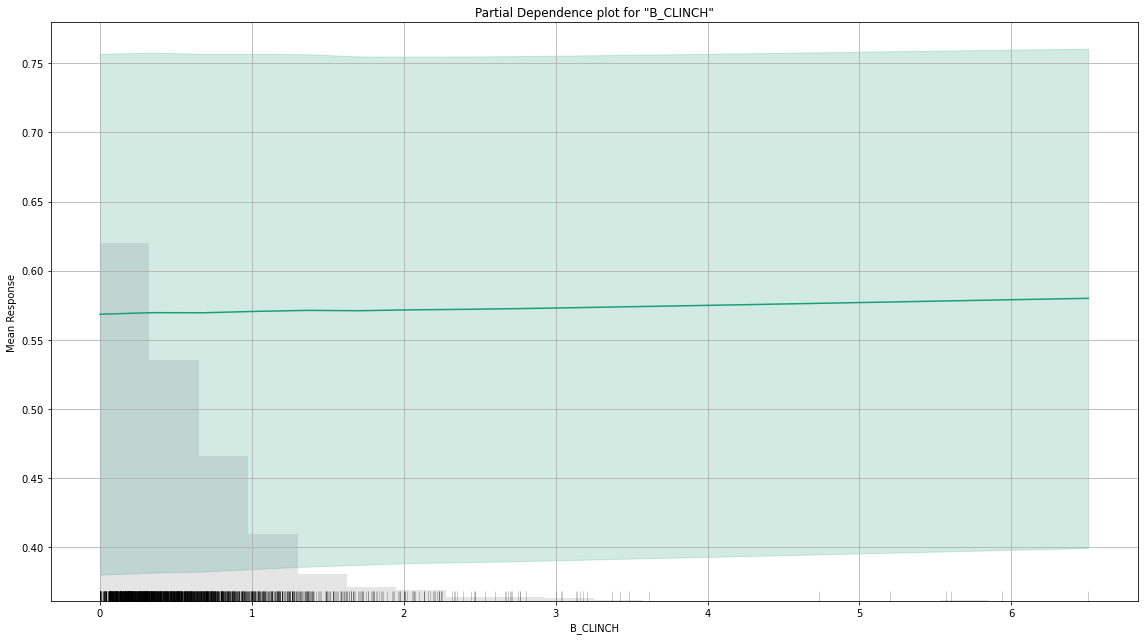

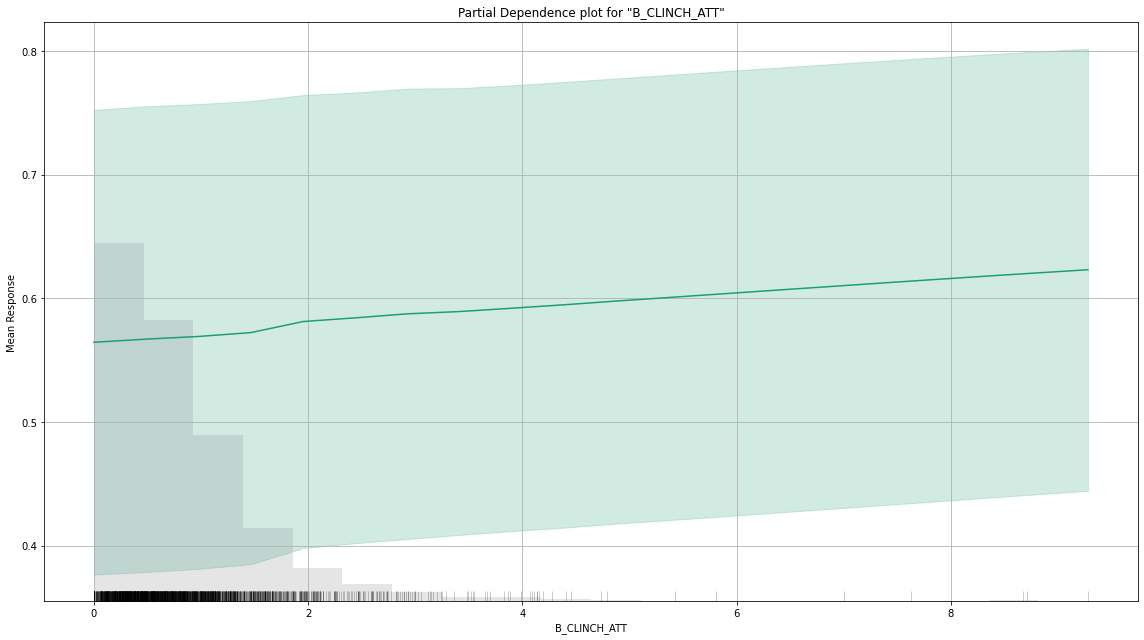

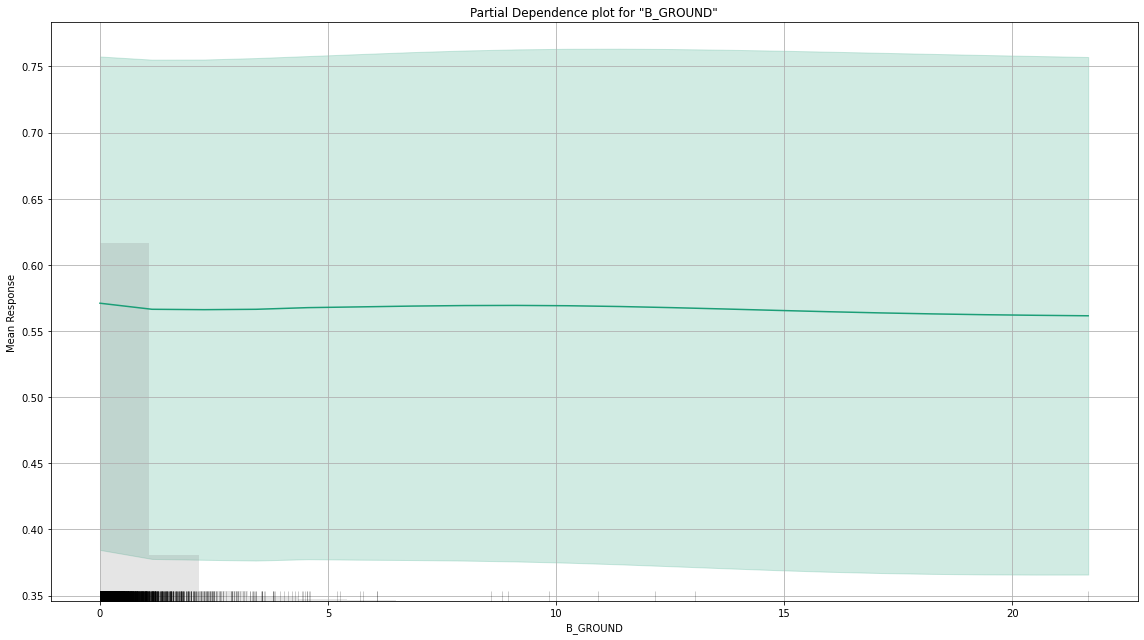

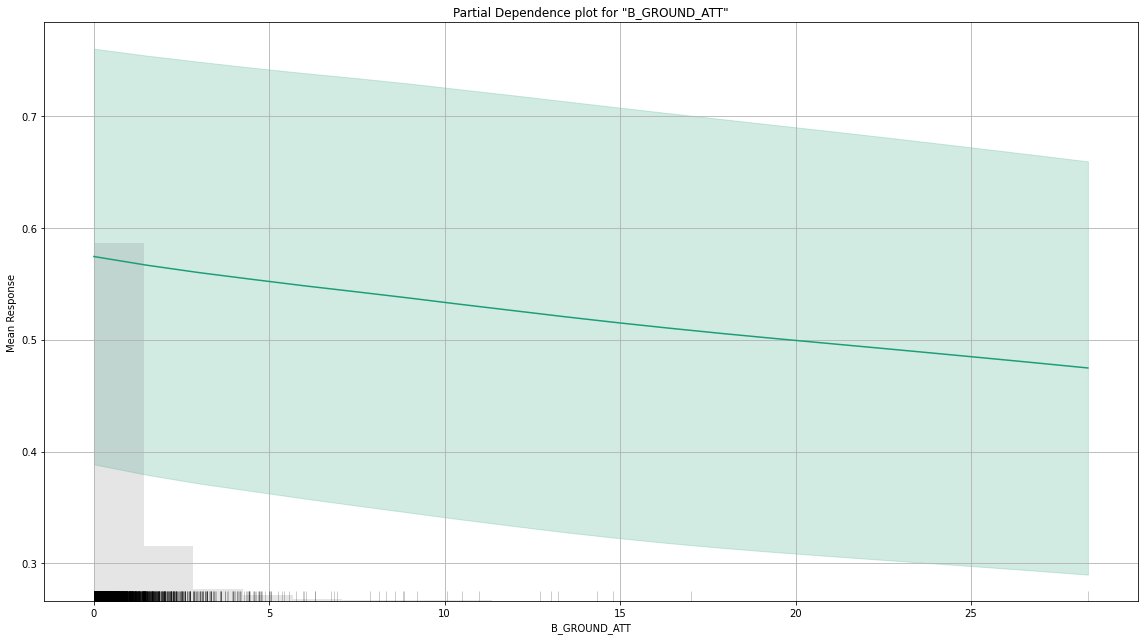

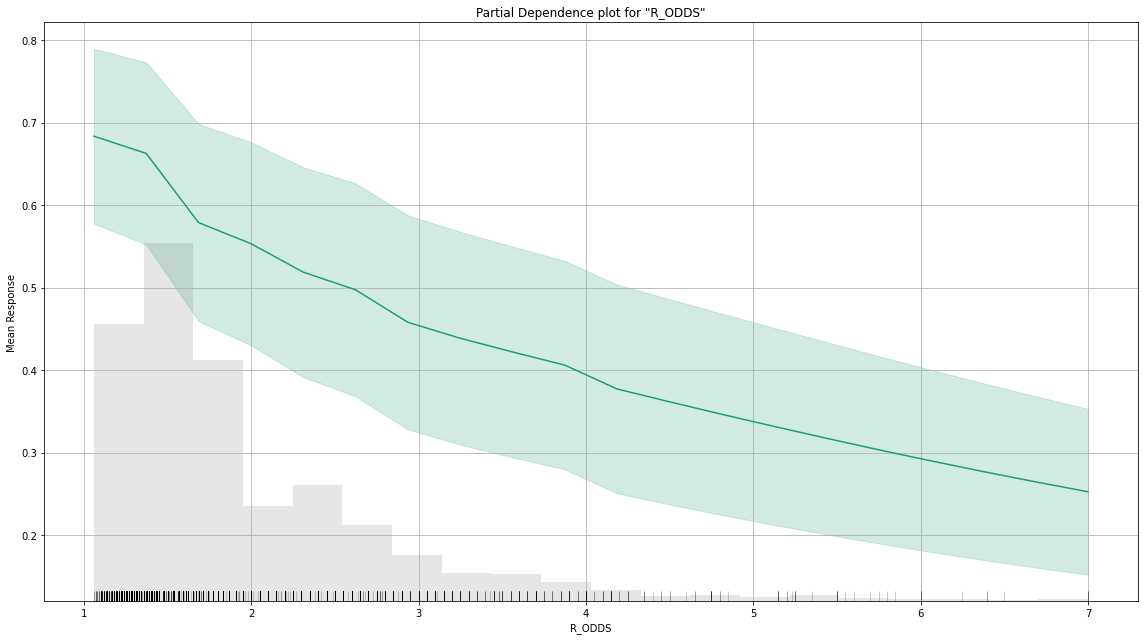

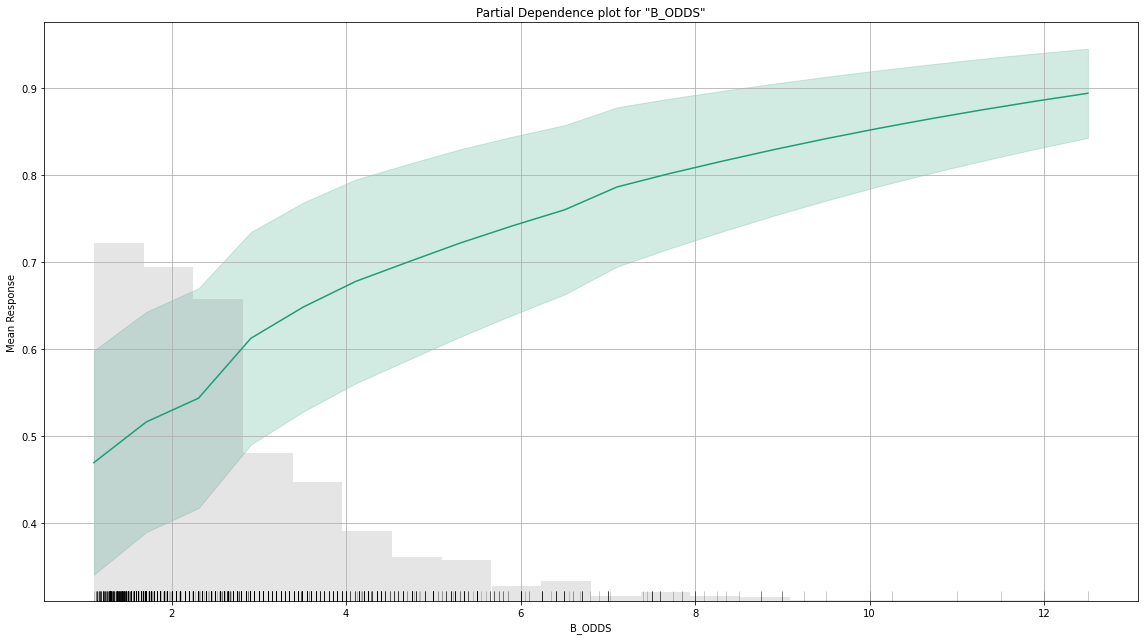

In [19]:
exa = aml.leader.explain(train_hf)

In [20]:

# # # Get model ids for all models in the AutoML Leaderboard
# model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# # Get the "All Models" Stacked Ensemble model
# se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])
# # Get the Stacked Ensemble metalearner model
# se

/home/m/miniconda3/envs/mma/lib/python3.8/site-packages/h2o/explanation/_explain.py:2799: UserWarning: No model with variable importance. Selecting all features to explain.
  warnings.warn("No model with variable importance. Selecting all features to explain.")


# Individual Conditional Expectation

> Individual conditional expectations (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response for a given row. ICE plot is similar to partial dependence plot (PDP), PDP shows the average effect of a feature while ICE plot shows the effect for a single instance.

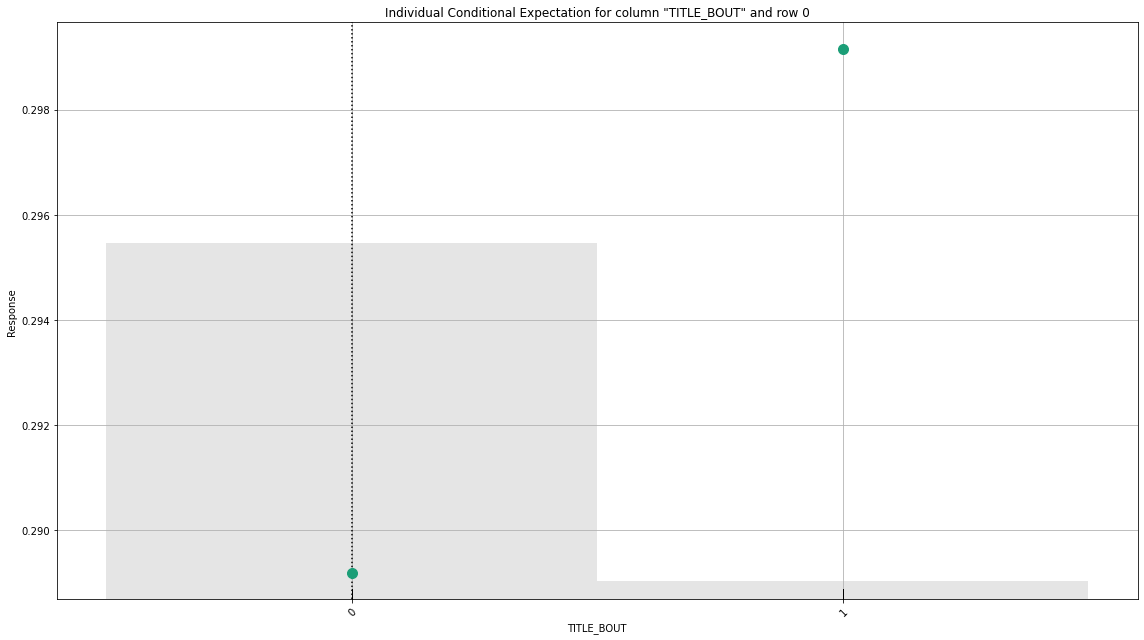

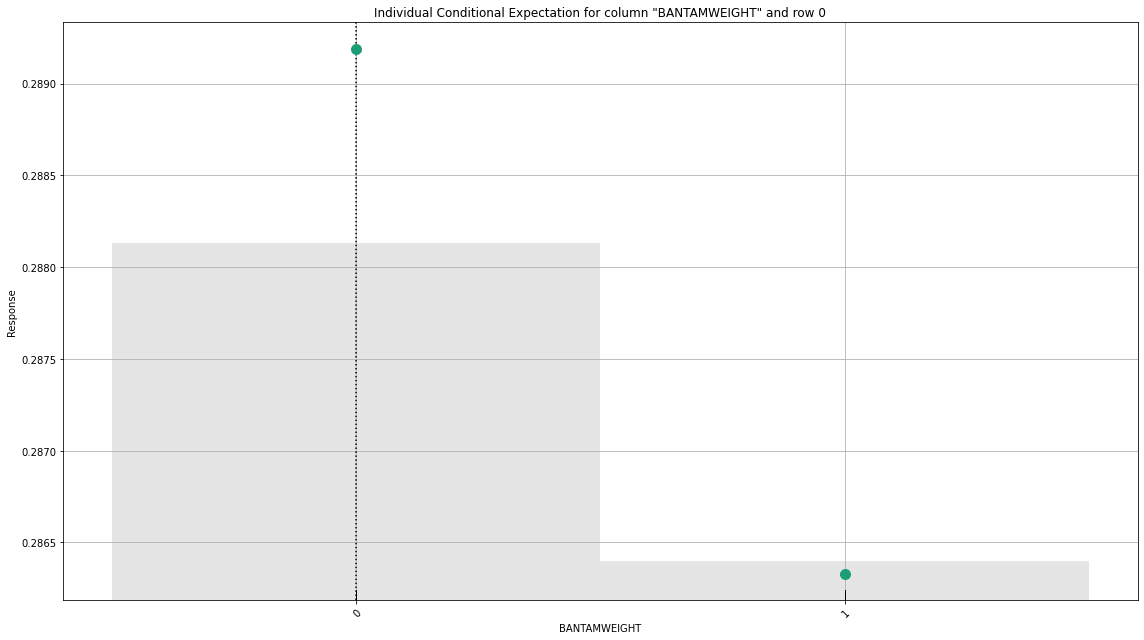

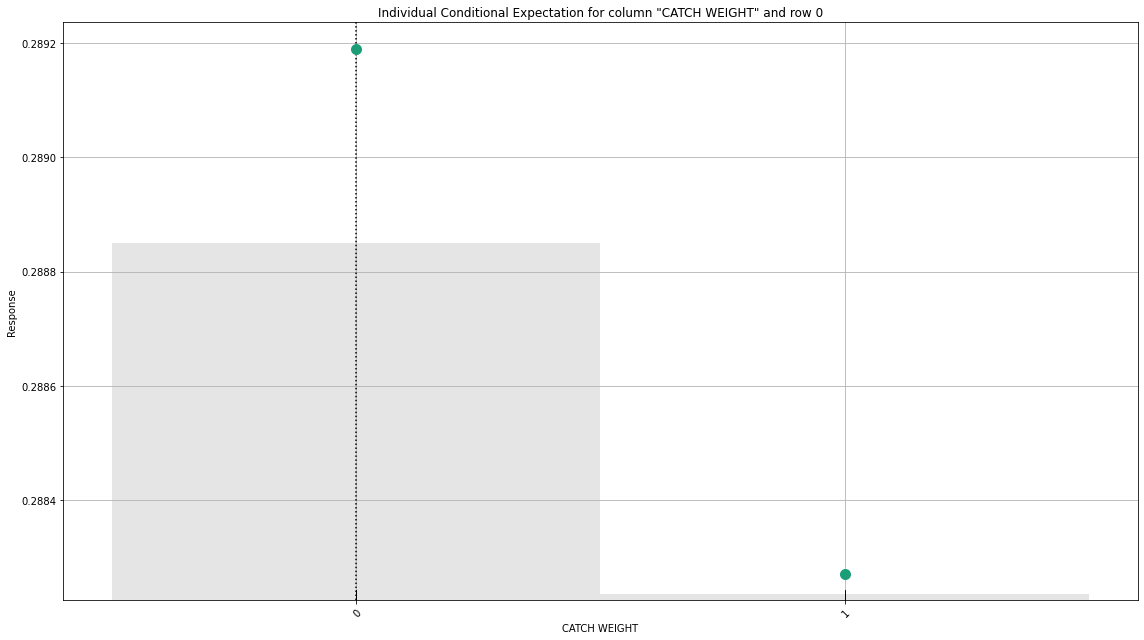

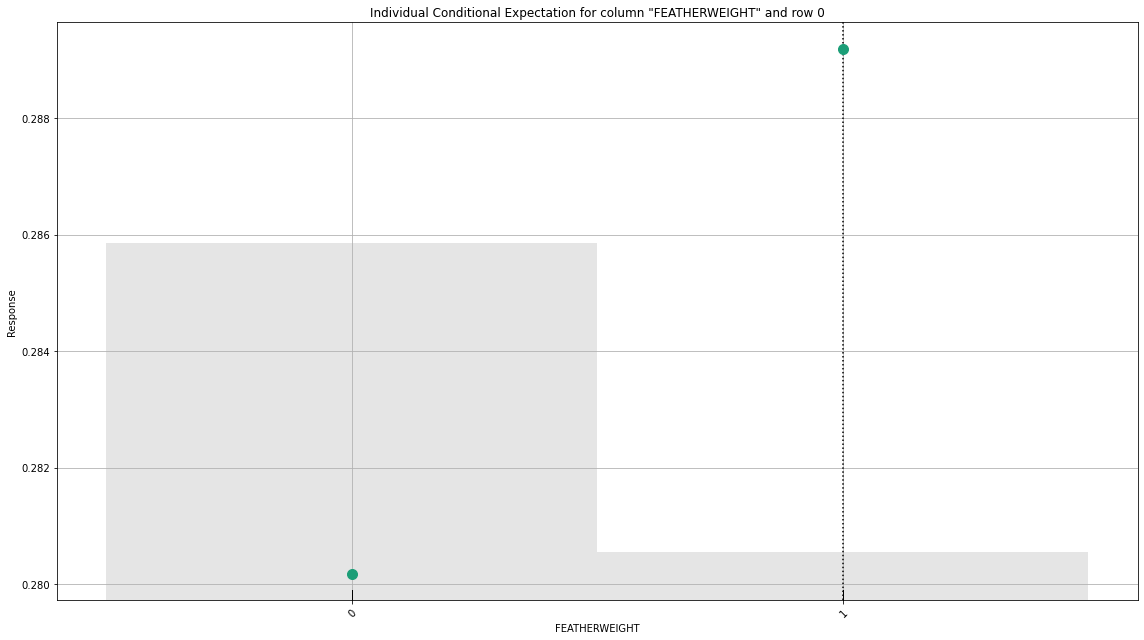

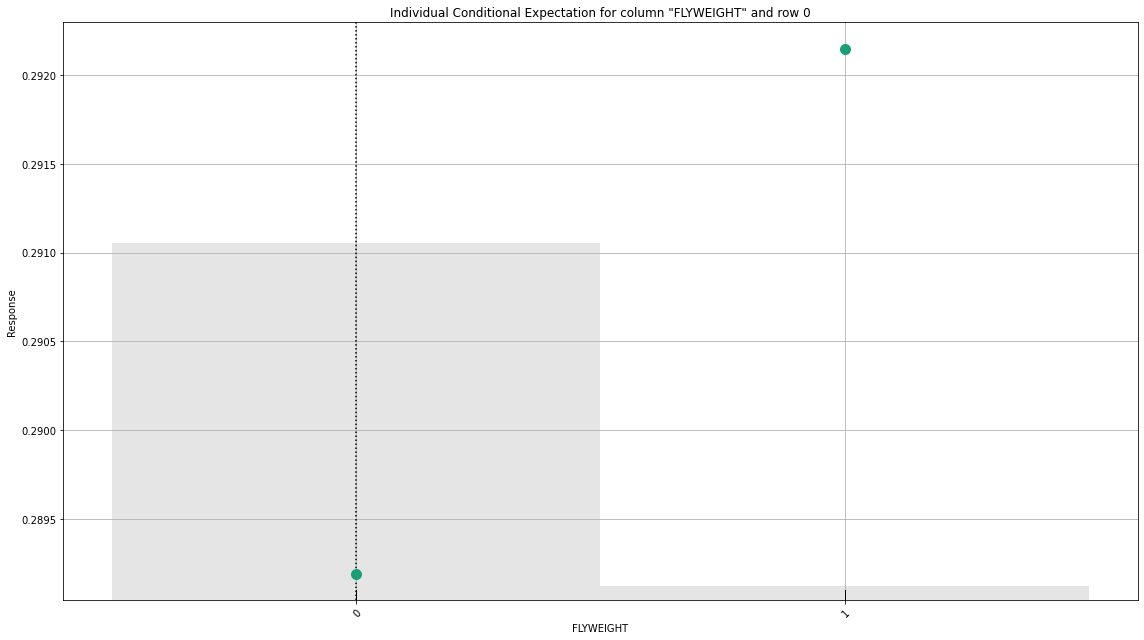

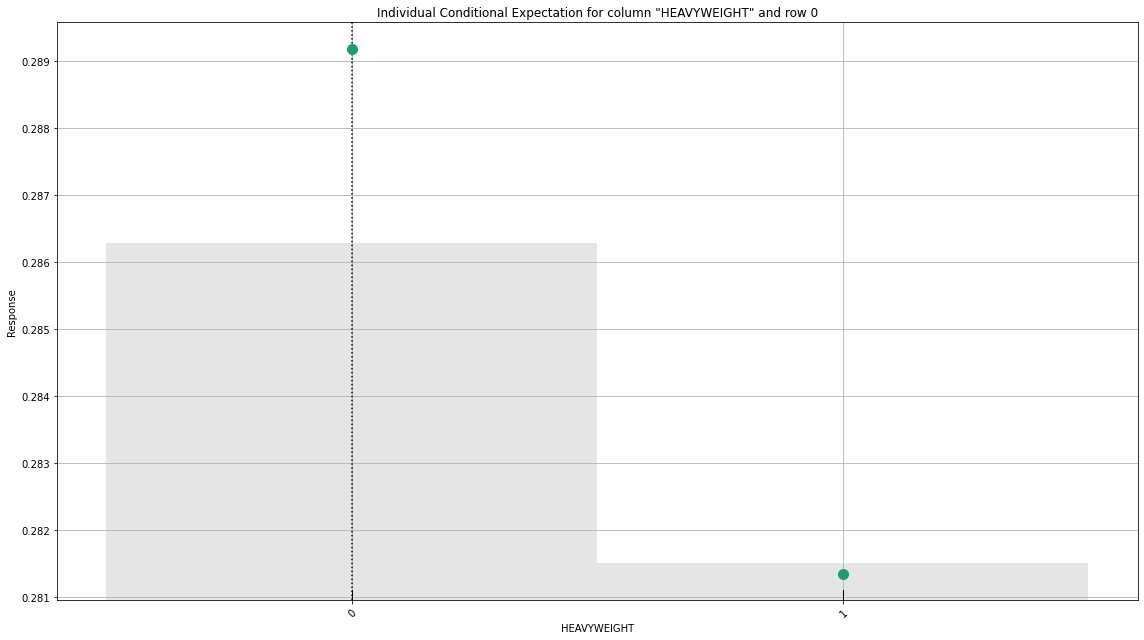

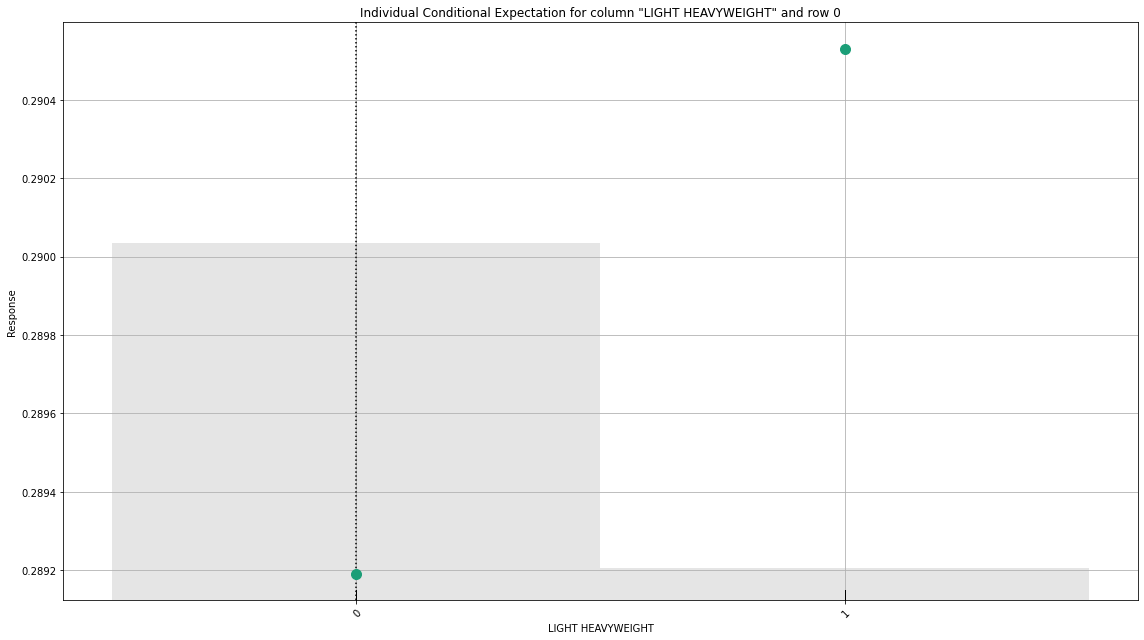

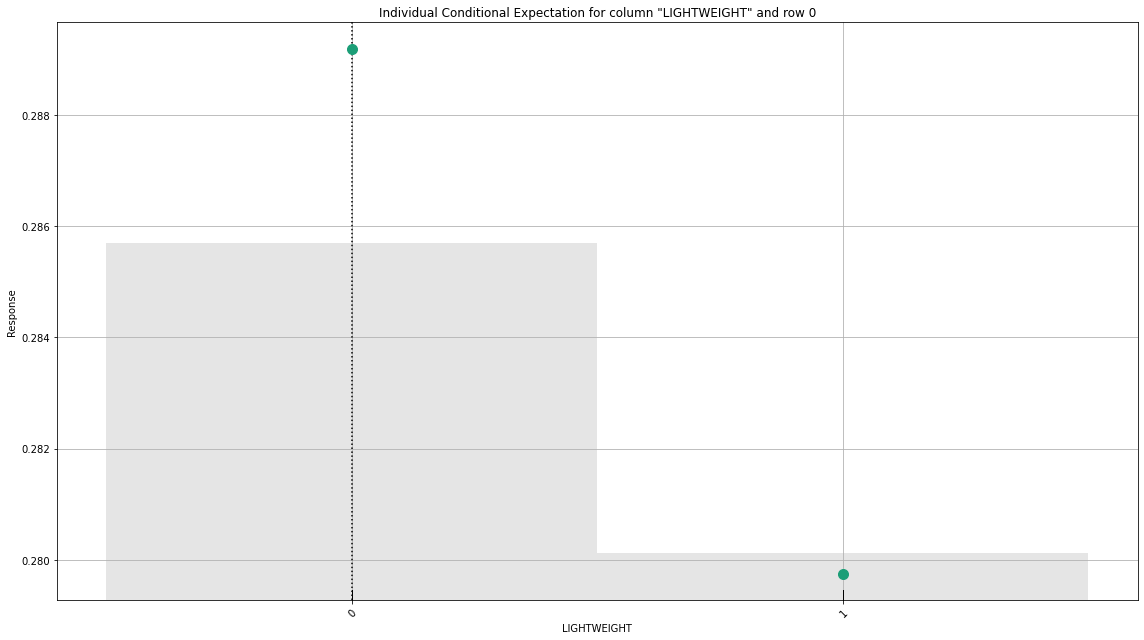

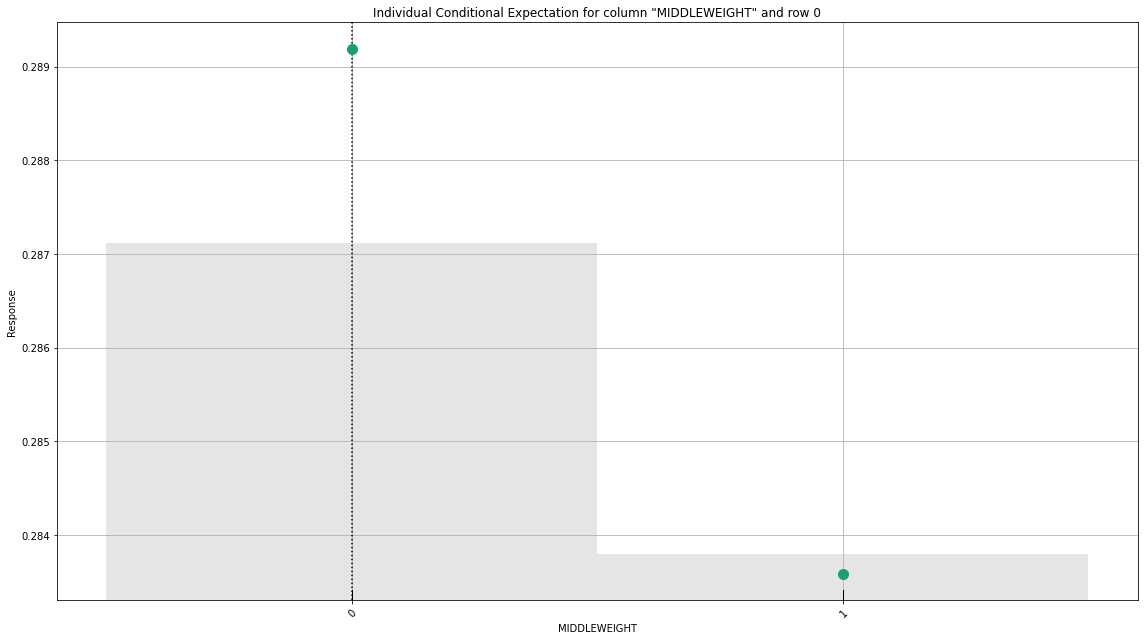

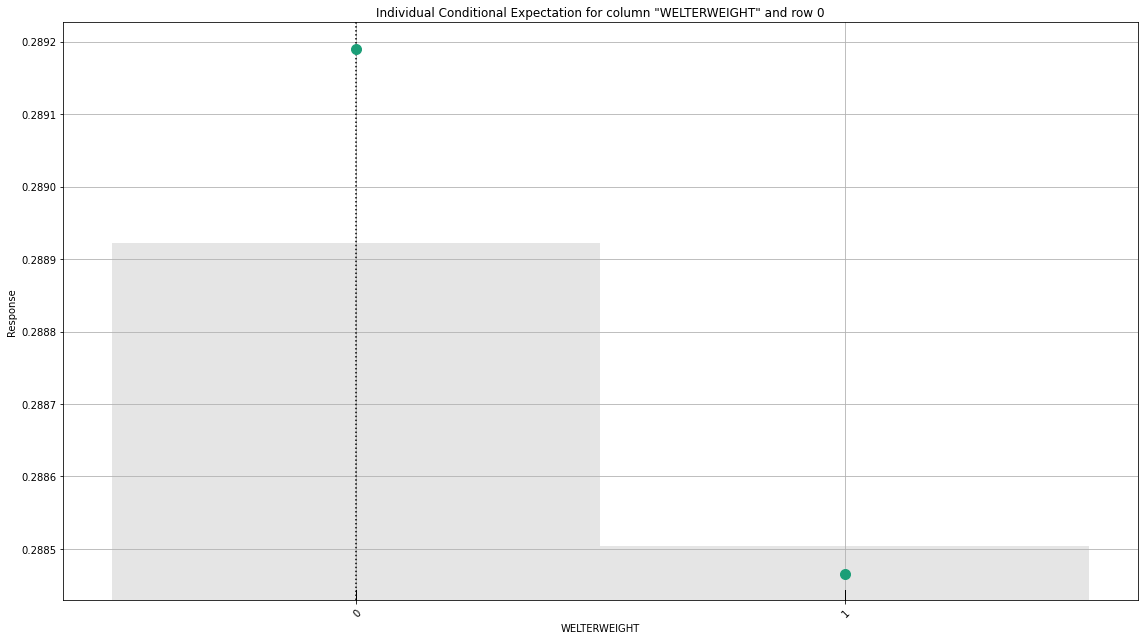

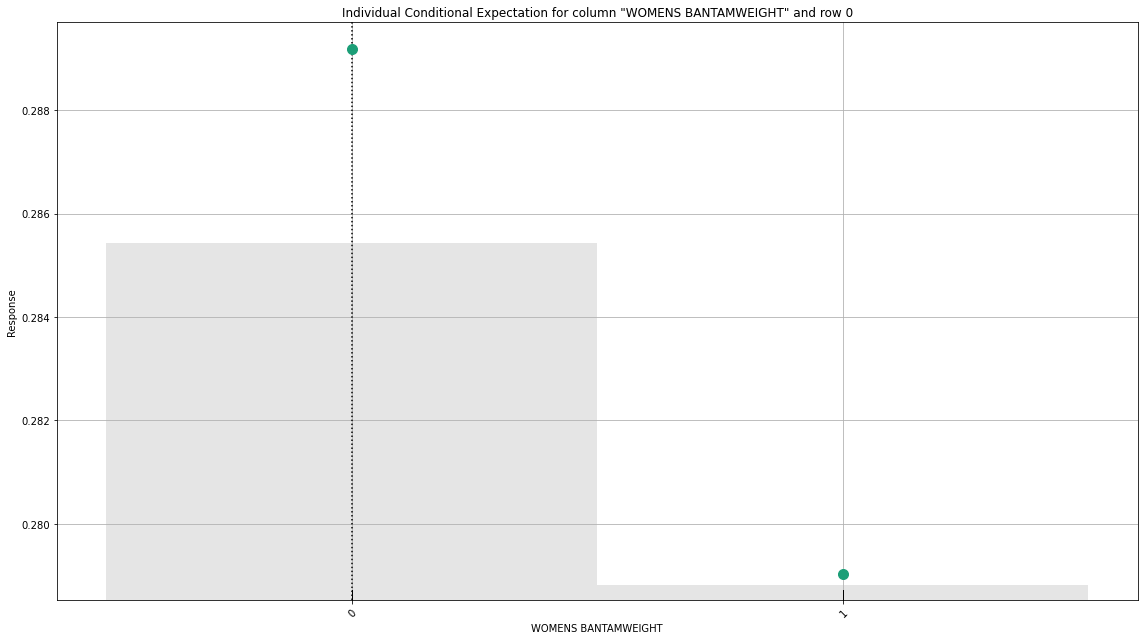

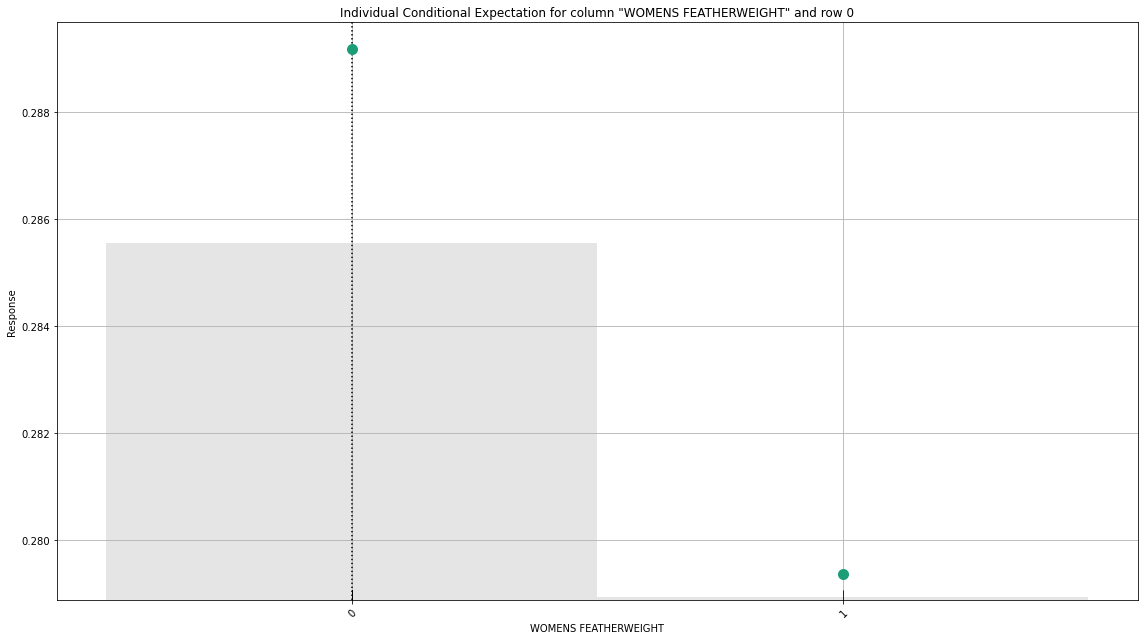

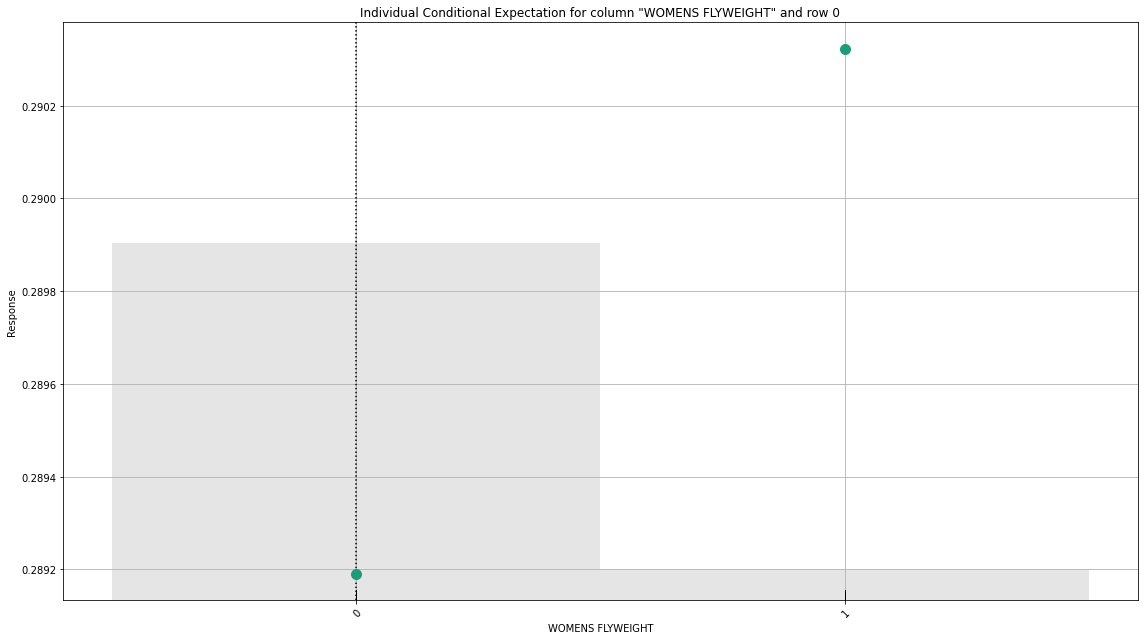

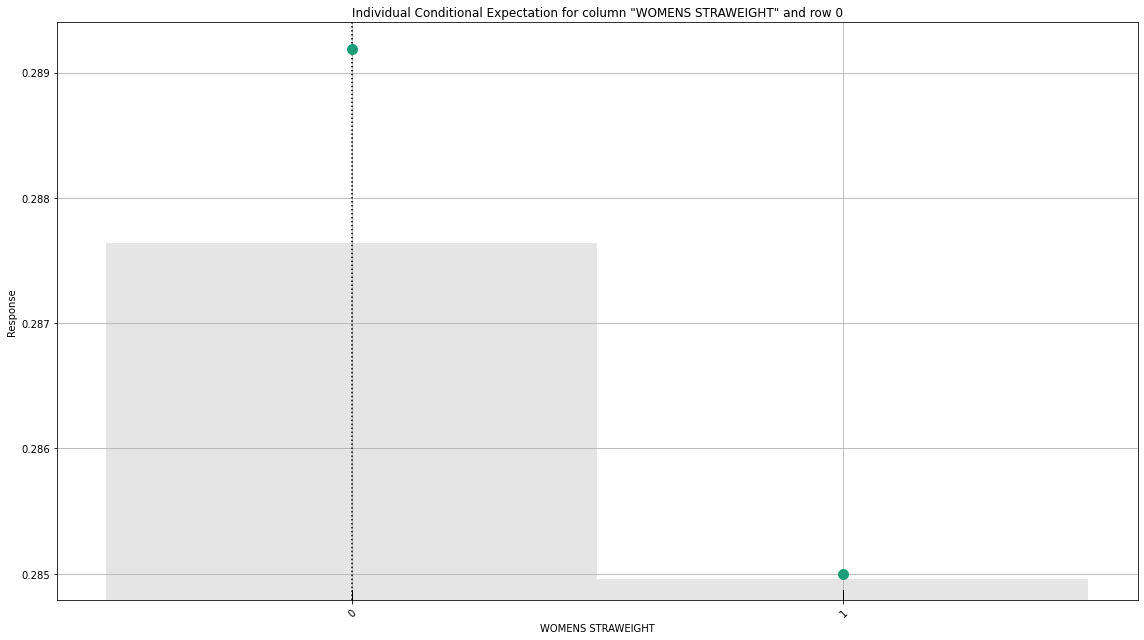

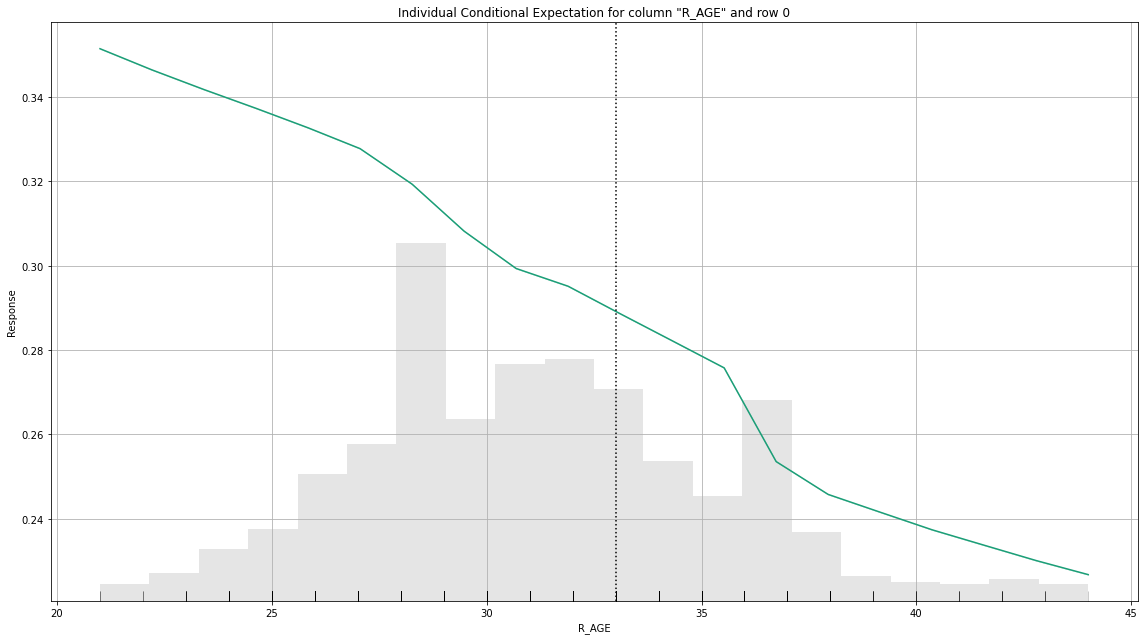

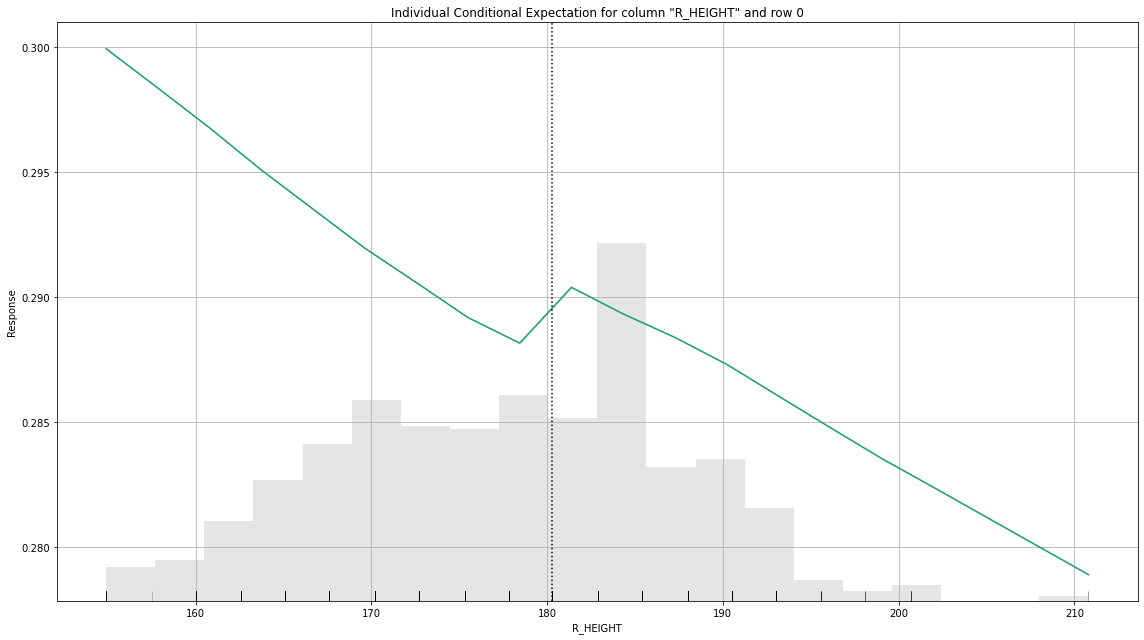

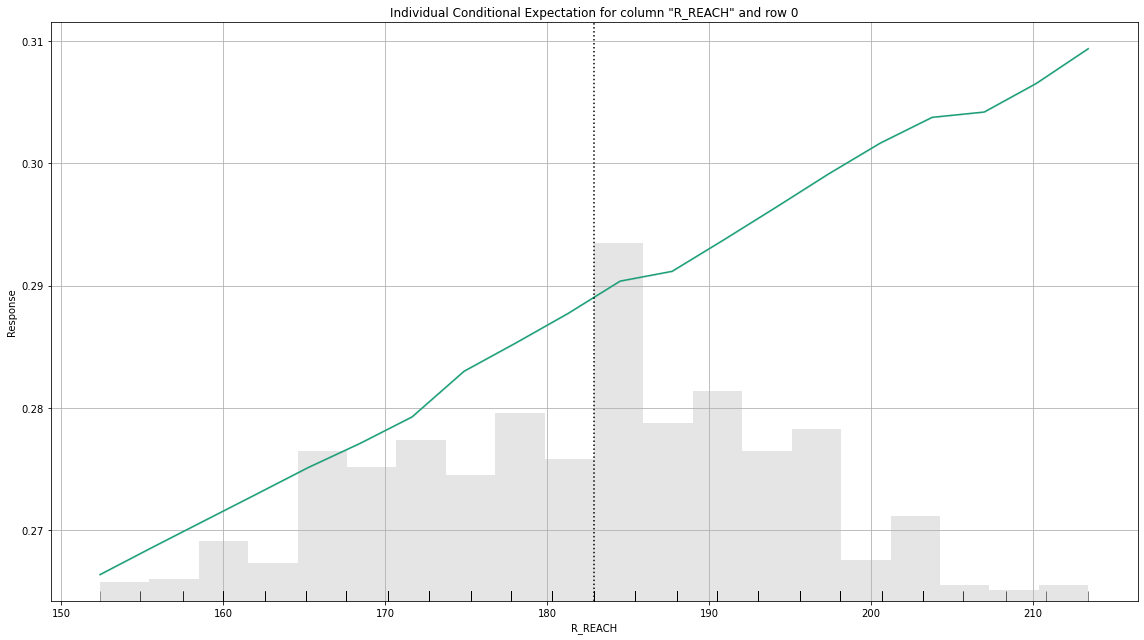

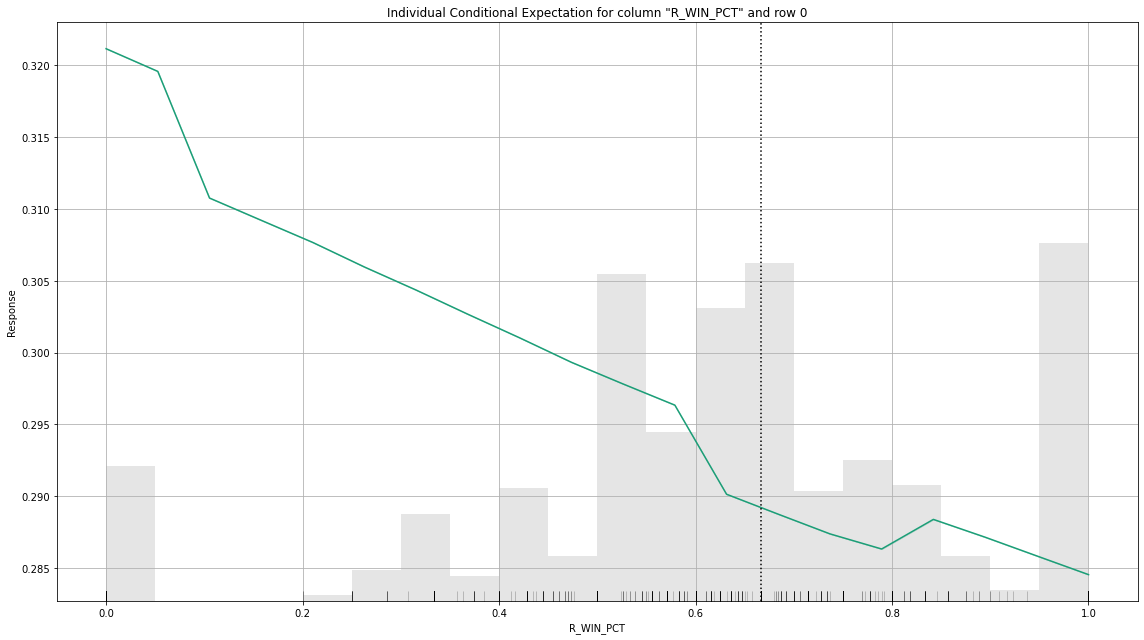

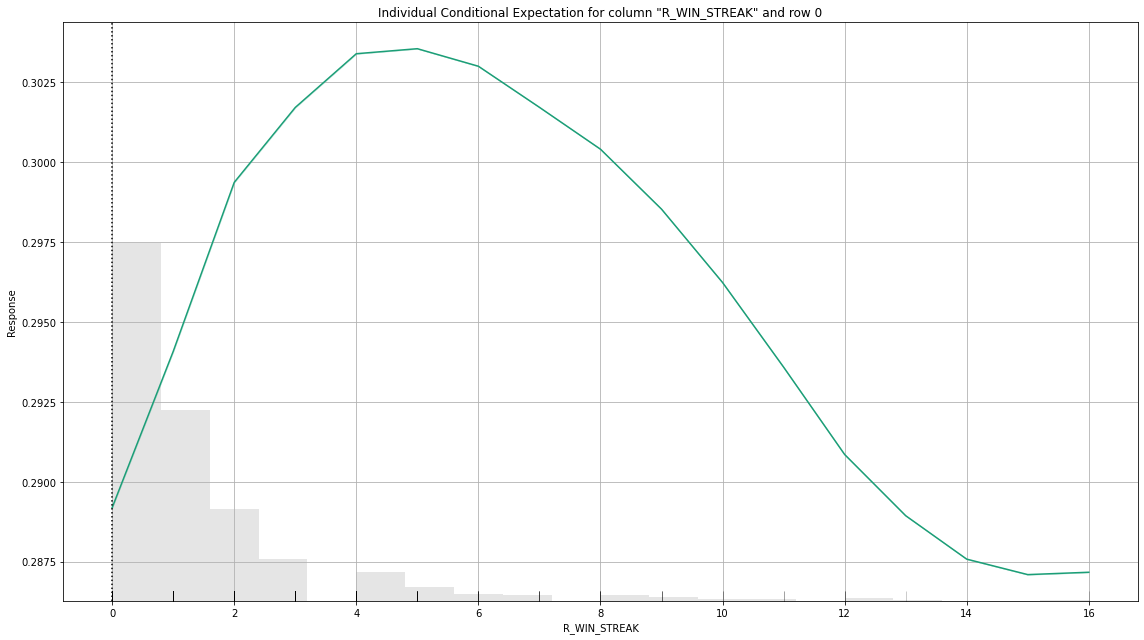

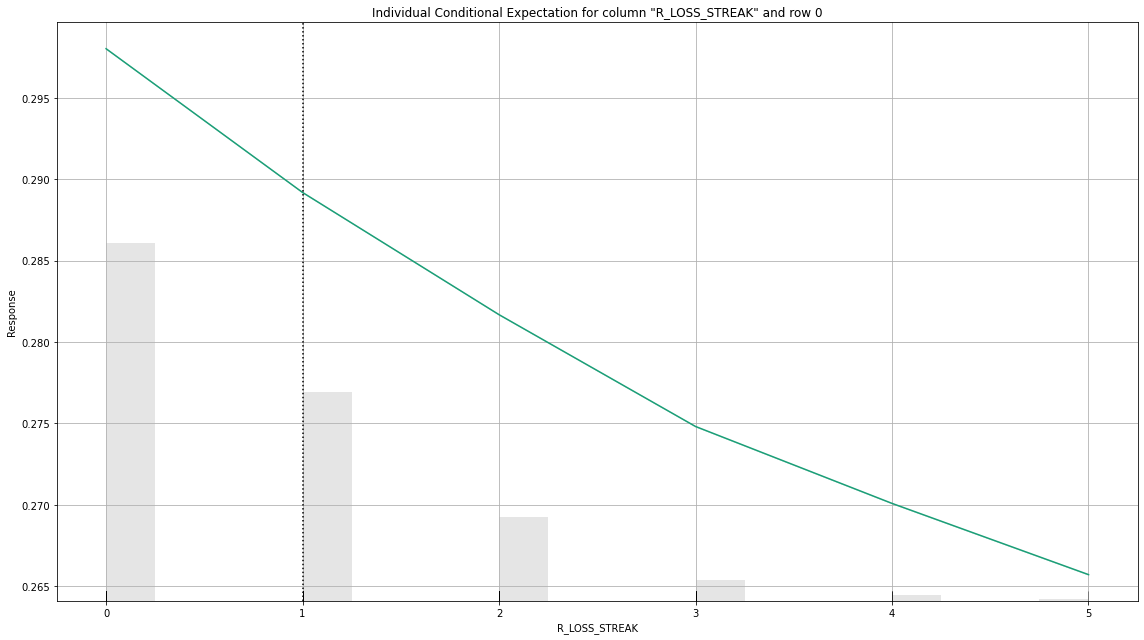

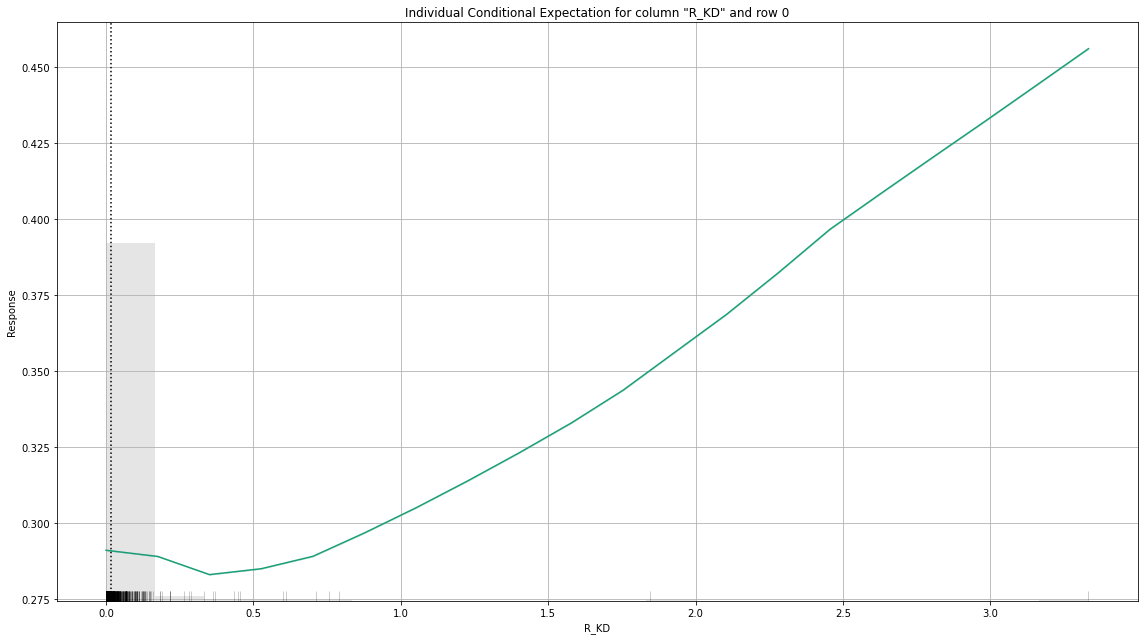

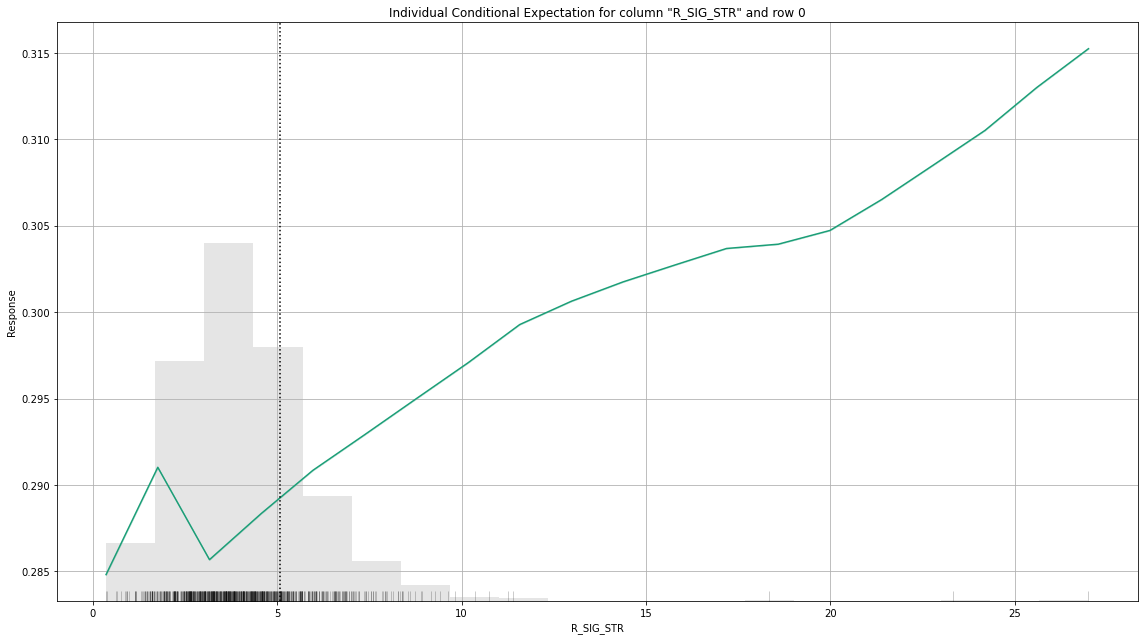

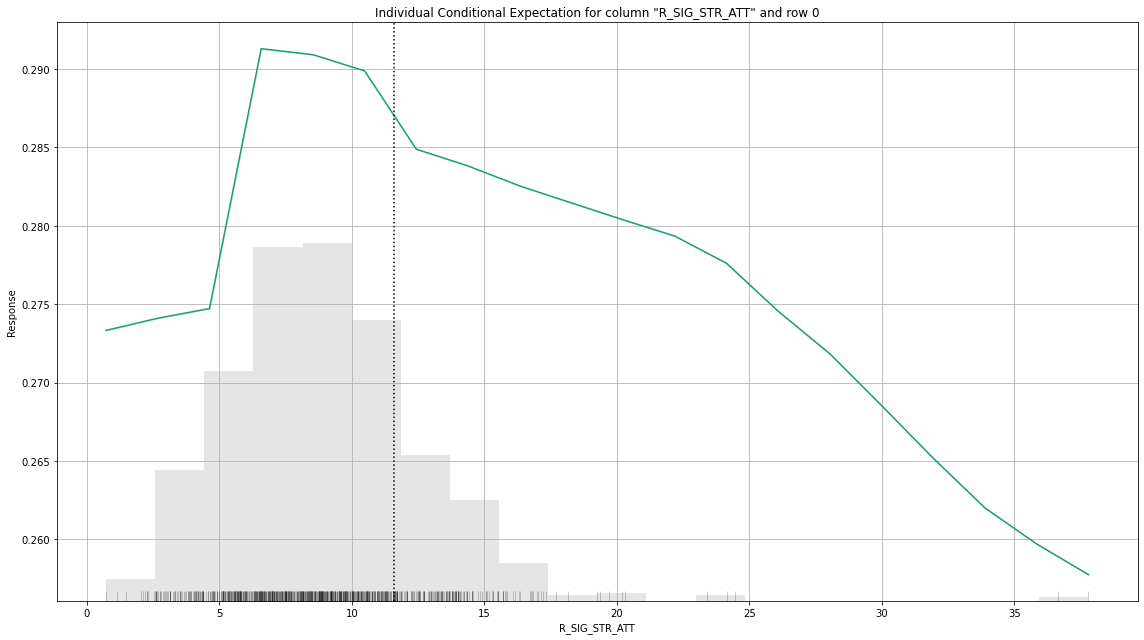

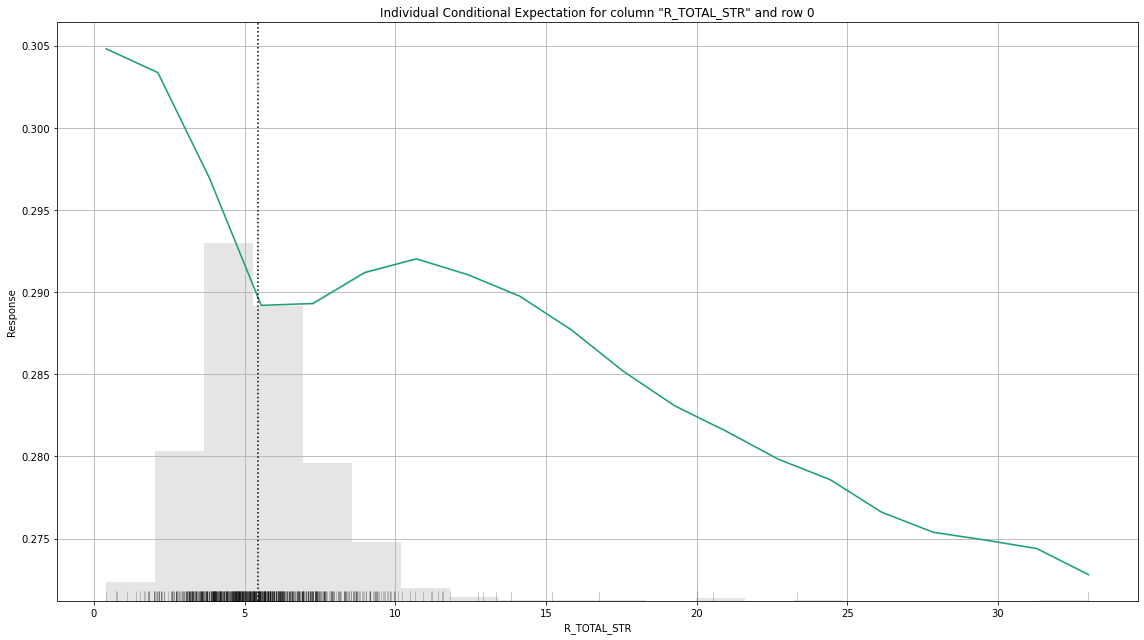

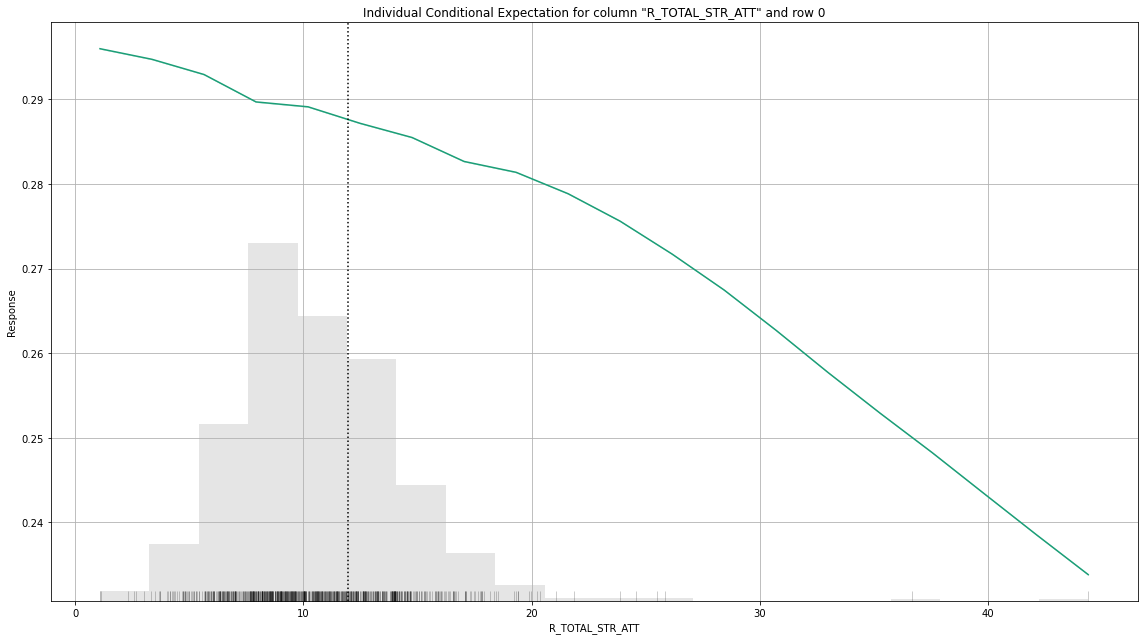

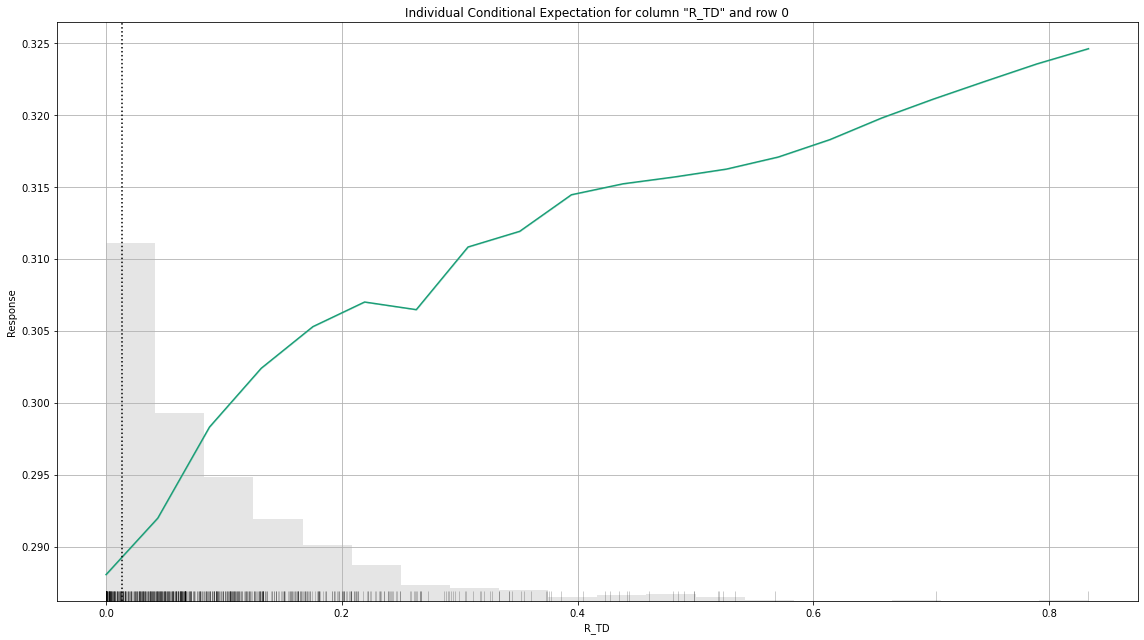

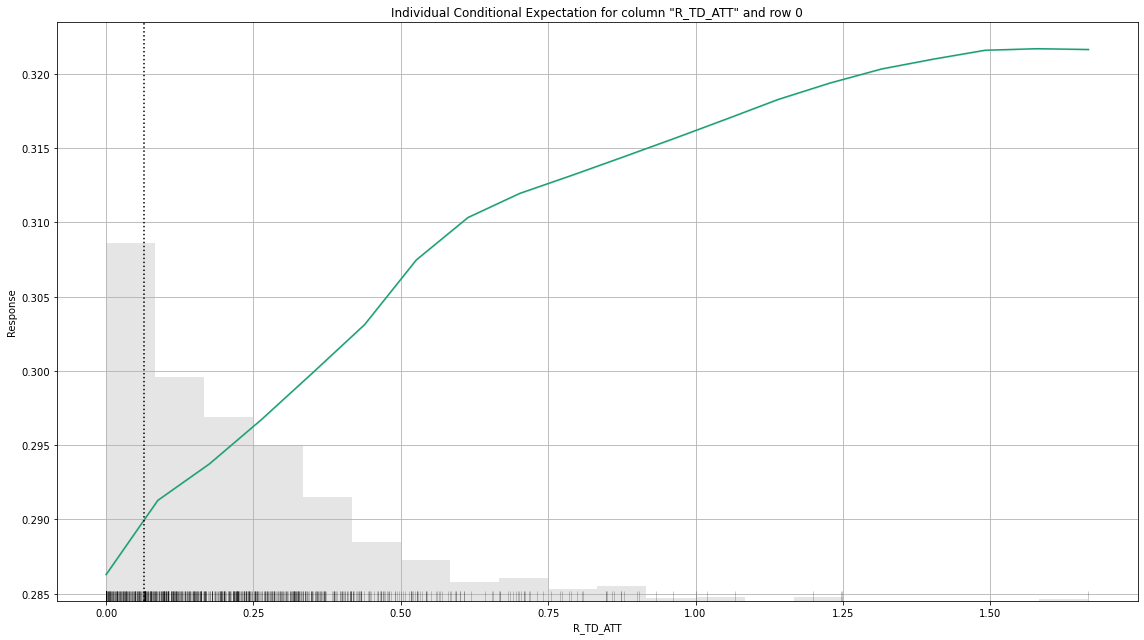

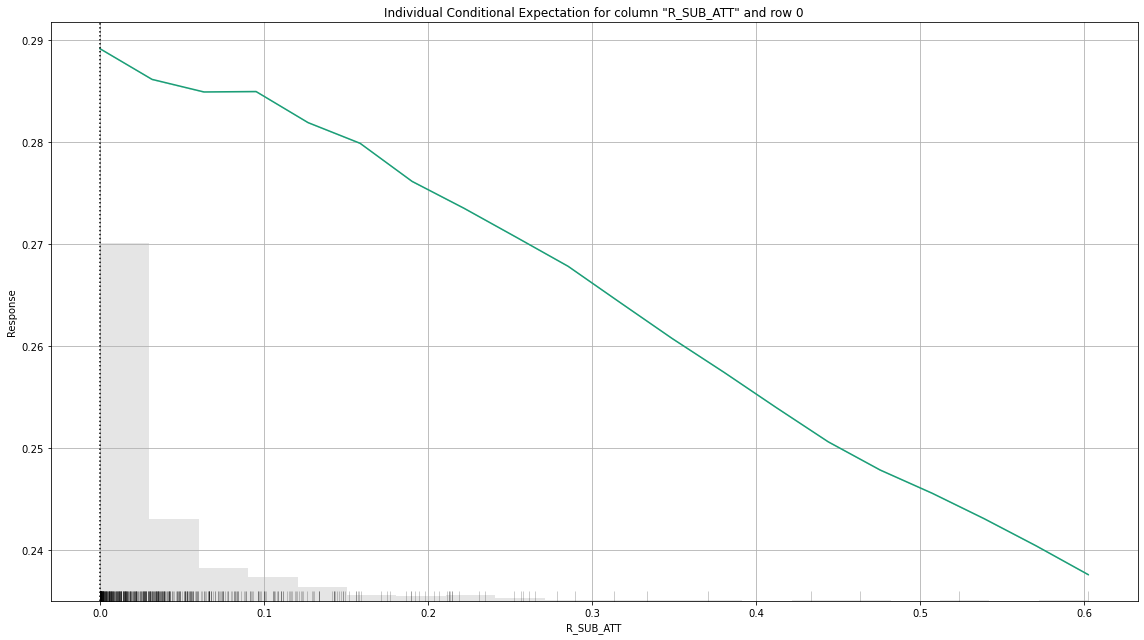

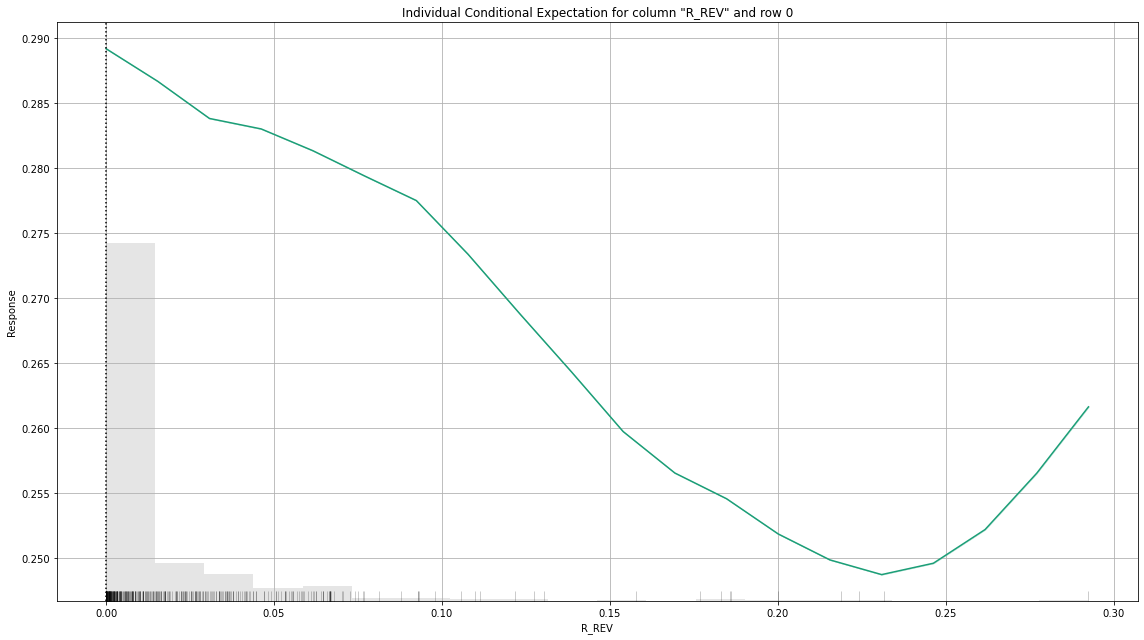

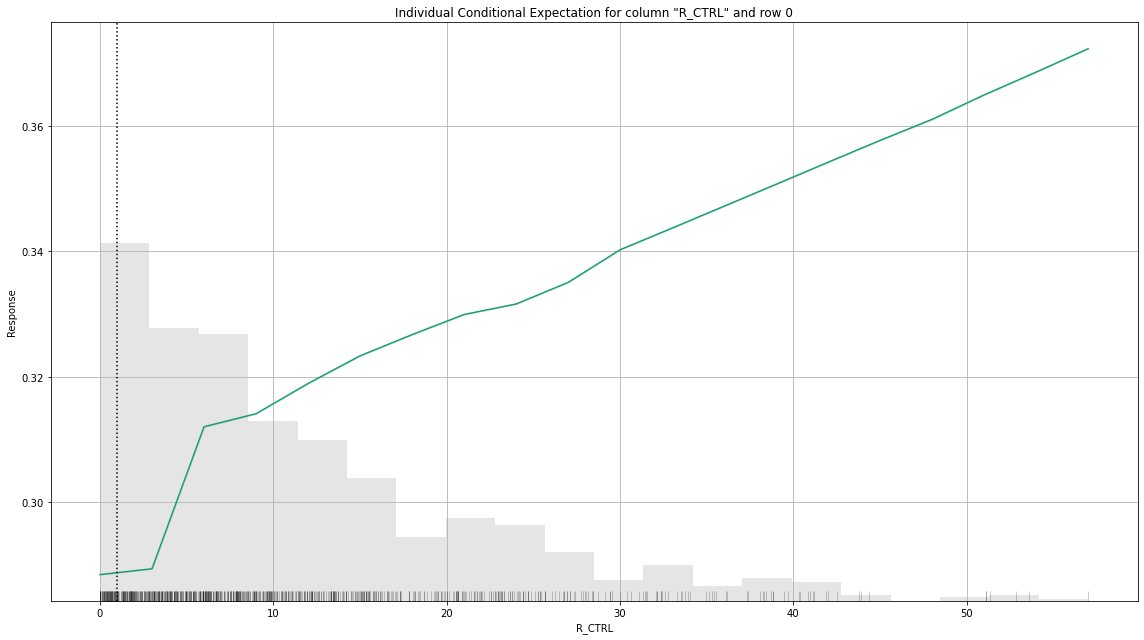

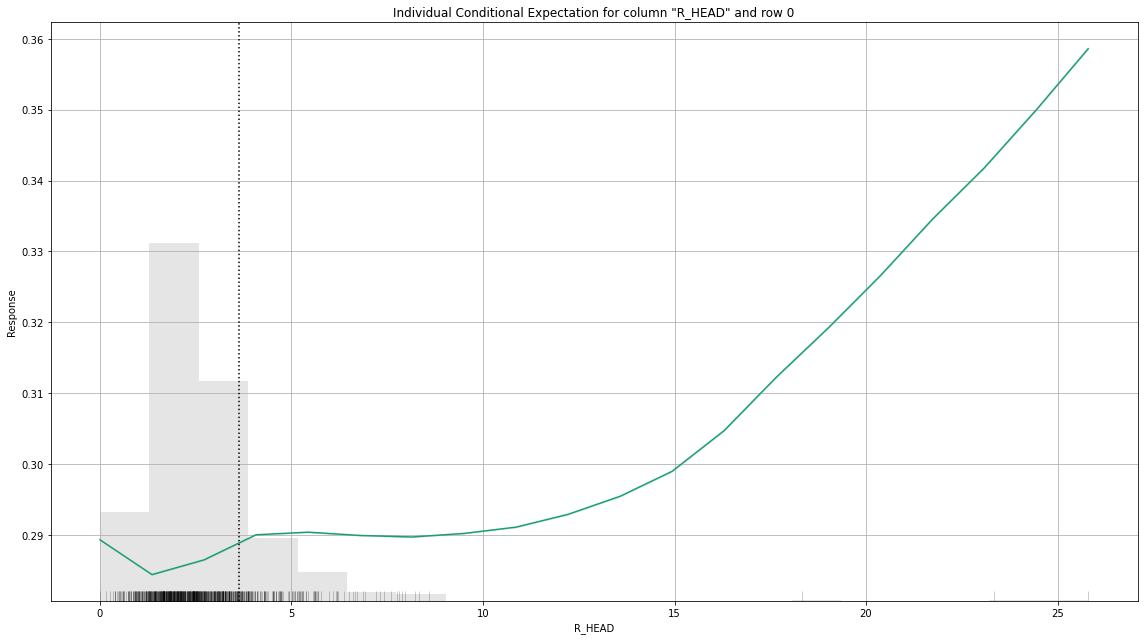

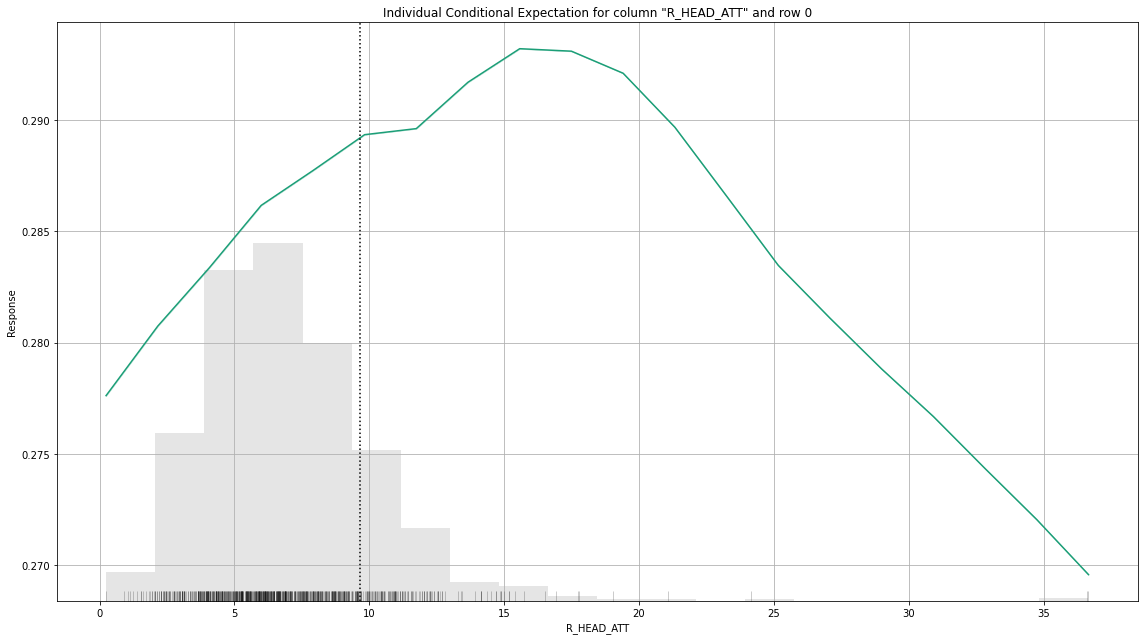

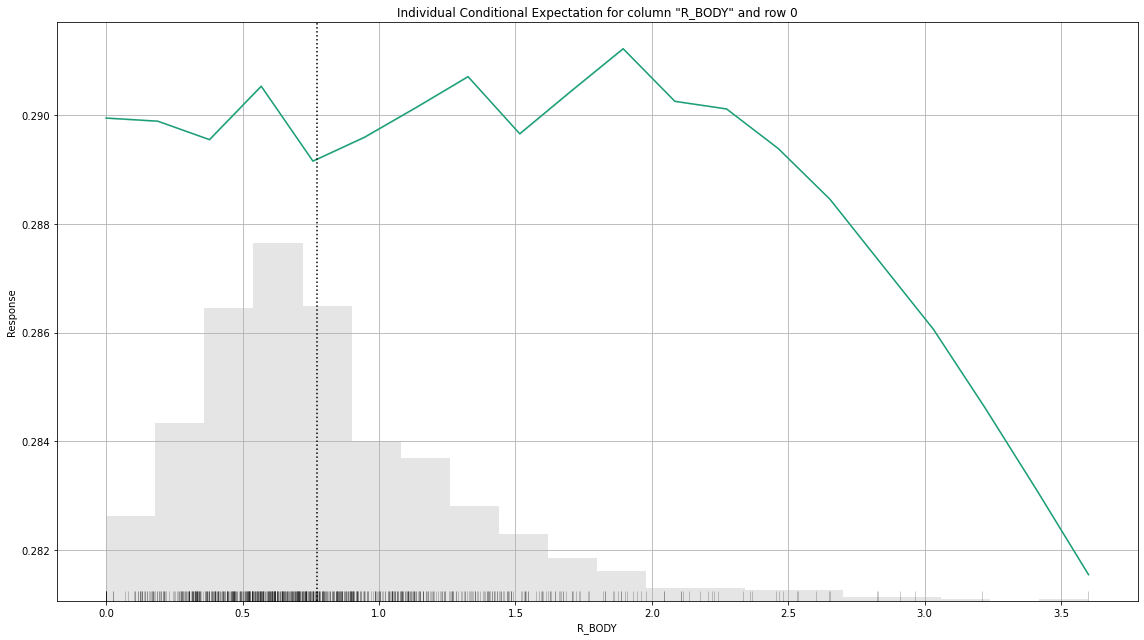

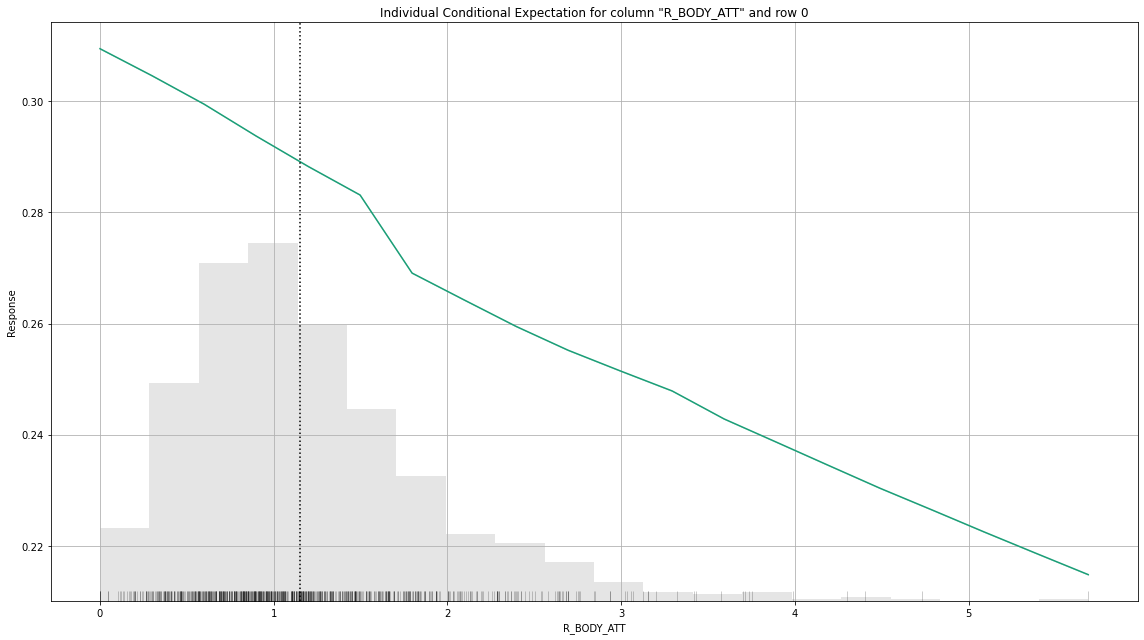

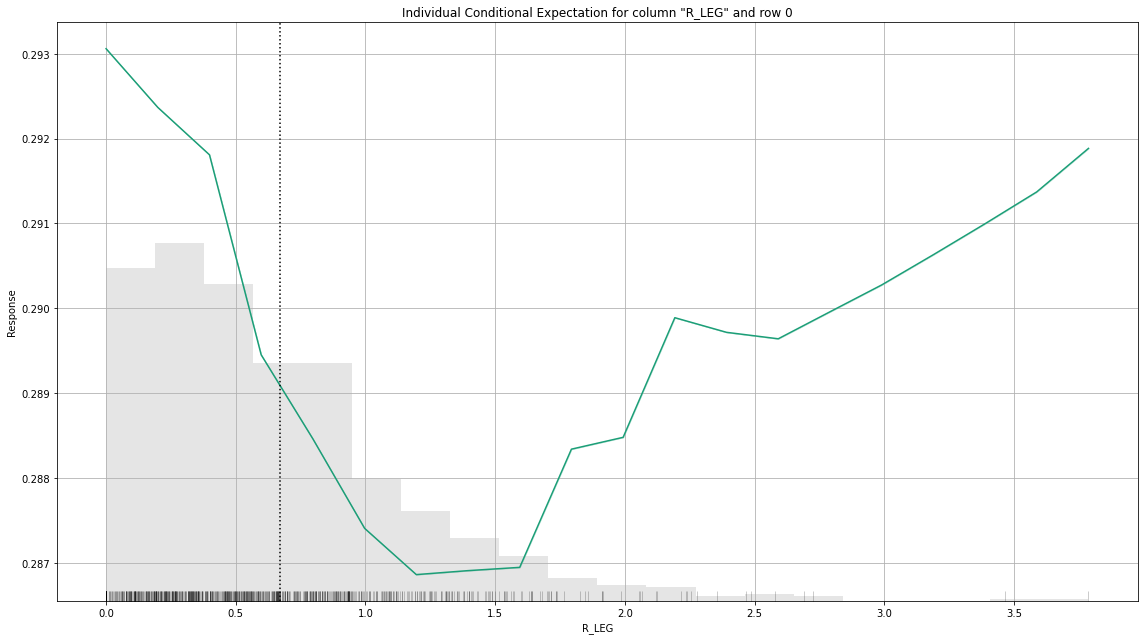

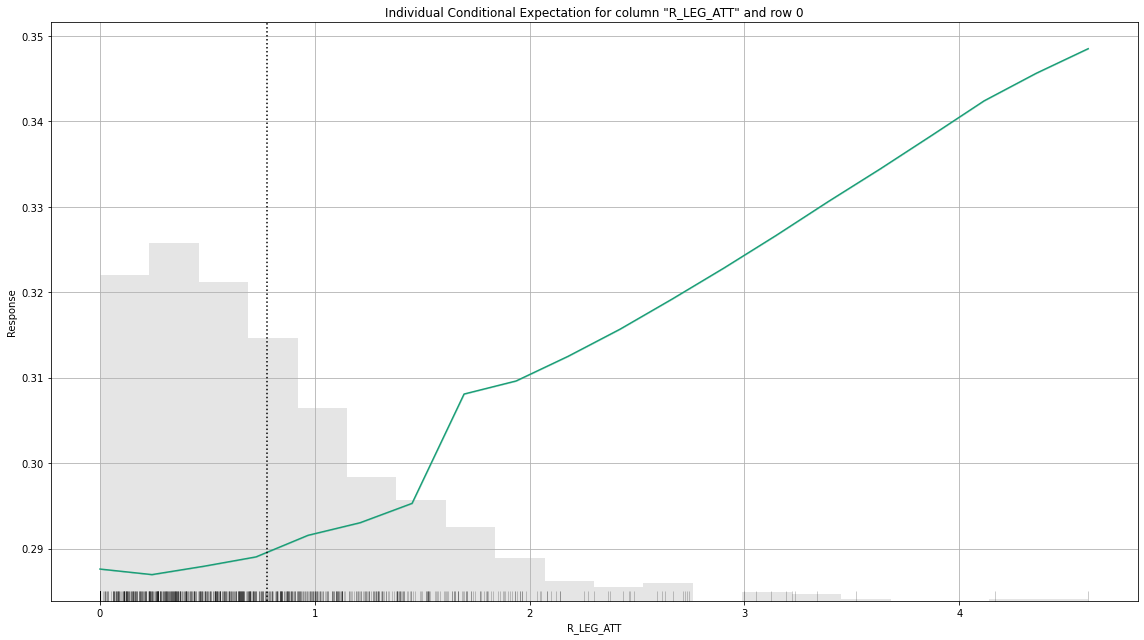

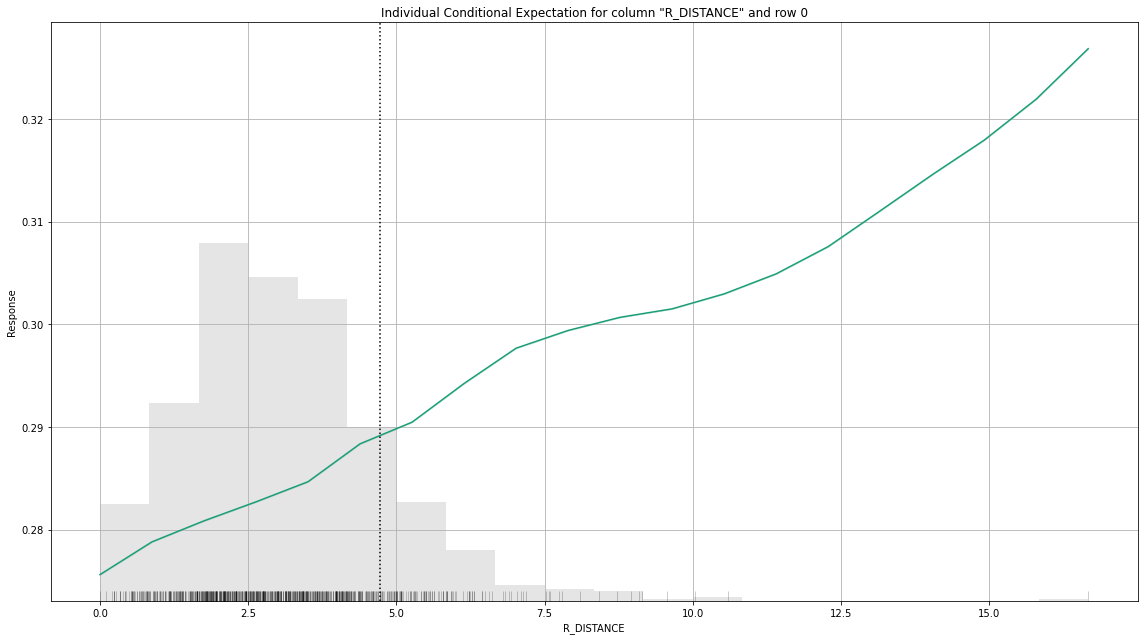

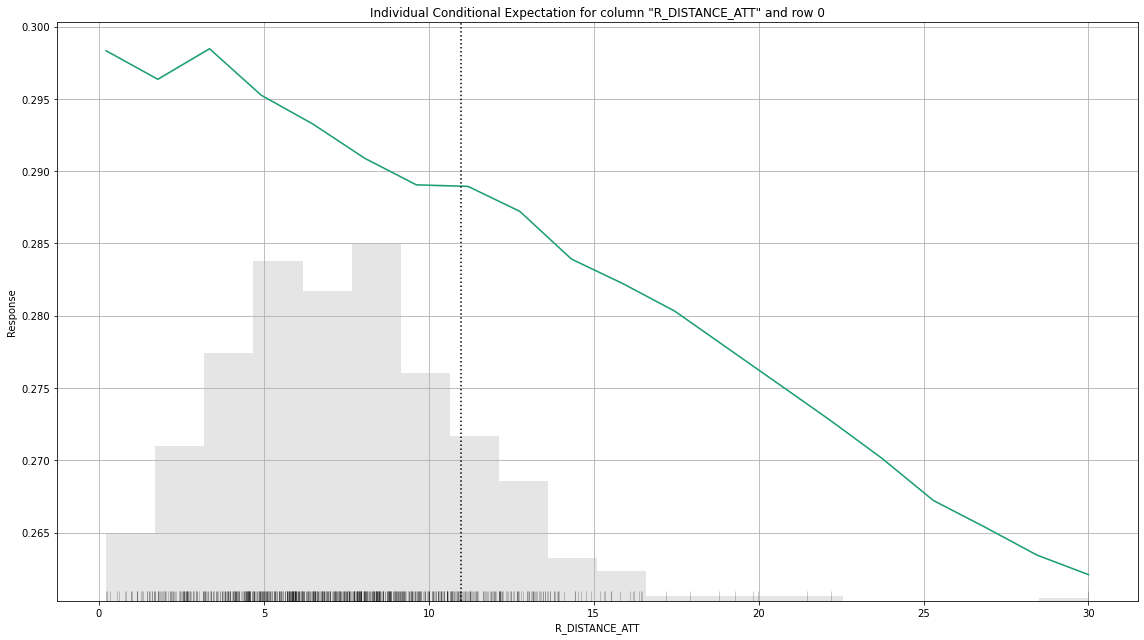

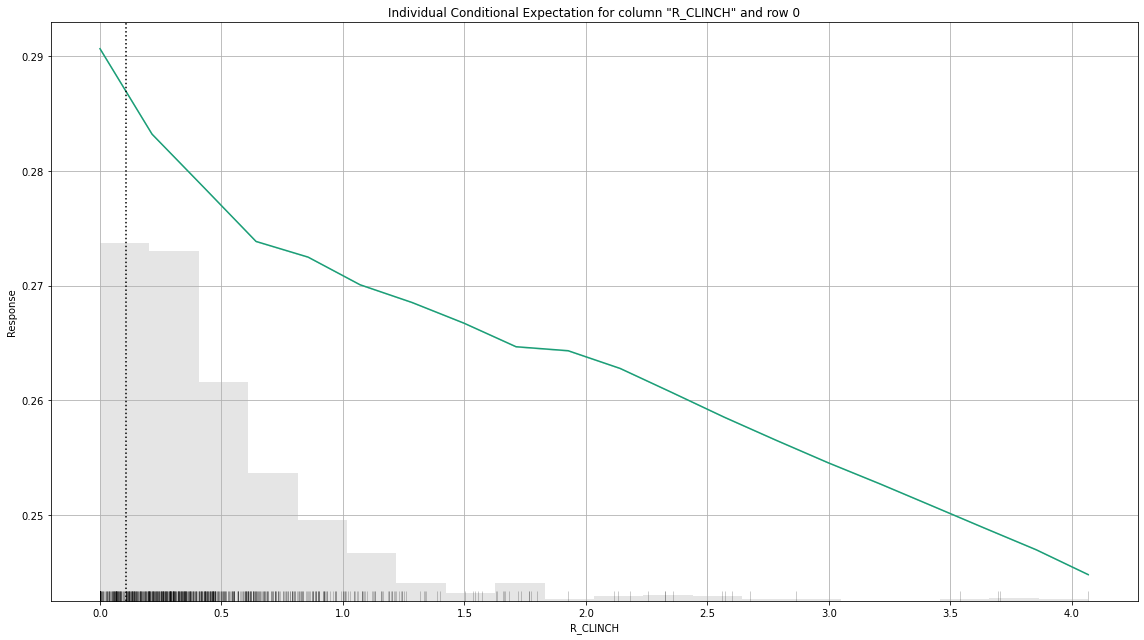

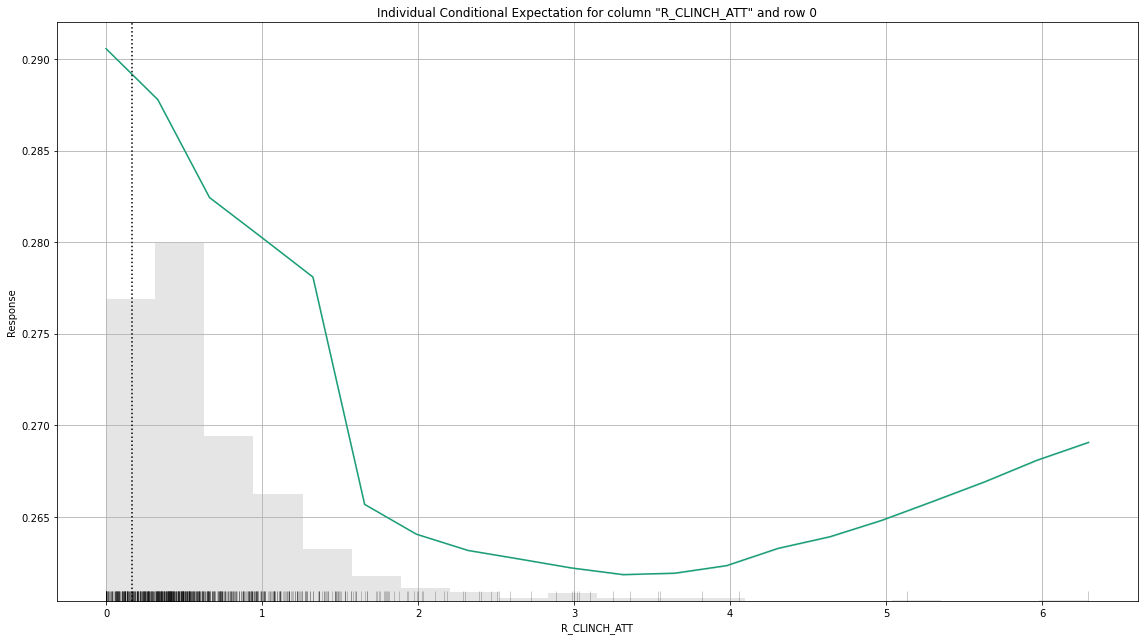

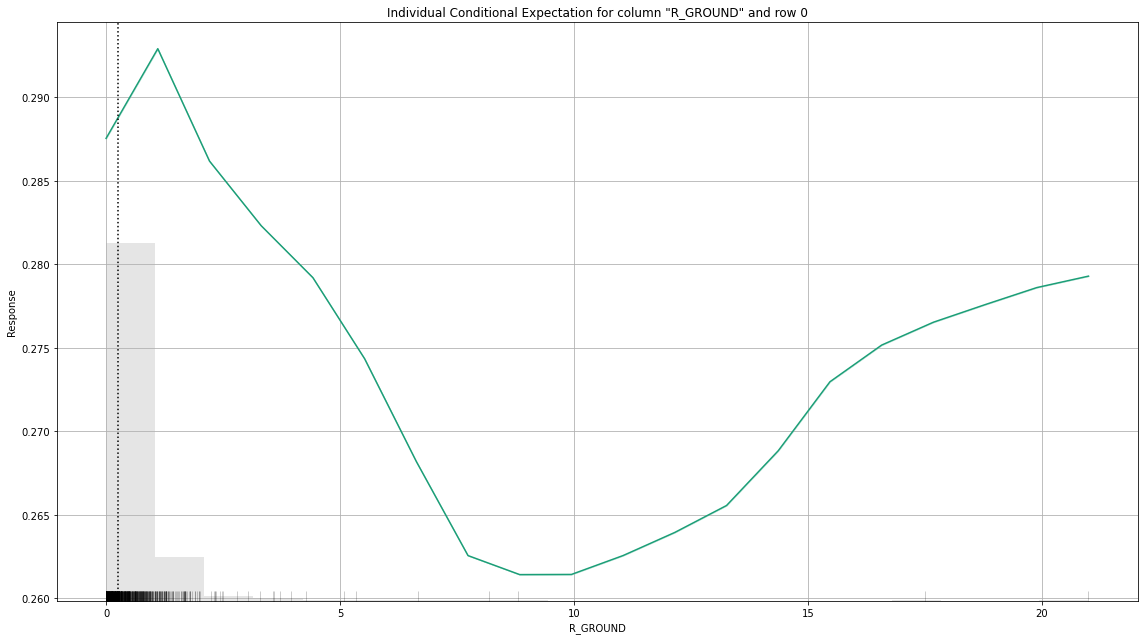

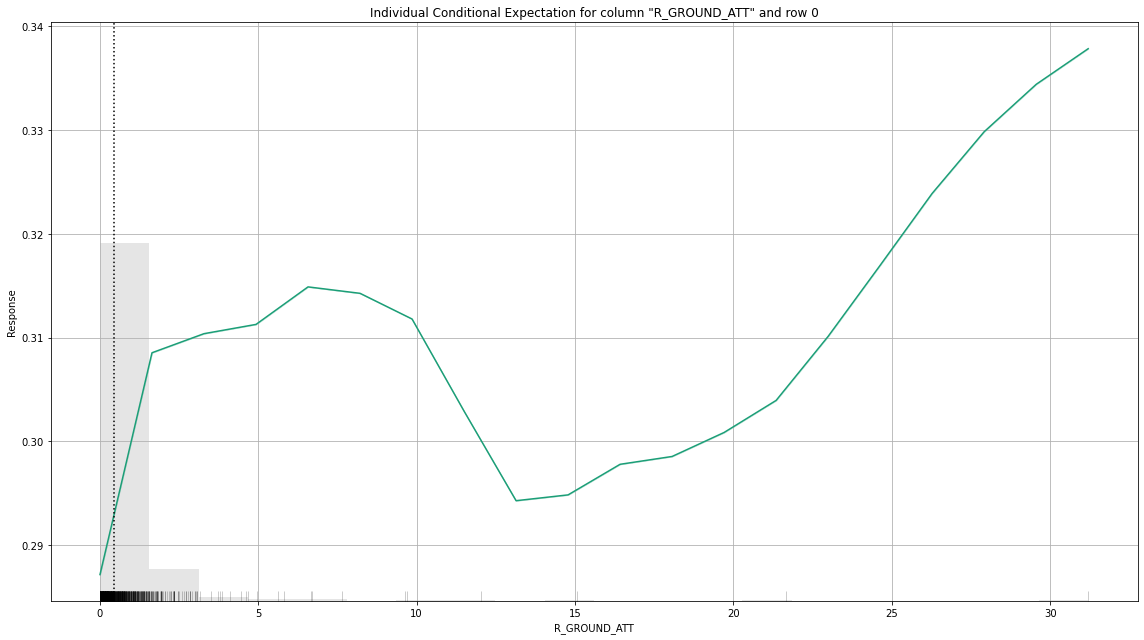

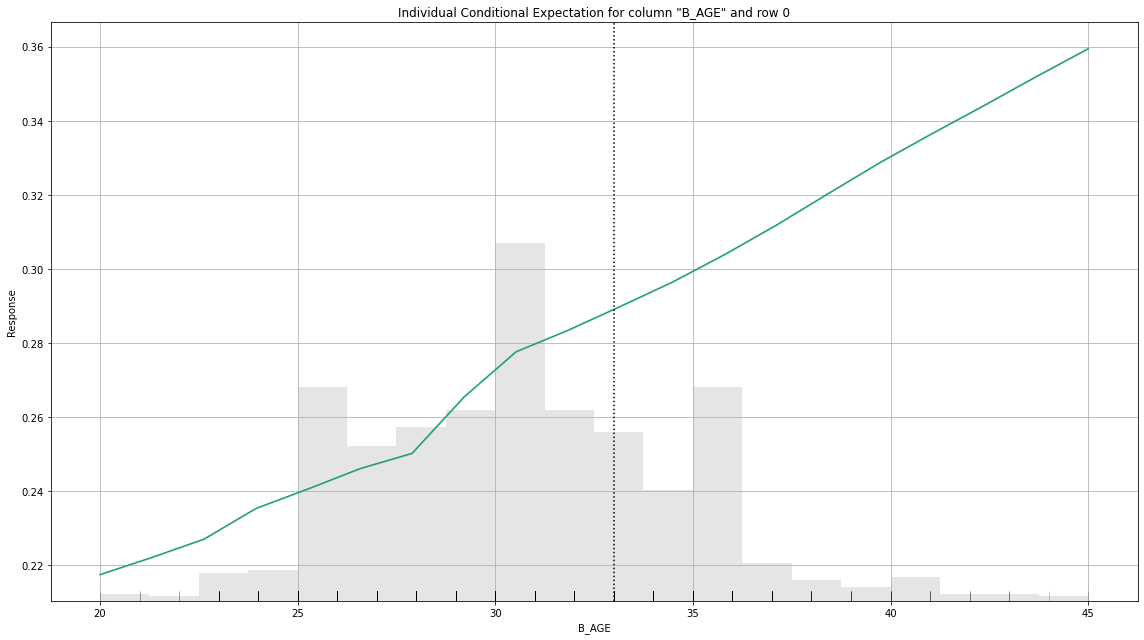

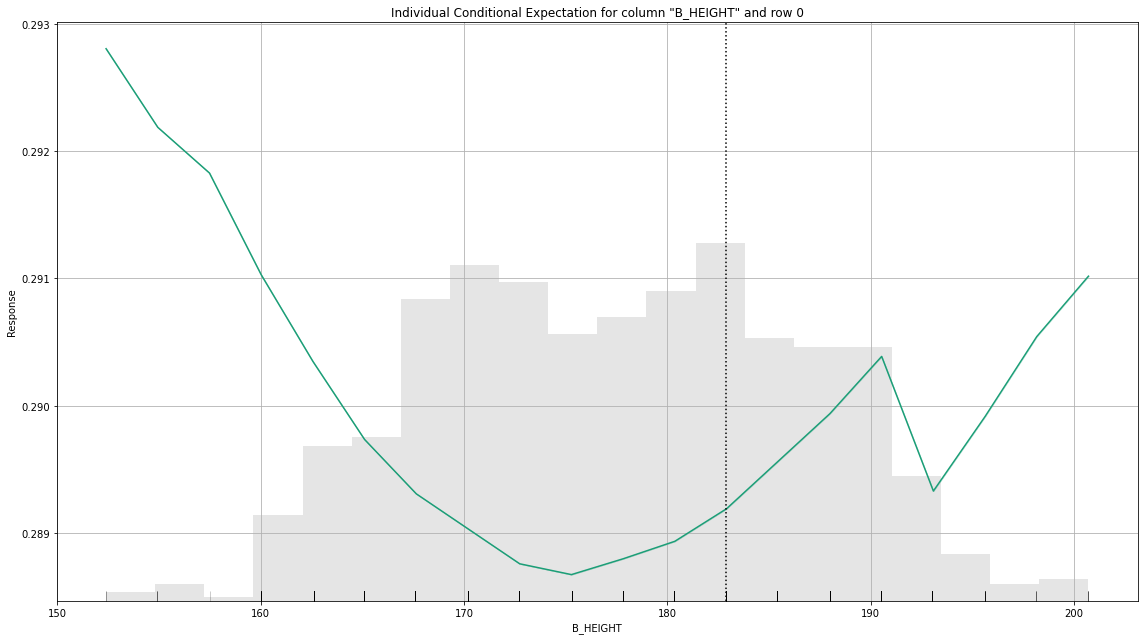

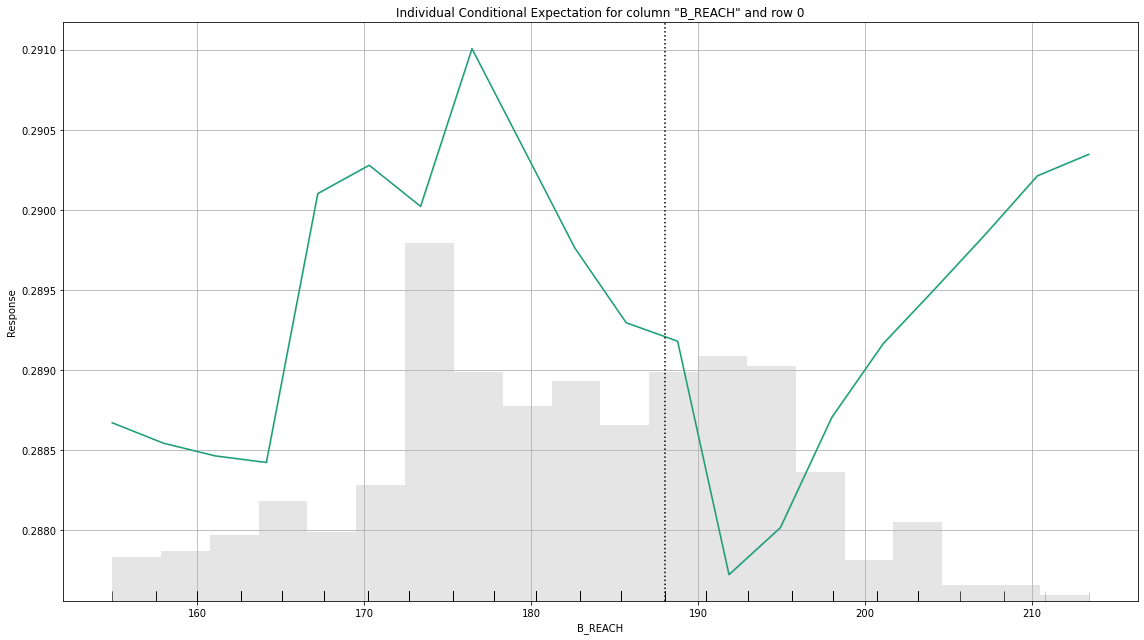

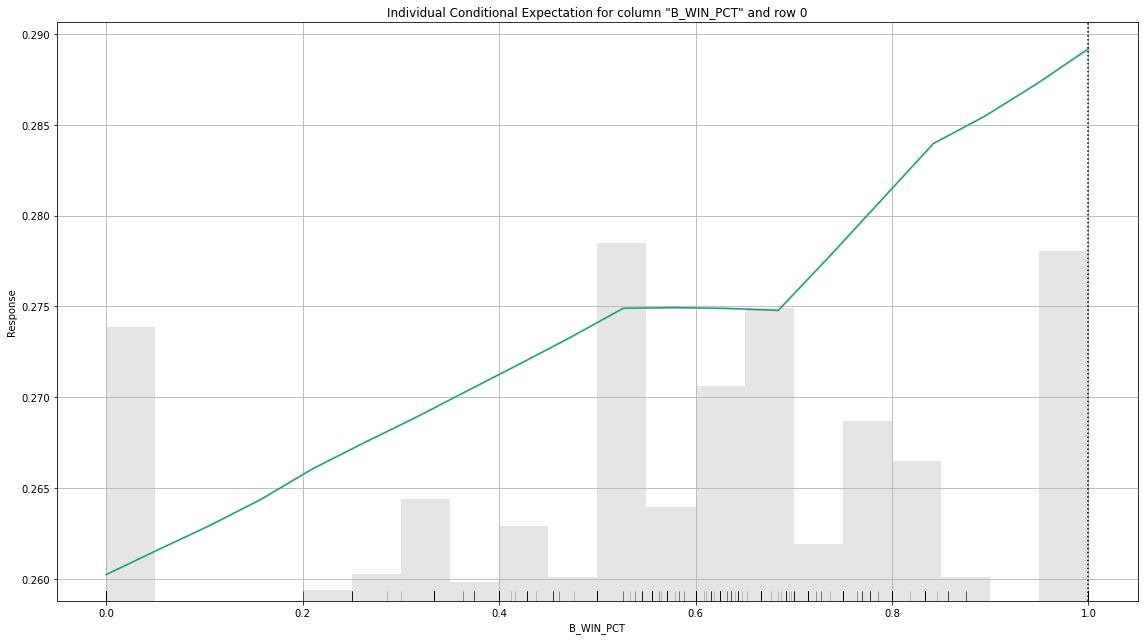

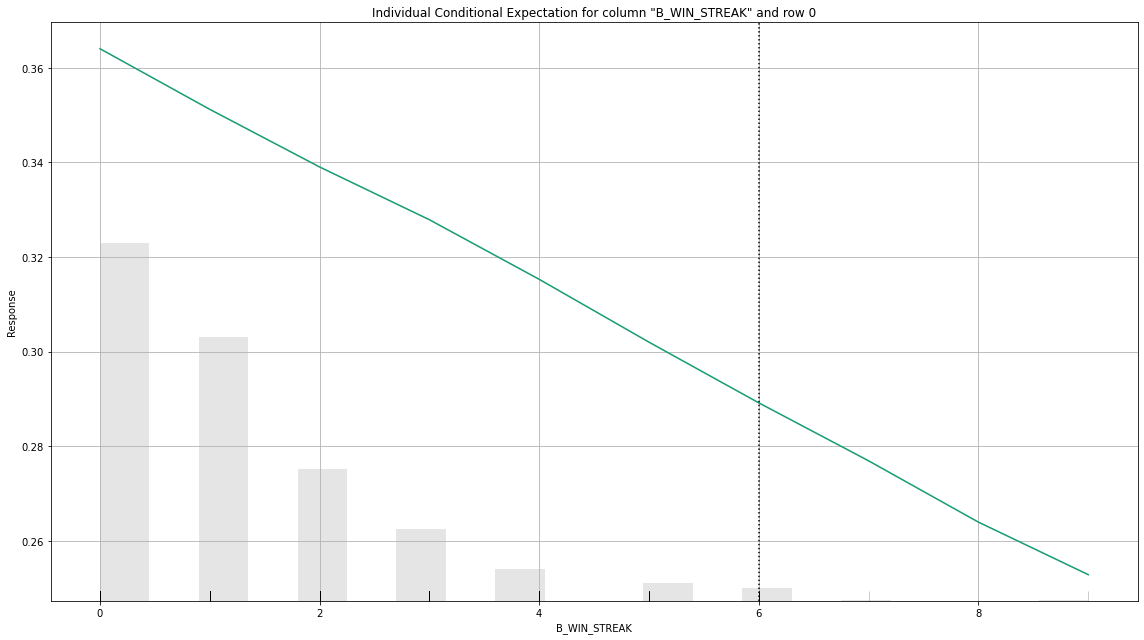

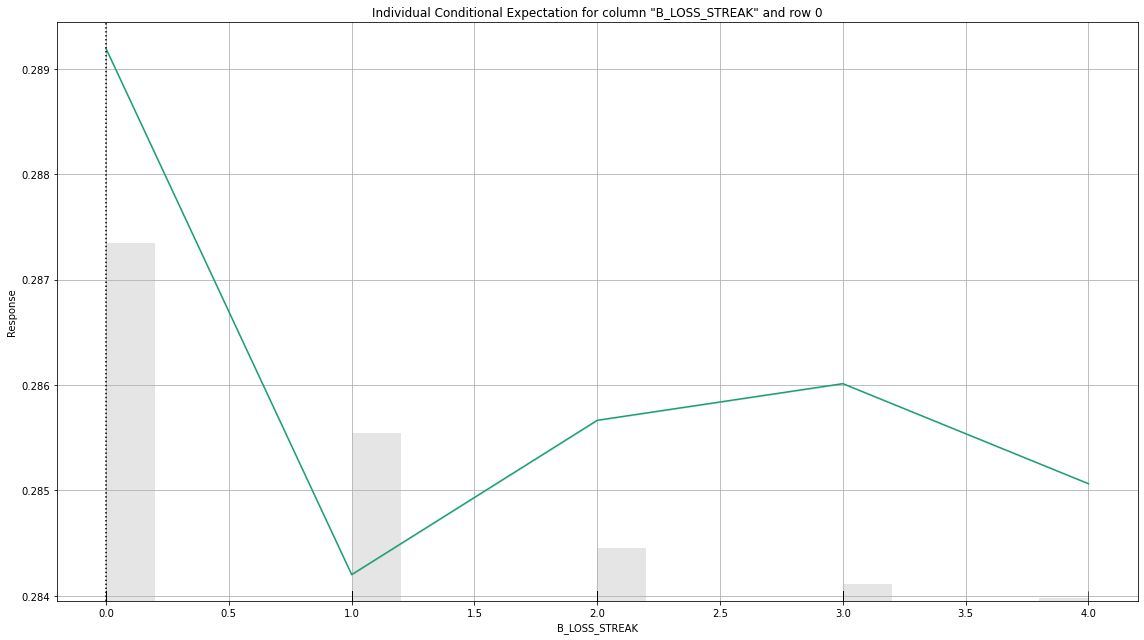

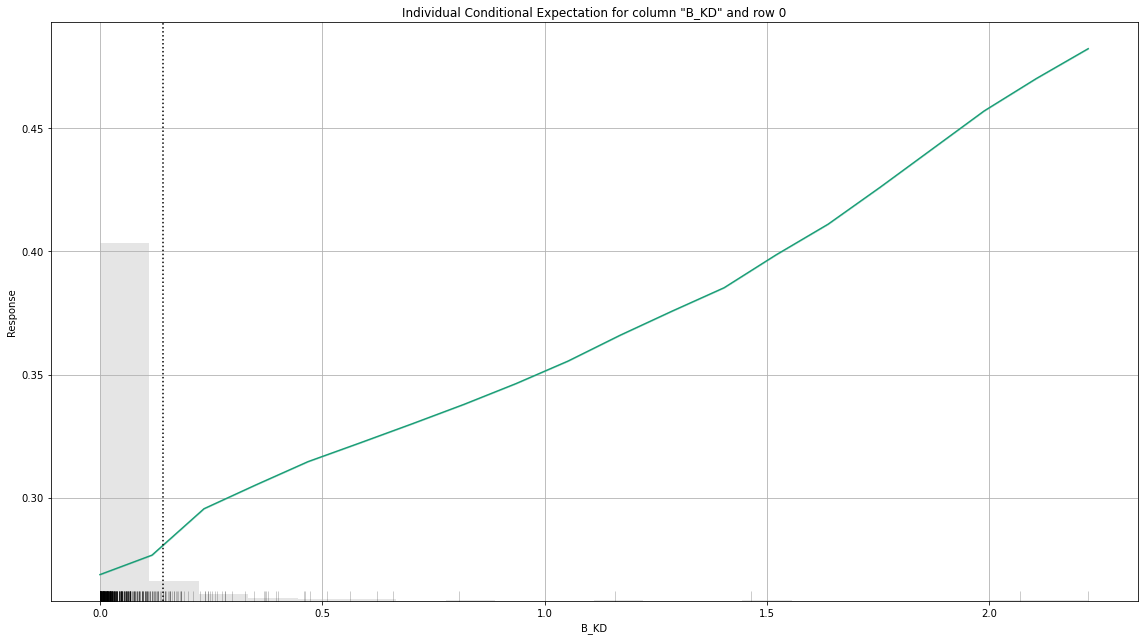

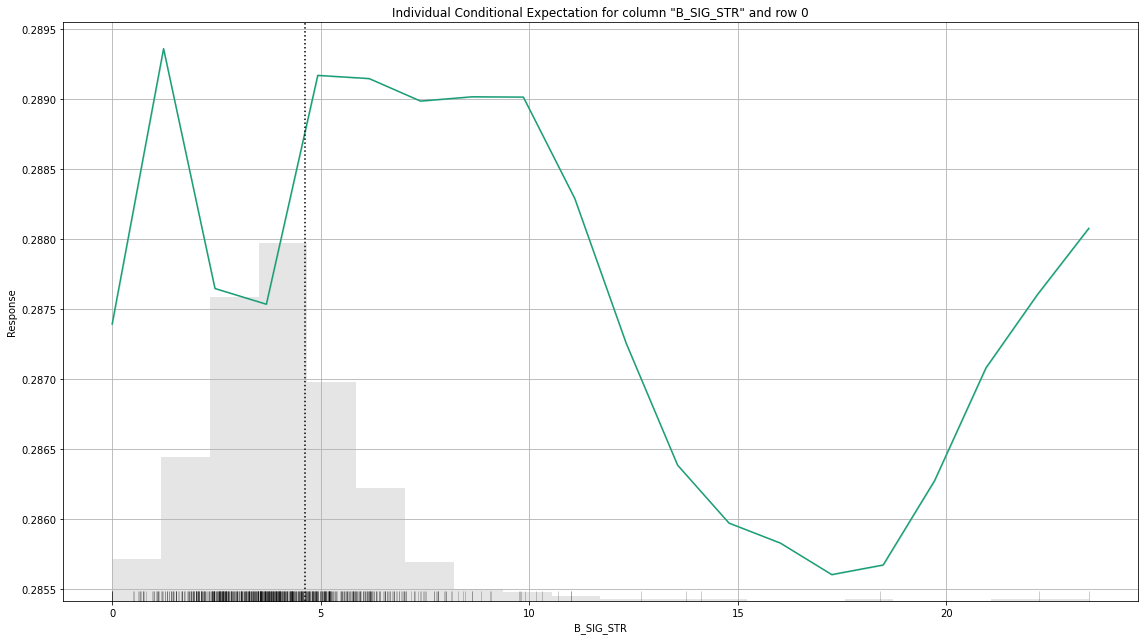

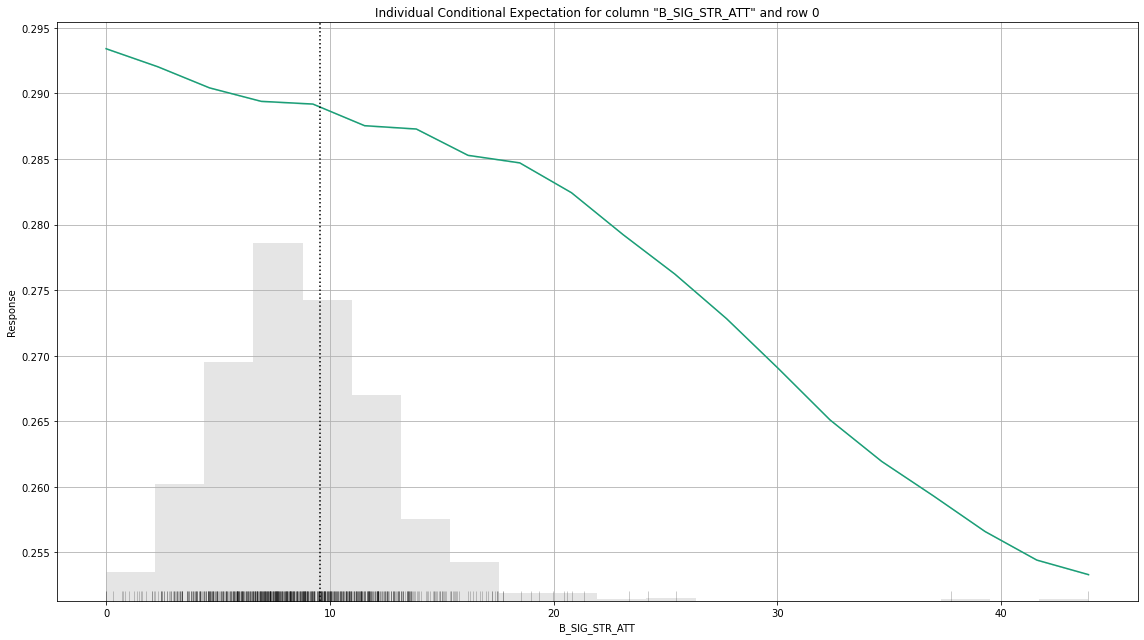

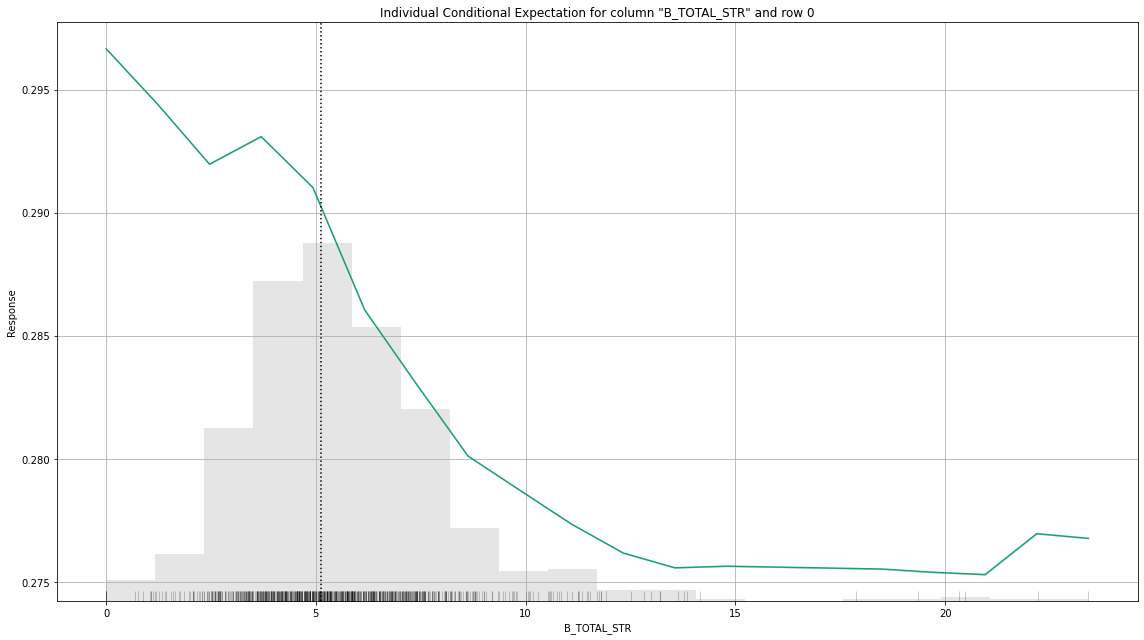

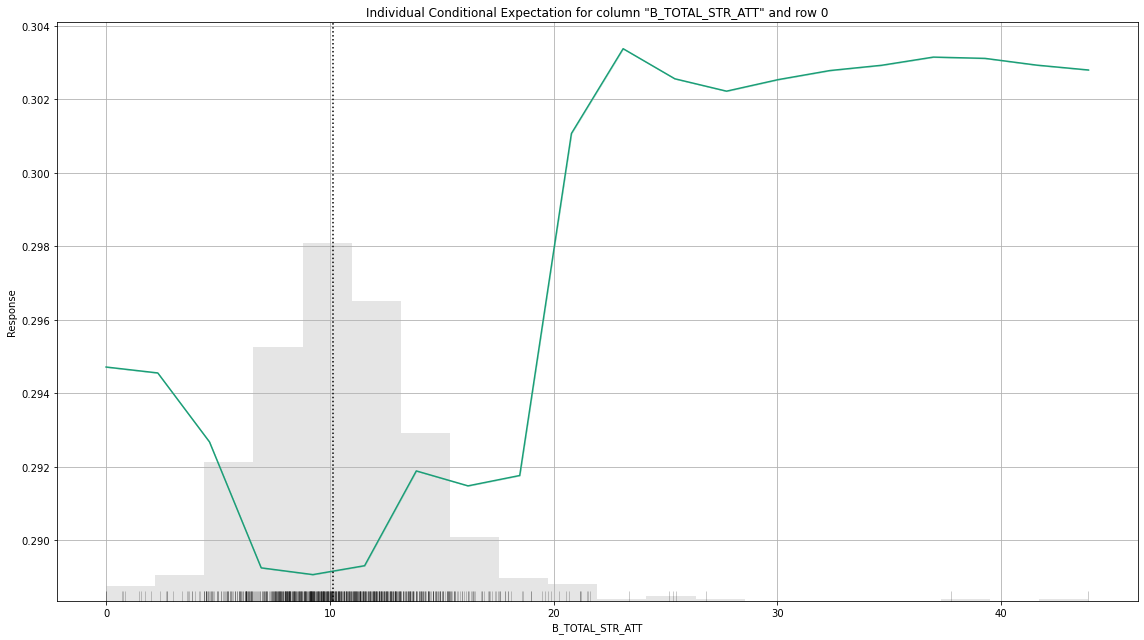

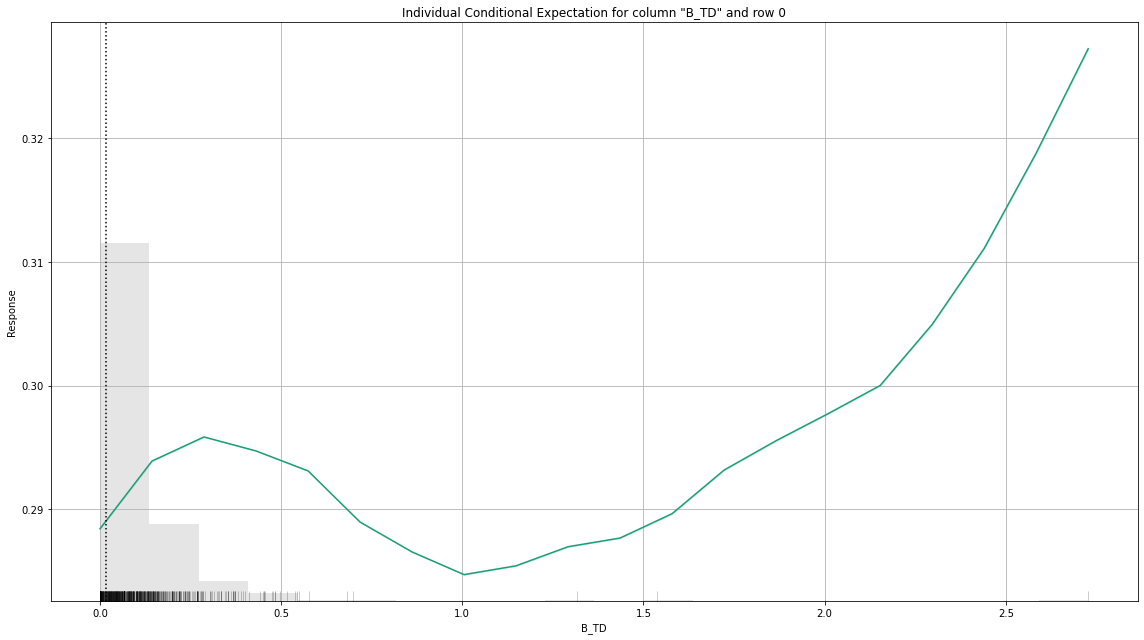

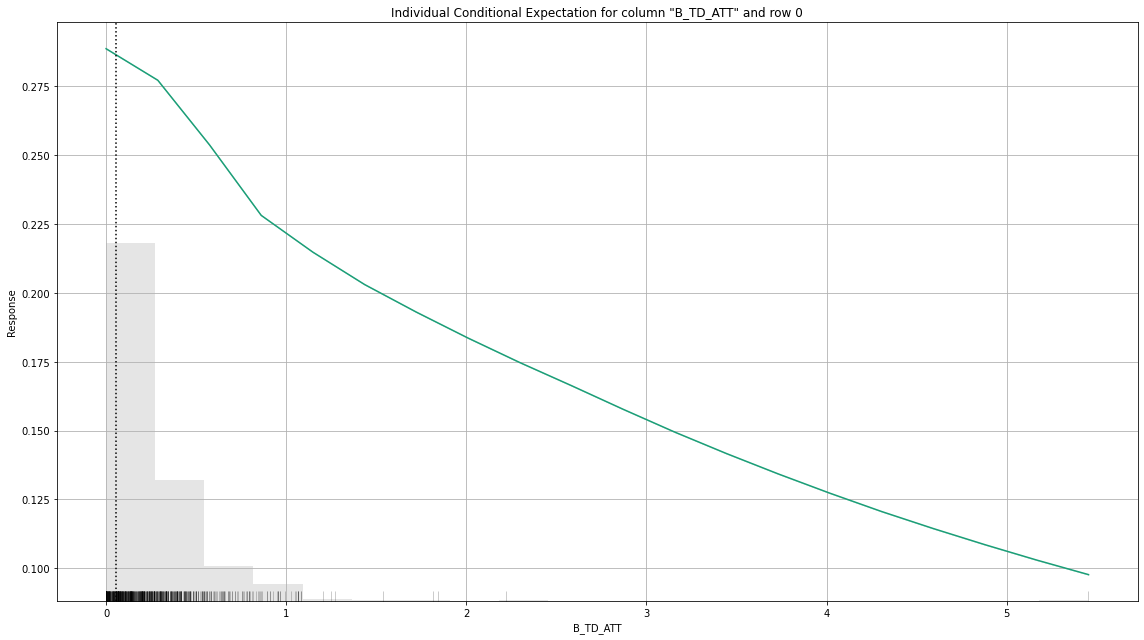

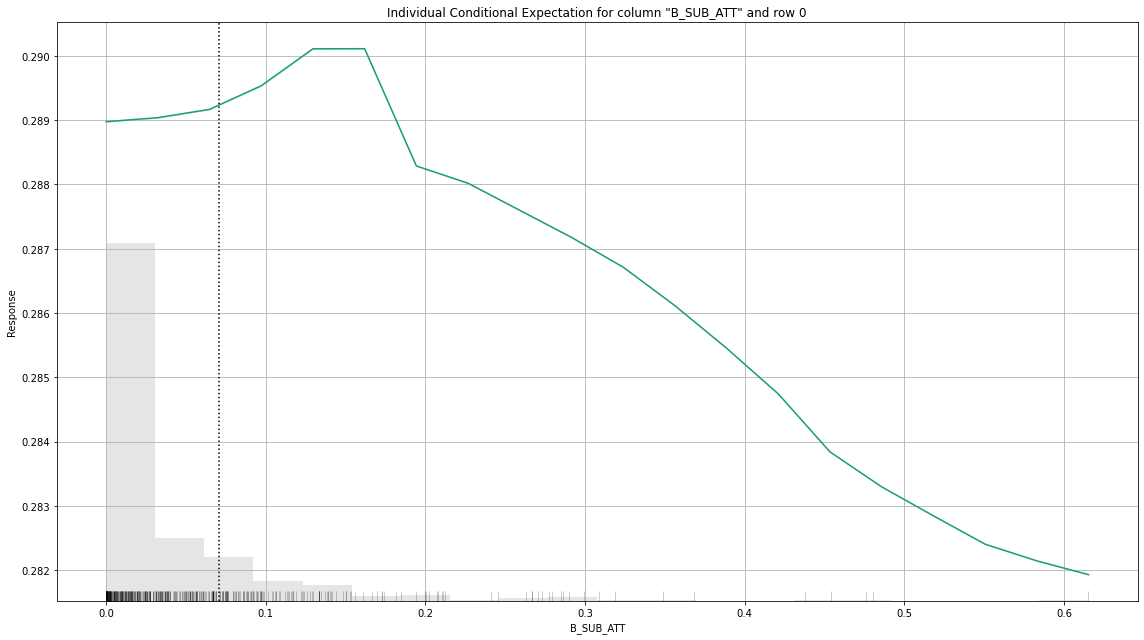

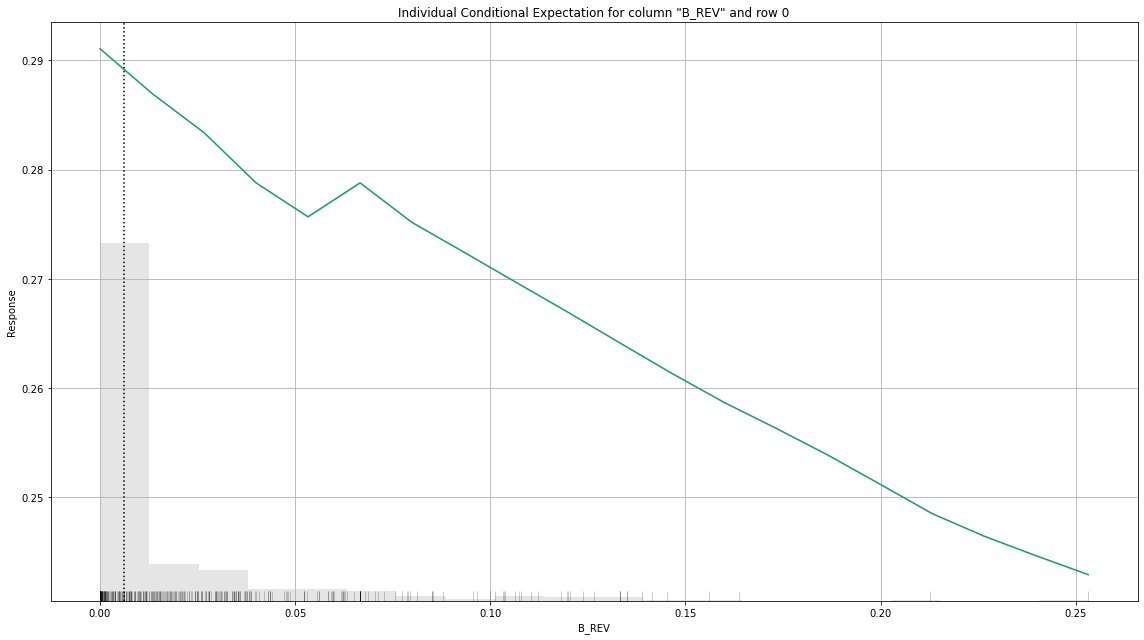

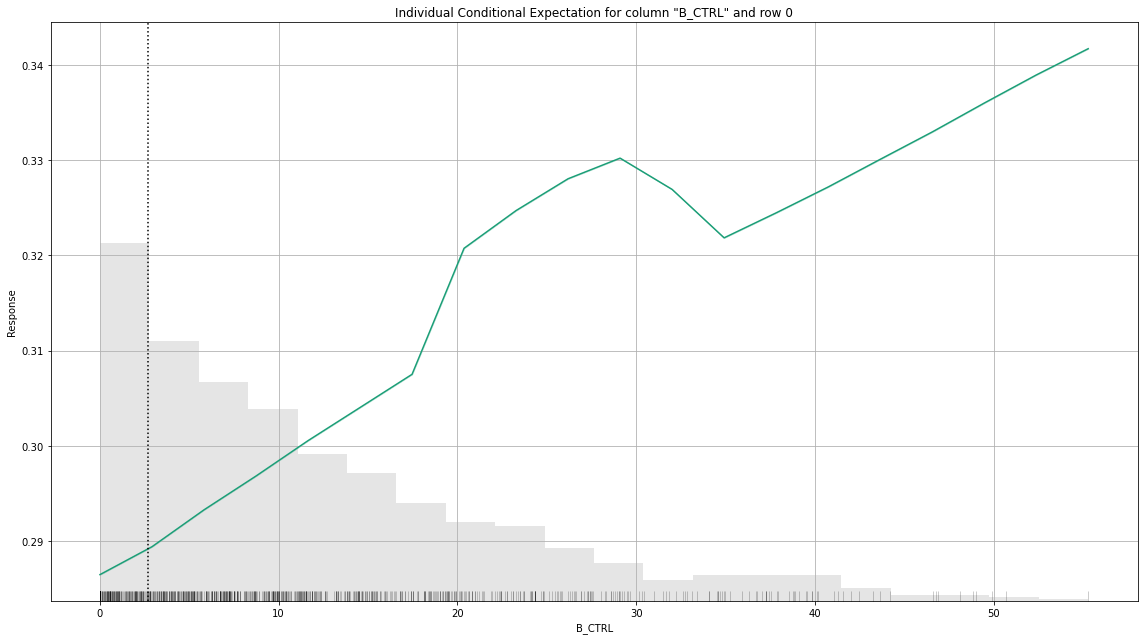

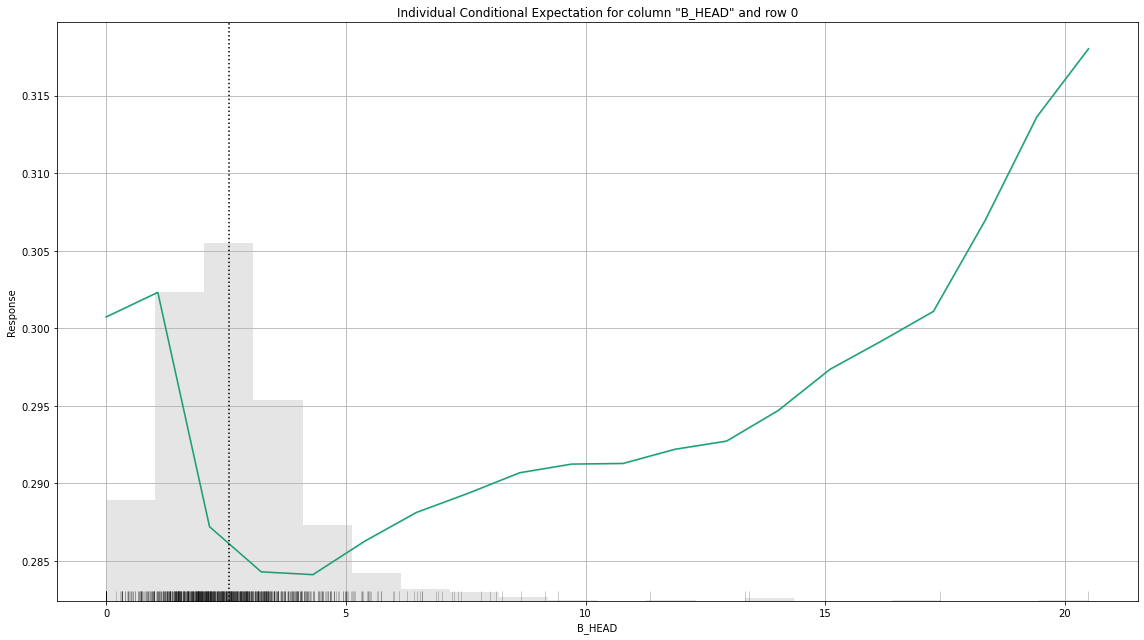

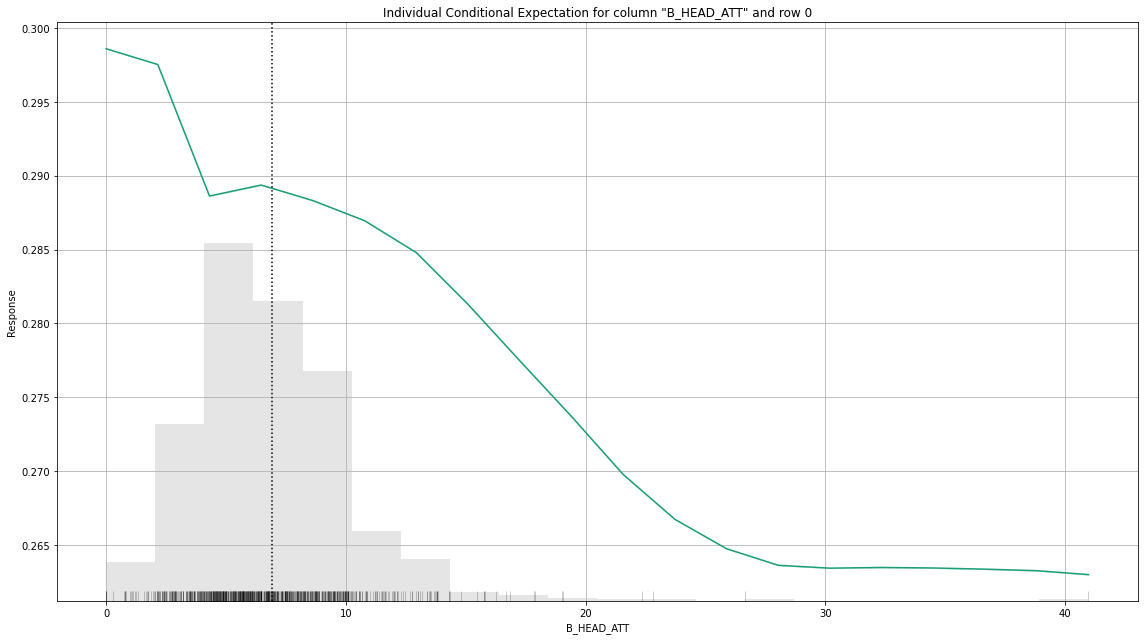

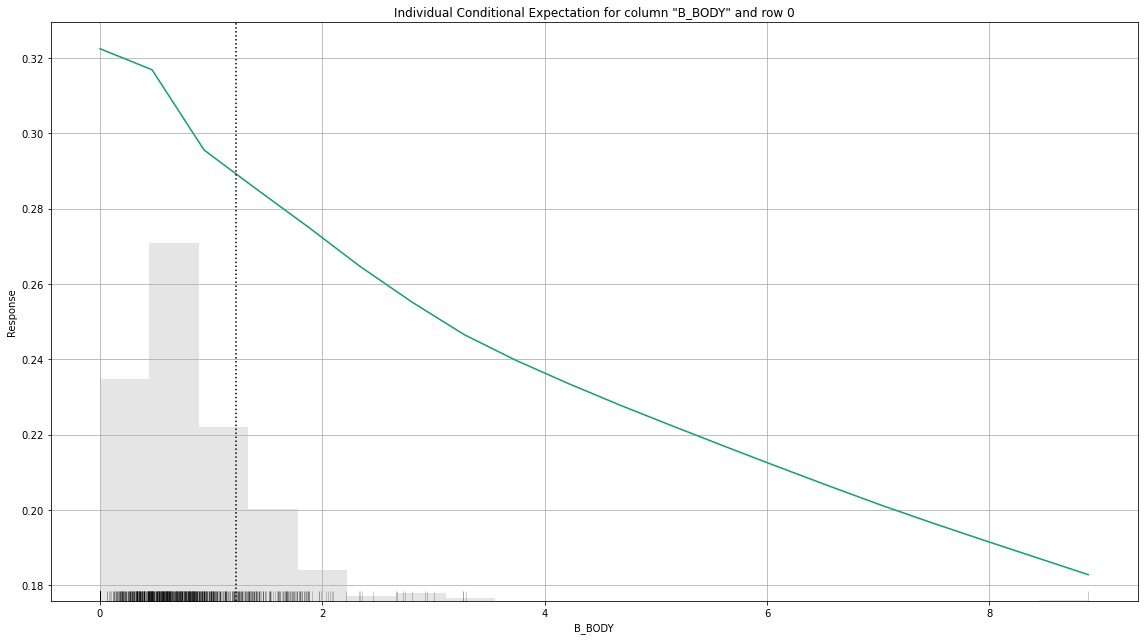

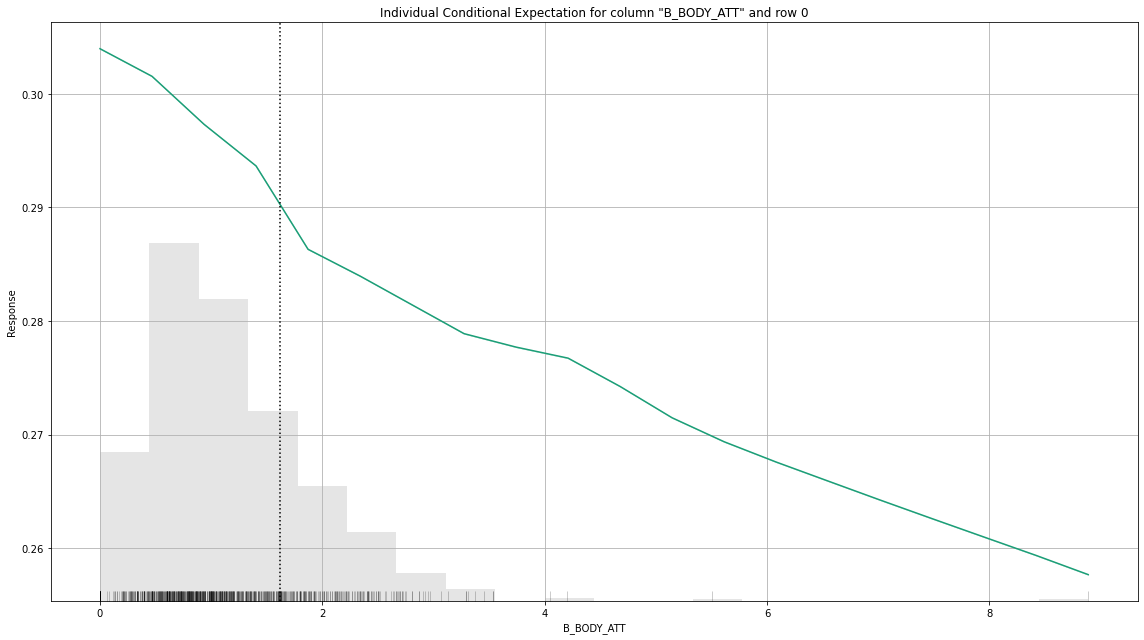

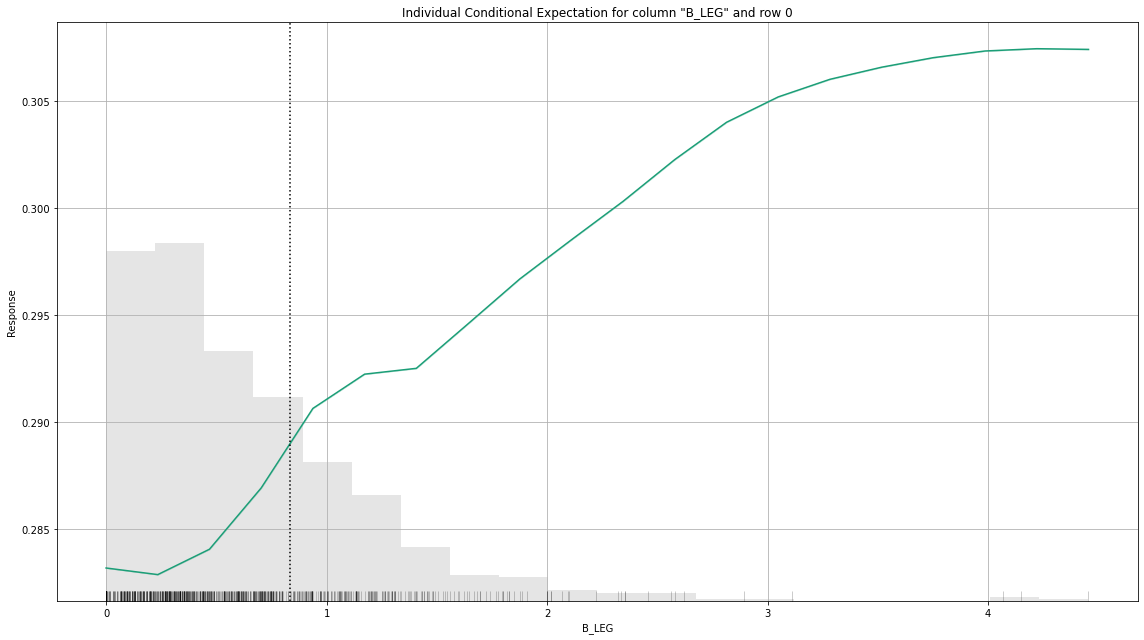

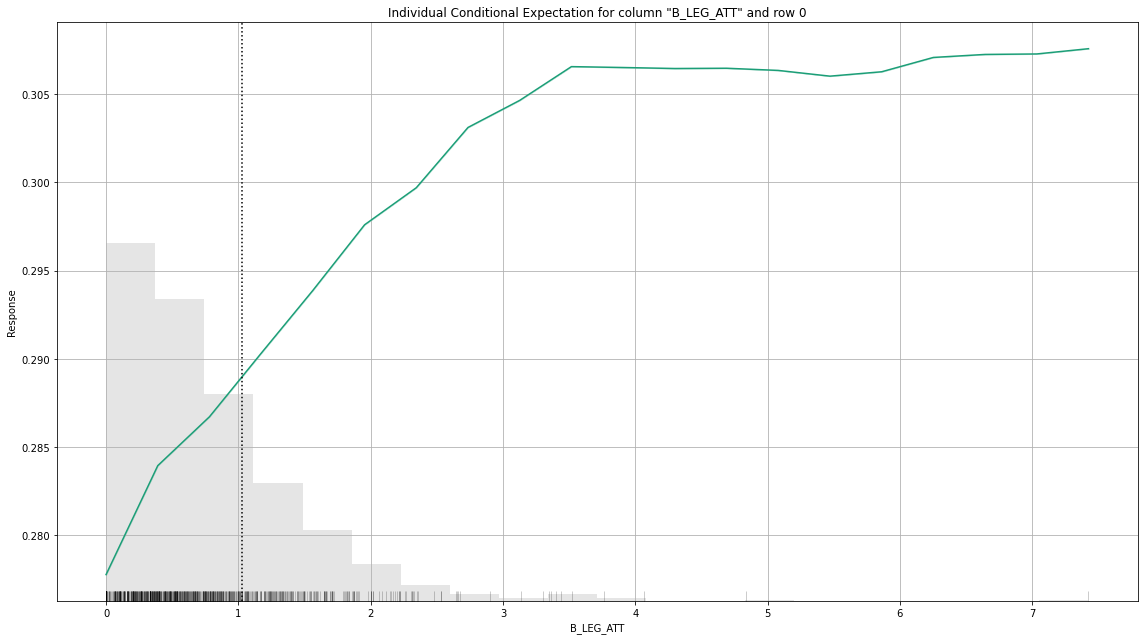

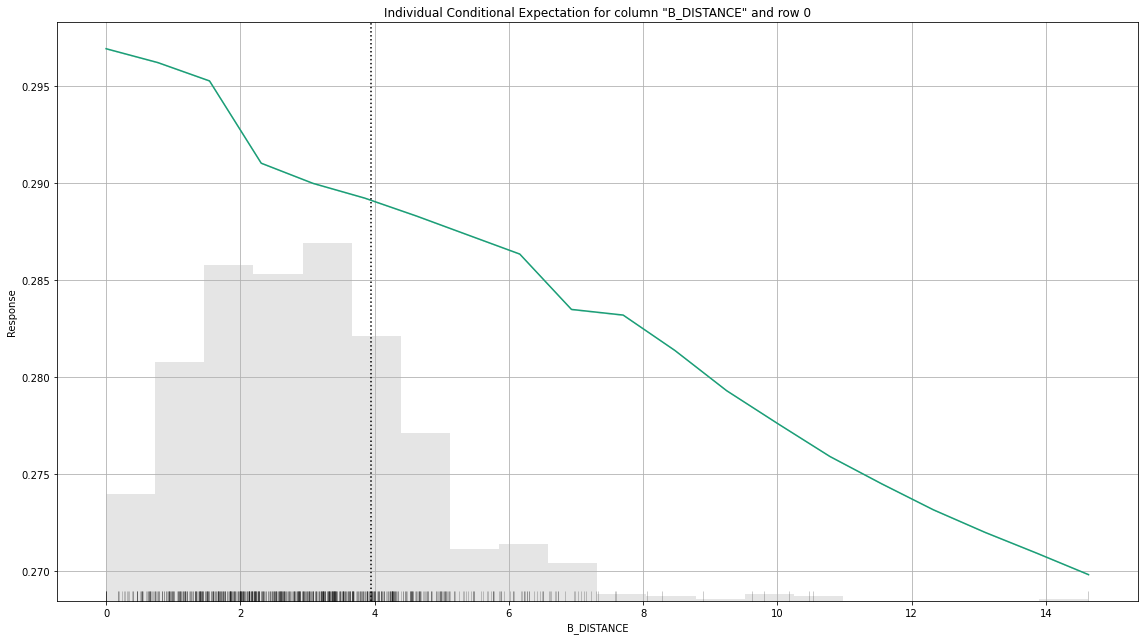

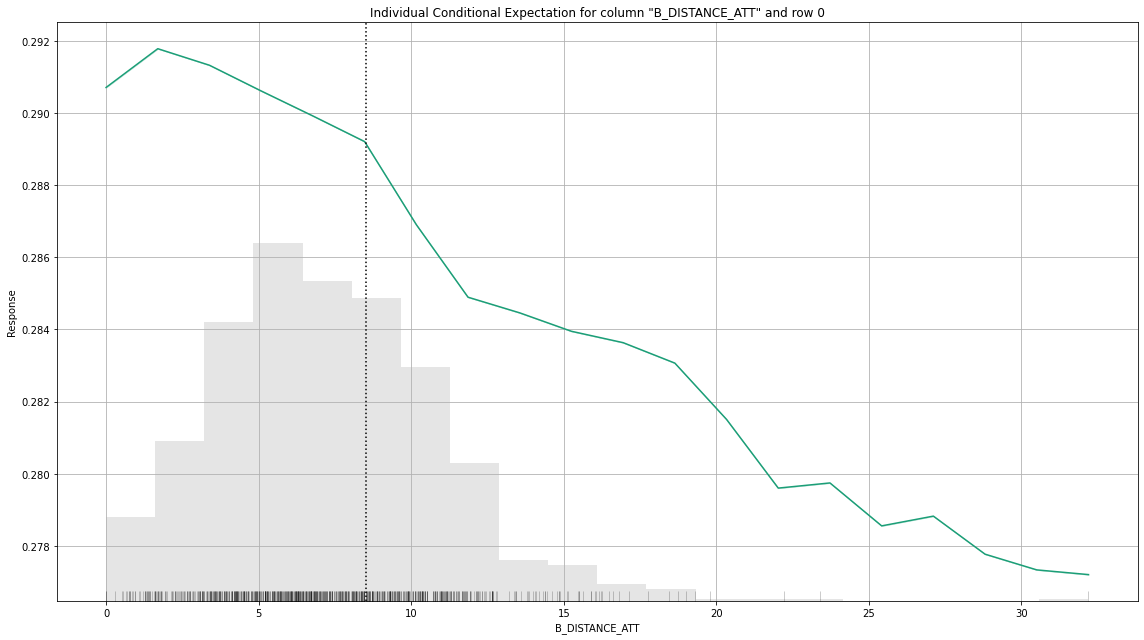

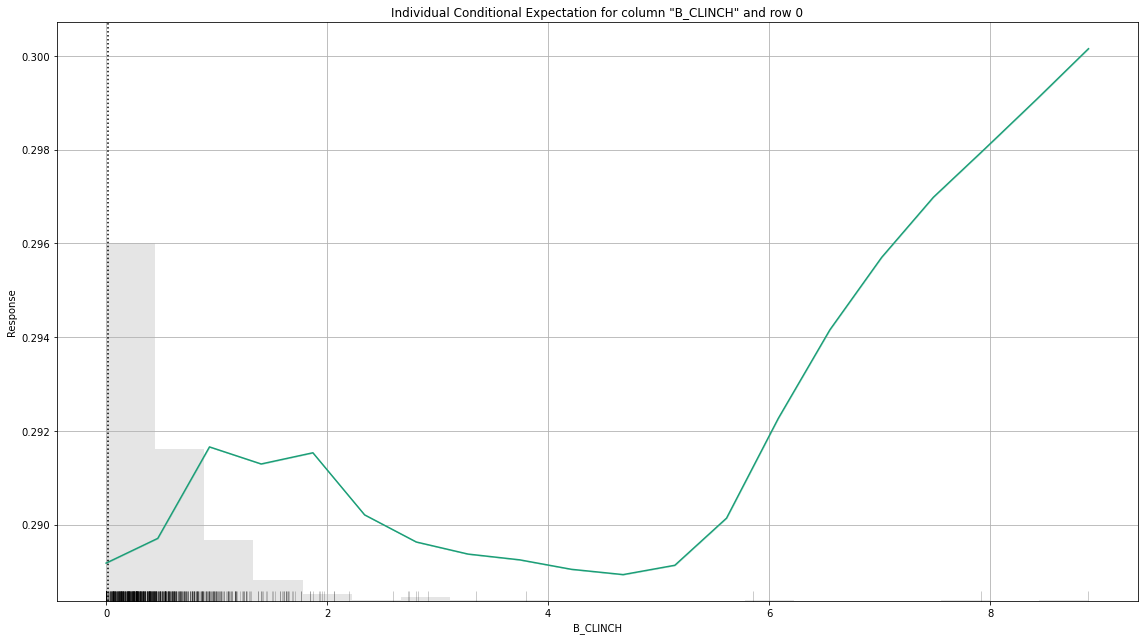

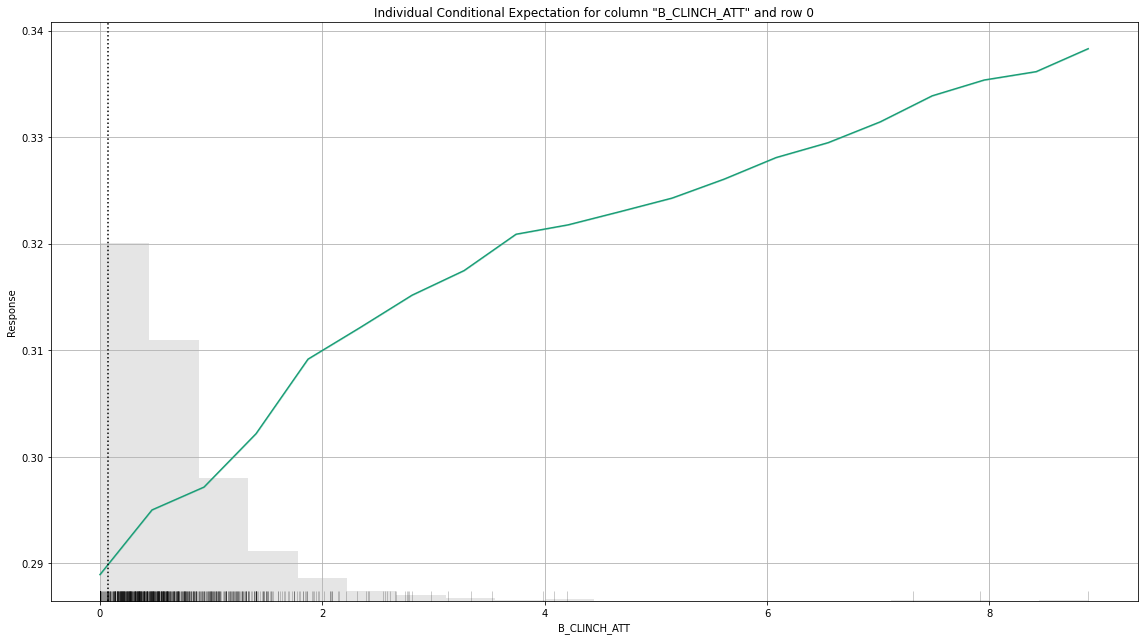

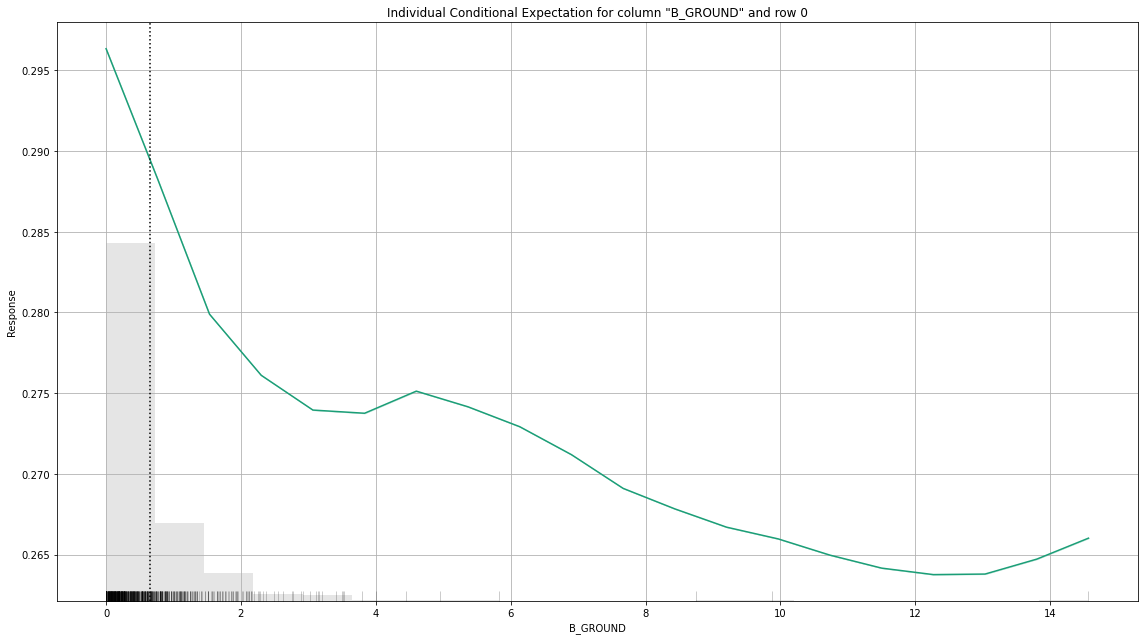

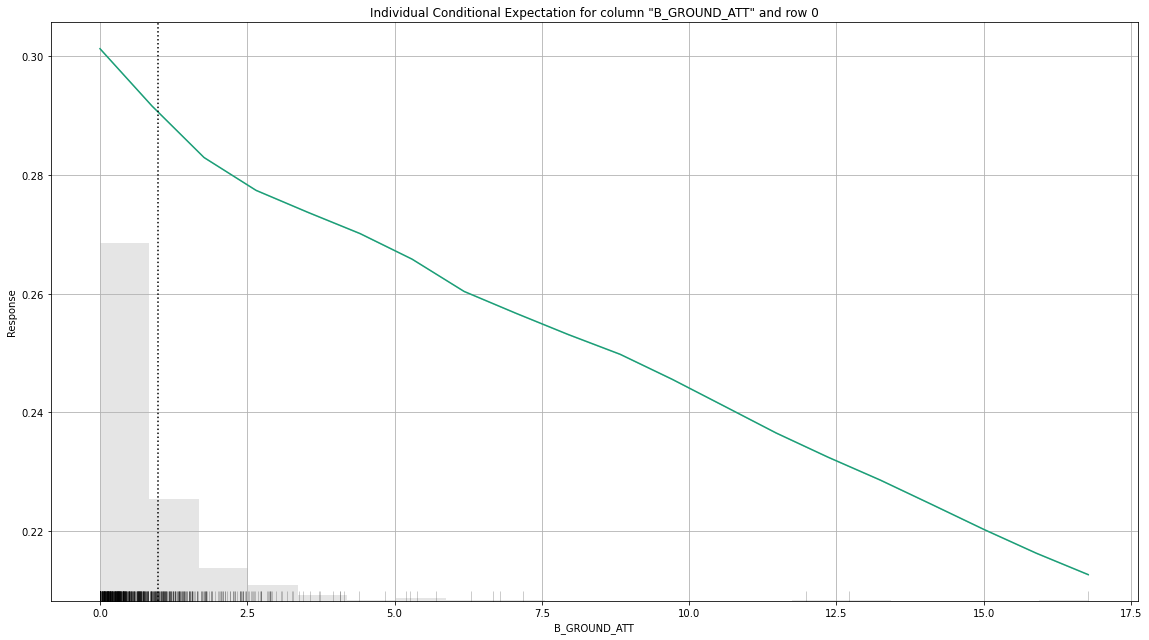

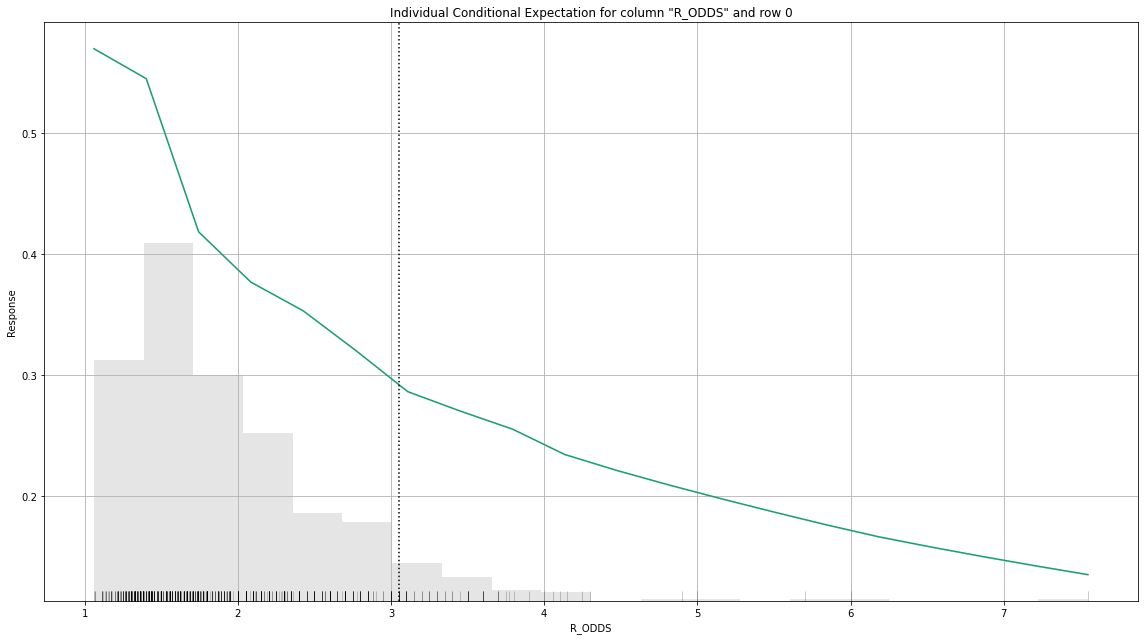

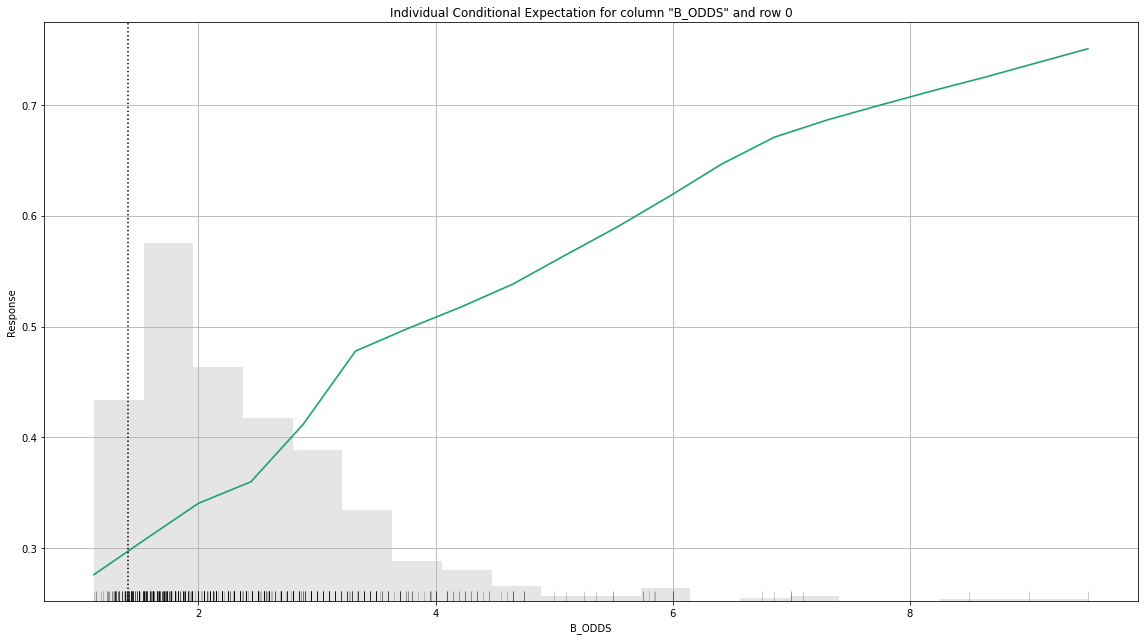



H2OExplanation([('ice', H2OExplanation([('header', <h2o.explanation._explain.Header object at 0x7f5b018e6df0>), ('description', <h2o.explanation._explain.Description object at 0x7f5b04bc1e50>), ('plots', H2OExplanation([('TITLE_BOUT', <h2o.plot._plot_result._MObject object at 0x7f5b01800190>), ('BANTAMWEIGHT', <h2o.plot._plot_result._MObject object at 0x7f5b017690a0>), ('CATCH WEIGHT', <h2o.plot._plot_result._MObject object at 0x7f5b0174b340>), ('FEATHERWEIGHT', <h2o.plot._plot_result._MObject object at 0x7f5b016ad2e0>), ('FLYWEIGHT', <h2o.plot._plot_result._MObject object at 0x7f5b01689f10>), ('HEAVYWEIGHT', <h2o.plot._plot_result._MObject object at 0x7f5b0159aee0>), ('LIGHT HEAVYWEIGHT', <h2o.plot._plot_result._MObject object at 0x7f5b01562bb0>), ('LIGHTWEIGHT', <h2o.plot._plot_result._MObject object at 0x7f5b0154a820>), ('MIDDLEWEIGHT', <h2o.plot._plot_result._MObject object at 0x7f5b014ae460>), ('WELTERWEIGHT', <h2o.plot._plot_result._MObject object at 0x7f5b01492a30>), ('WOMENS 

In [21]:
print(aml.leader.explain_row(test_hf, row_index=0))

In [22]:
my_local_model = h2o.download_model(aml.leader, path=models_path)
print(my_local_model)

/home/m/repo/mma/products/models/h2o/StackedEnsemble_BestOfFamily_9_AutoML_3_20220208_140638


In [23]:
# metalearner = se.metalearner()
# metalearner

In [24]:
# import os
# import re
# import shutil

# rootdir = models_path
# regex = re.compile('.*AutoML.*')

# for root, dirs, files in os.walk(rootdir):
#   for file in files:
#     if regex.match(file):

#         os.rename(models_path + file, models_path + "automl")

In [25]:
# model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# GLM = h2o.get_model([mid for mid in model_ids if "GLM" in mid][0])
# XGBOOST = h2o.get_model([mid for mid in model_ids if "XGB" in mid][0])
# ENSEMBLE = h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])
# models_to_save = [(GLM, "glm"), (XGBOOST, "xgboost"), (ENSEMBLE, "ensemble")]